In [1]:
import datetime as dt
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cartopy.feature
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import xarray as xr
import math
import netCDF4
#from get_ellipse_metrics import get_emetrics_max_min
from fitEllipse2_new import fitEllipseContour
from geopy.distance import great_circle
from matplotlib.patches import Polygon
from matplotlib import cm #colormaps!
import copy
import os
import scipy.stats
import pickle
import pandas as pd
import matplotlib.ticker as mticker

In [2]:
#Open data related pickles

infile = open("ephi_wind10_1.p", 'rb') 
e10 = pickle.load(infile)
infile.close()


In [3]:
#Import times 
infile = open("save_time.p",'rb')
year_ref = pickle.load(infile)
infile.close()

infile = open("save.p",'rb')
temp_ref = pickle.load(infile)
infile.close()

In [4]:
##need to do something to code in dates for x-axis 
year = [1999,2000,2001,2002,2003,2005,2006,2007,2008,2009,2012,2017,2018]
sswcl = [0,1,2,3,4,6,7,8,9,10,13,18,19]

normal_year = pd.date_range('2000-12-01','2001-04-01', 
              freq='6H').strftime("%m/%d").tolist()
leap_year = pd.date_range('1999-12-01','2000-04-01', 
              freq='6H').strftime("%m/%d").tolist()

dates = [(404,485),(285,329),(76,157),(156,237),(108,189),(168,249),(304,385),(296,377),(180,261),(244,325),(112,193),(256,337),(92,173)]
print(dates[0])

e10[0,int(dates[0][0]):int(dates[0][1])]
xt = leap_year[int(dates[0][0]):int(dates[0][1])]

xt

(404, 485)


['03/11',
 '03/11',
 '03/11',
 '03/11',
 '03/12',
 '03/12',
 '03/12',
 '03/12',
 '03/13',
 '03/13',
 '03/13',
 '03/13',
 '03/14',
 '03/14',
 '03/14',
 '03/14',
 '03/15',
 '03/15',
 '03/15',
 '03/15',
 '03/16',
 '03/16',
 '03/16',
 '03/16',
 '03/17',
 '03/17',
 '03/17',
 '03/17',
 '03/18',
 '03/18',
 '03/18',
 '03/18',
 '03/19',
 '03/19',
 '03/19',
 '03/19',
 '03/20',
 '03/20',
 '03/20',
 '03/20',
 '03/21',
 '03/21',
 '03/21',
 '03/21',
 '03/22',
 '03/22',
 '03/22',
 '03/22',
 '03/23',
 '03/23',
 '03/23',
 '03/23',
 '03/24',
 '03/24',
 '03/24',
 '03/24',
 '03/25',
 '03/25',
 '03/25',
 '03/25',
 '03/26',
 '03/26',
 '03/26',
 '03/26',
 '03/27',
 '03/27',
 '03/27',
 '03/27',
 '03/28',
 '03/28',
 '03/28',
 '03/28',
 '03/29',
 '03/29',
 '03/29',
 '03/29',
 '03/30',
 '03/30',
 '03/30',
 '03/30',
 '03/31']

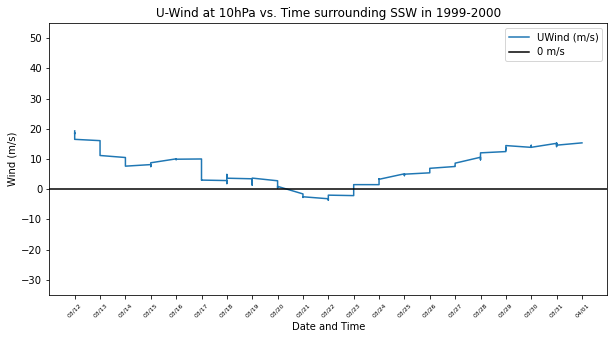

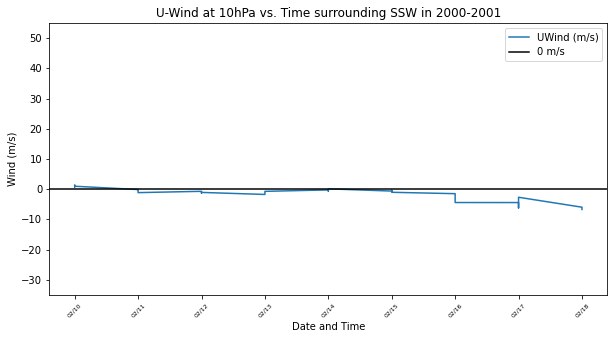

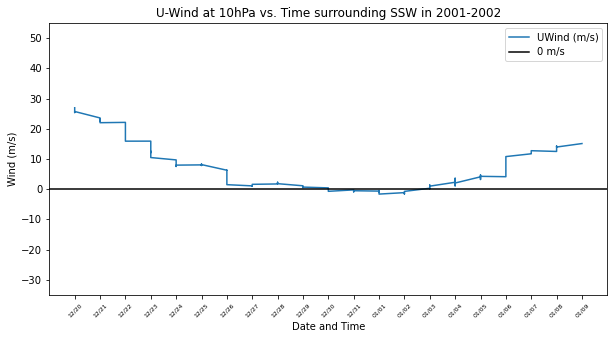

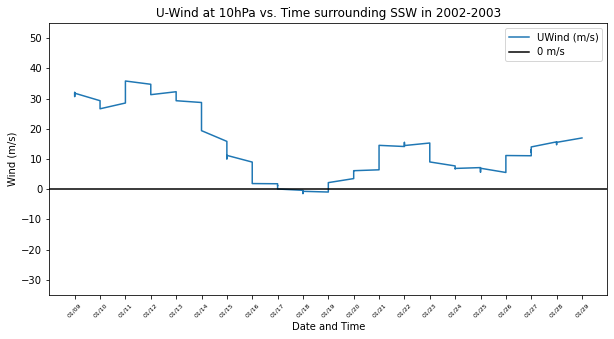

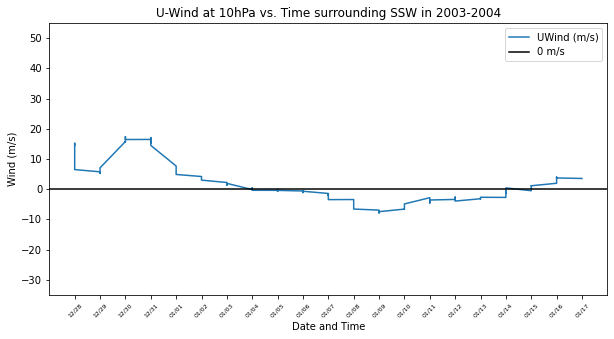

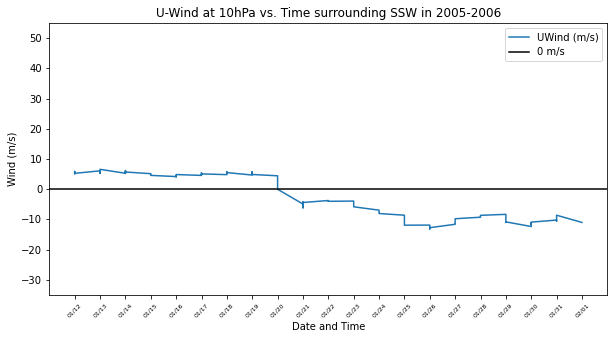

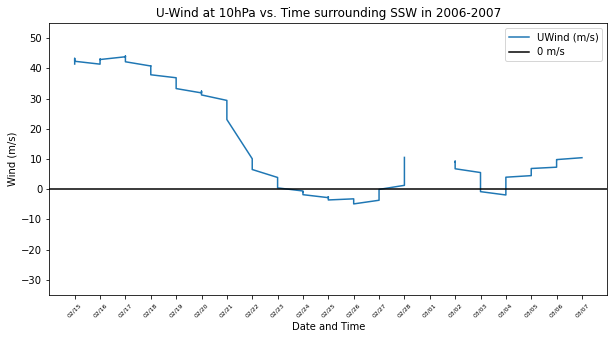

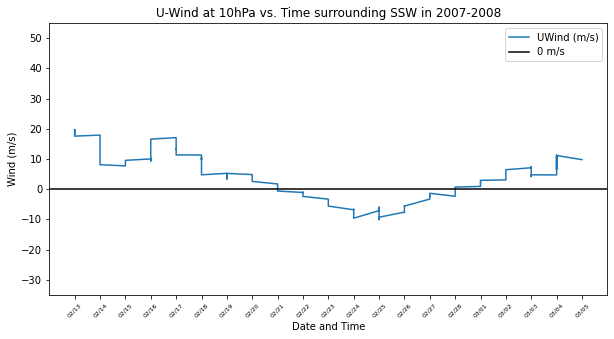

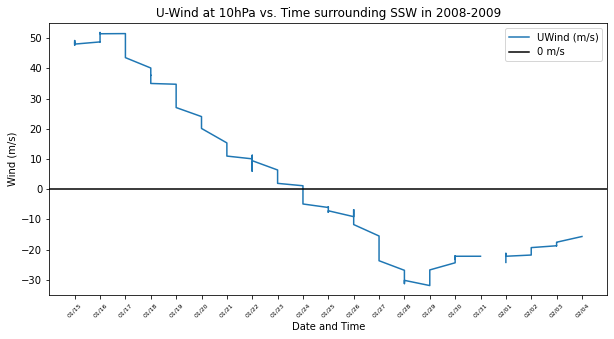

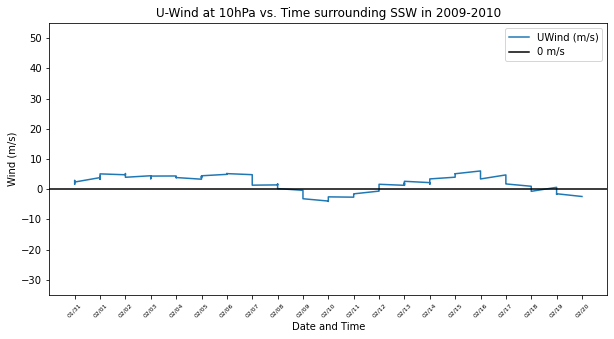

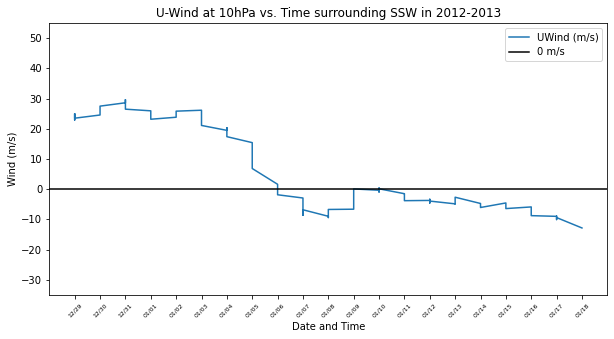

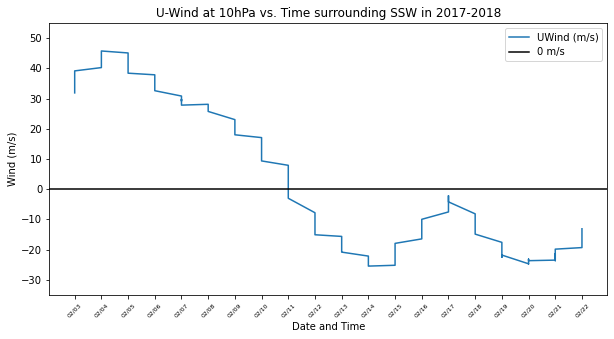

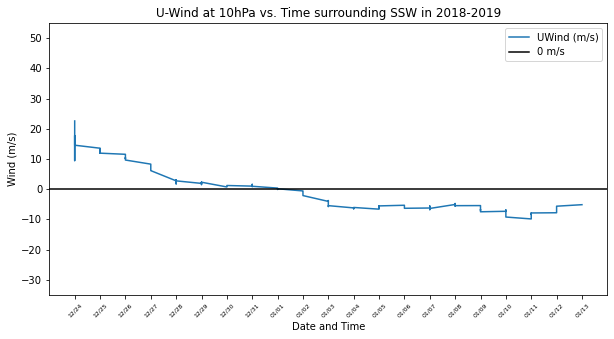

In [5]:
for i in range(len(year)):
    y = str(year[i])
    y2 = str(year[i]+1)
    d1 = int(dates[i][0])
    d2 = int(dates[i][1])
    ep = e10[sswcl[i],d1:d2]
    if y == 1999 or y == 2003 or y == 2007:
        x = leap_year[d1:d2]
    else:
        x = normal_year[d1:d2]
    
    fig = plt.figure(figsize=[10, 5])
    ax = plt.subplot(1, 1, 1)
    #print(y)
    ax.plot(x, ep, label = "UWind (m/s)")
    plt.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
    ax.set_ylabel("Wind (m/s)")
    ax.set_xlabel("Date and Time")
    plt.xticks(rotation=45,fontsize =6)
    plt.ylim(-35,55)
    plt.legend()
    plt.title("U-Wind at 10hPa vs. Time surrounding SSW in "+y+"-"+y2)
    plt.show()


In [6]:
## now with these it should be easy enough to make figures for each of the variables
infile = open("ephi_ratio10_1.p", 'rb')
ephi_ratio10 = pickle.load(infile)
infile.close()

infile = open("ephi_cenlat10_1.p", 'rb')
ephi_cenlat10 = pickle.load(infile)
infile.close()

infile = open("ephi_size10_1.p", 'rb')
ephi_size10 = pickle.load(infile)
infile.close()

infile = open("ephi10_1.p", 'rb')
ephi10 = pickle.load(infile)
infile.close()

##Open temp related pickles
infile = open("save_time.p",'rb')
year_ref = pickle.load(infile)
infile.close()

infile = open("save.p",'rb')
temp_ref = pickle.load(infile)
infile.close()

infile = open("lats.p",'rb')
lats = pickle.load(infile)
infile.close()

infile = open("lons.p",'rb')
lons = pickle.load(infile)
infile.close()

In [7]:
print(lons[95:117])
print(lats[23:39])

[265.07812 265.78125 266.48438 267.1875  267.89062 268.59375 269.29688
 270.      270.70312 271.40625 272.10938 272.8125  273.51562 274.21875
 274.92188 275.625   276.32812 277.03125 277.73438 278.4375  279.14062
 279.84375]
[36.14027  36.842022 37.543777 38.24553  38.94728  39.649033 40.350784
 41.052536 41.754288 42.45604  43.15779  43.859543 44.561295 45.263046
 45.964798 46.66655 ]


In [8]:
## averaging temp values in grid
tempval = np.empty((20,488,64,134))
tempval[:] = np.nan

yearnot = 0

for i in np.arange(1999,2019): 
    #print(i)
    #print(yearnot)
    year_save = temp_ref[np.where(year_ref==i)]
    #print(year_save.shape)
    if i == 1999 or i == 2003 or i == 2007 or i == 2011 or i ==2015: #account for leap years in entering data
        tempval[yearnot,:,:,:] = year_save
        yearnot = yearnot+1
    else:
        tempval[yearnot,0:360,:,:] = year_save[0:360,:,:]
        tempval[yearnot,364:,:,:] = year_save[360:,:,:]
        yearnot = yearnot+1

tempvals = tempval[:,:,23:39,81:117]
print(tempvals.shape)

(20, 488, 16, 36)


In [9]:
#Average temperature
#first along lons
temps1 = np.nanmean(tempvals,axis=3)
temps = np.nanmean(temps1,axis=2)

print(temps.shape)
tem = temps-273.15 #convert to C

print(tem)

(20, 488)
[[ 3.80354886  5.49172024  6.14330614 ...  2.23642375  1.67289293
   1.9326789 ]
 [-3.61277873 -5.05296088 -6.25801188 ...  0.01446262 -1.43375244
  -2.33519762]
 [ 2.40796136  1.78934631  1.3419654  ...  0.10287543 -1.5608785
  -1.43728231]
 ...
 [-2.28072713 -3.05290663 -3.37446696 ...  3.7121894   2.68659871
   2.17429335]
 [ 1.83451402  2.43709886  3.42402547 ...  0.94628974 -0.98207533
  -2.92102322]
 [ 4.43947076  4.08087904  3.65387031 ... -6.57866347 -7.70593872
  -7.41809692]]


/tmp/ipykernel_40013/1438008562.py:3: RuntimeWarning: Mean of empty slice
  temps1 = np.nanmean(tempvals,axis=3)
/tmp/ipykernel_40013/1438008562.py:4: RuntimeWarning: Mean of empty slice
  temps = np.nanmean(temps1,axis=2)


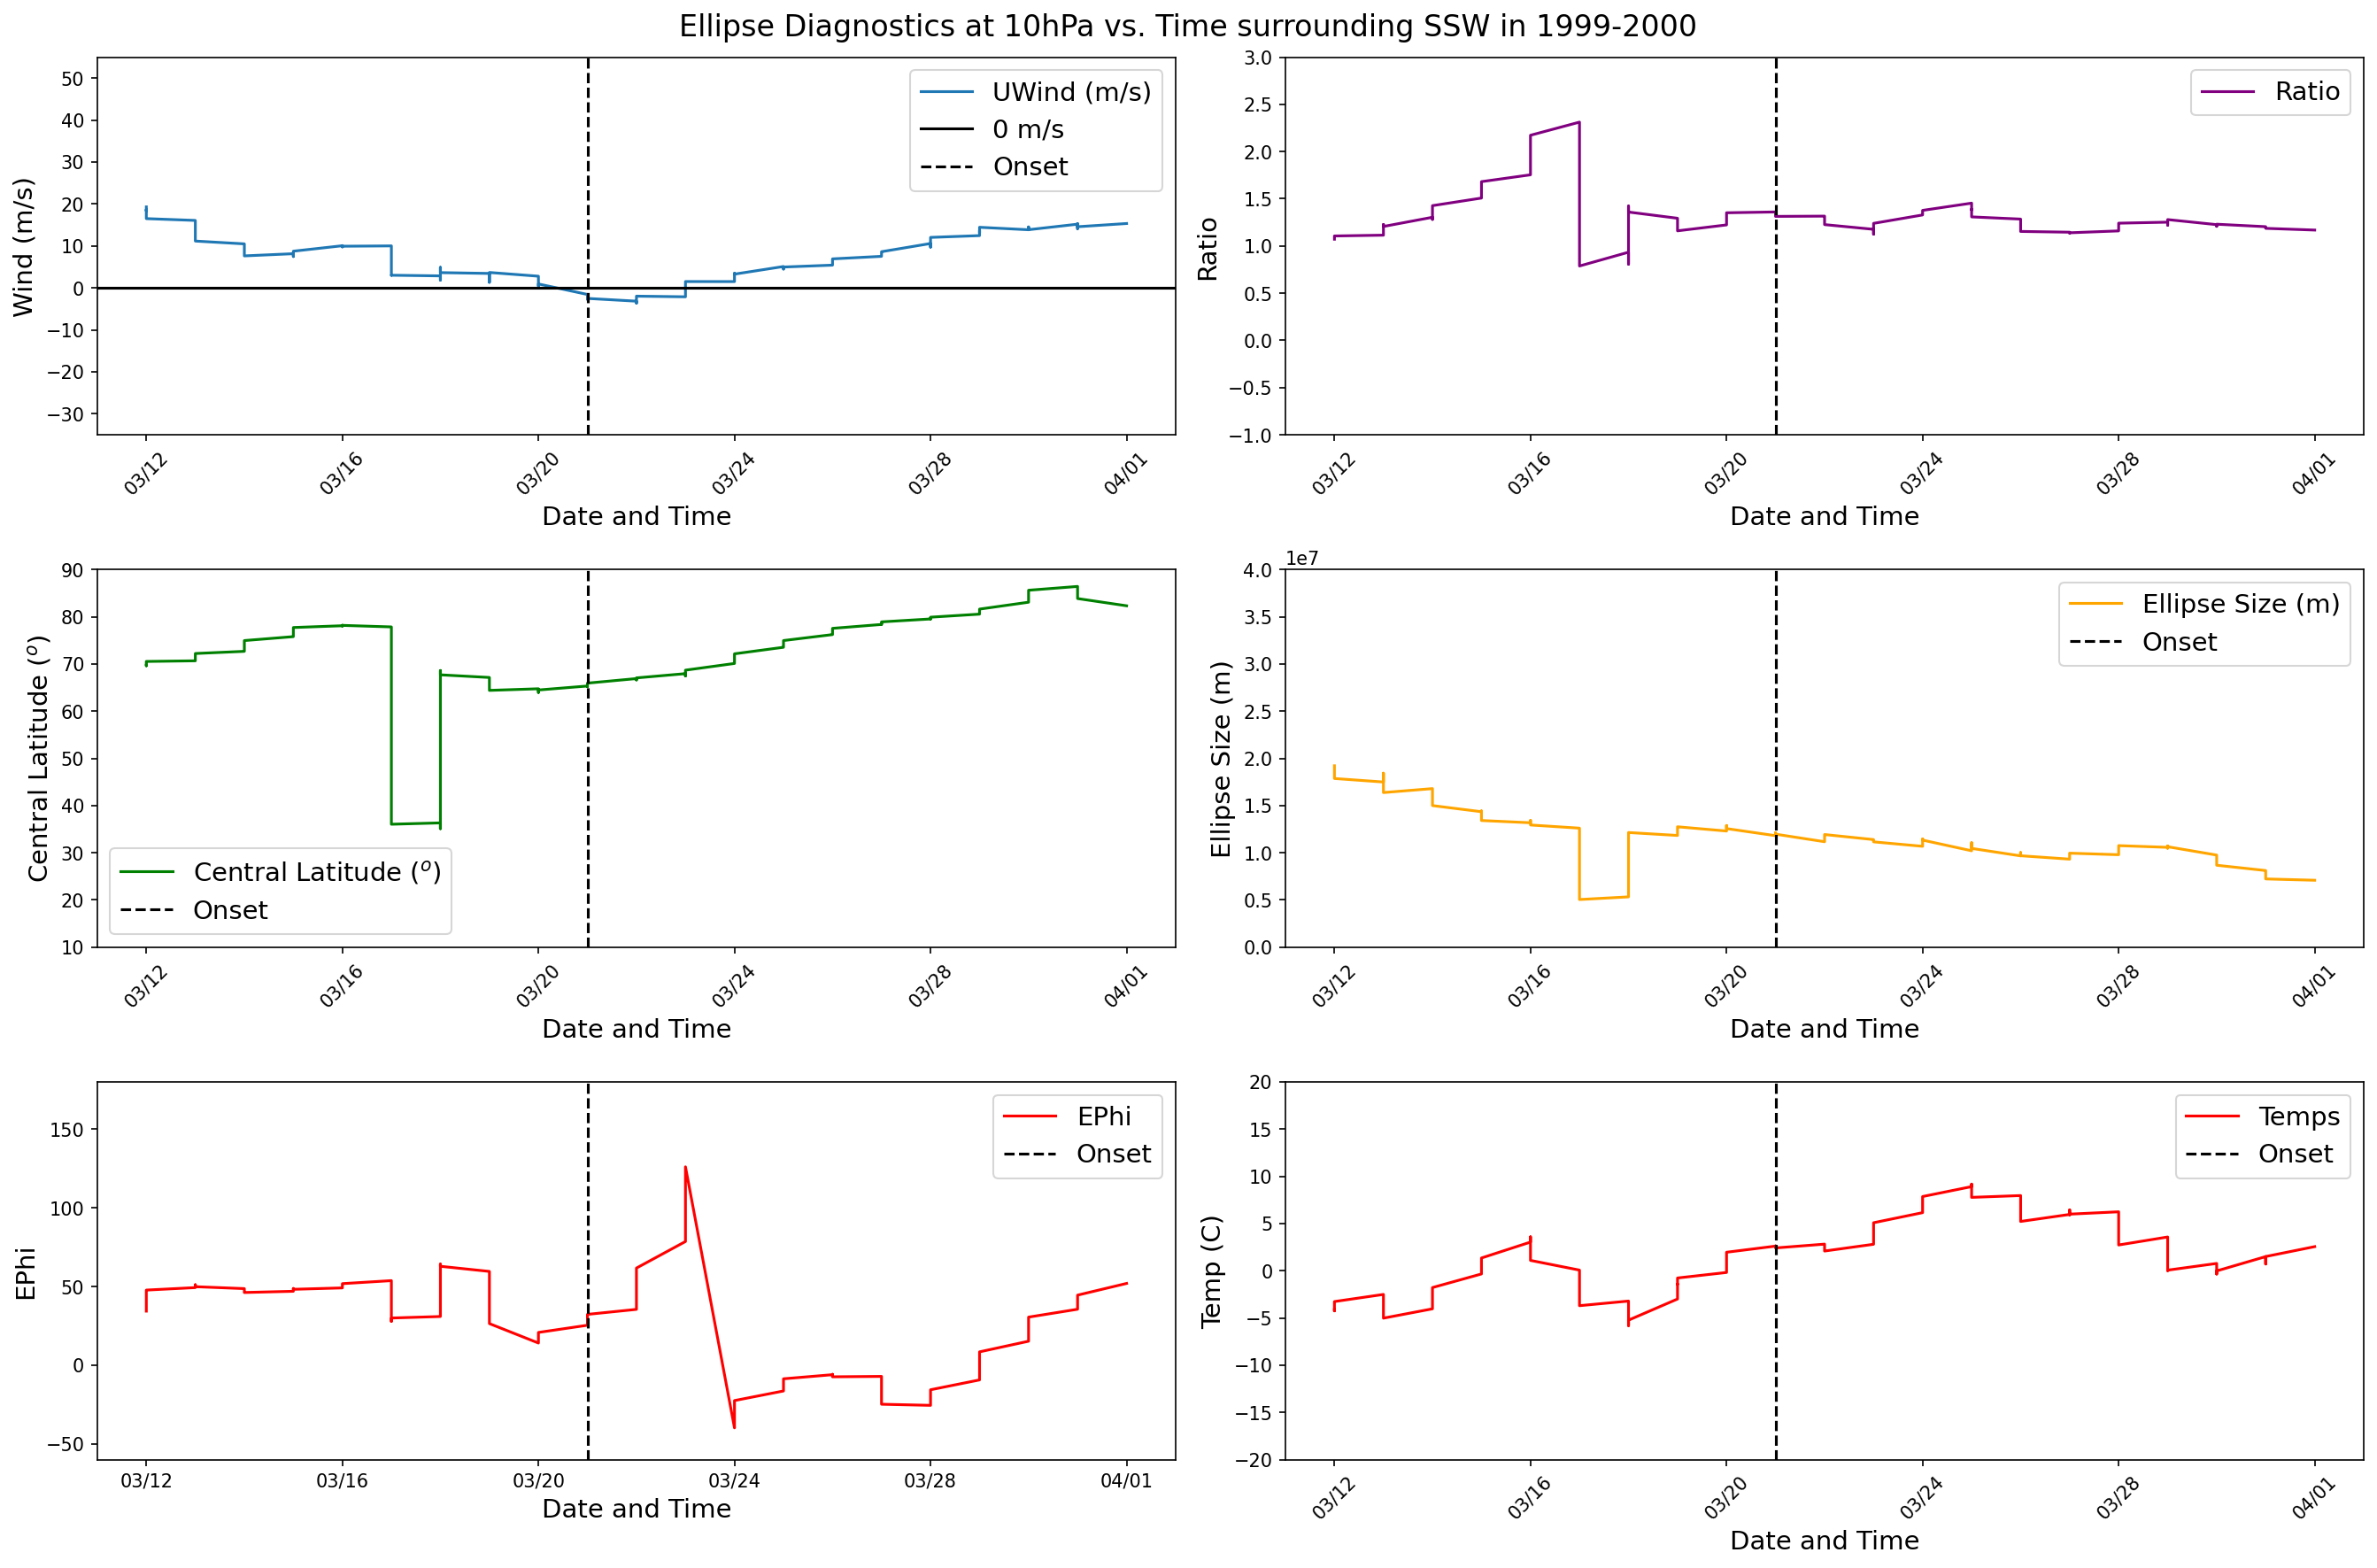

<Figure size 432x288 with 0 Axes>

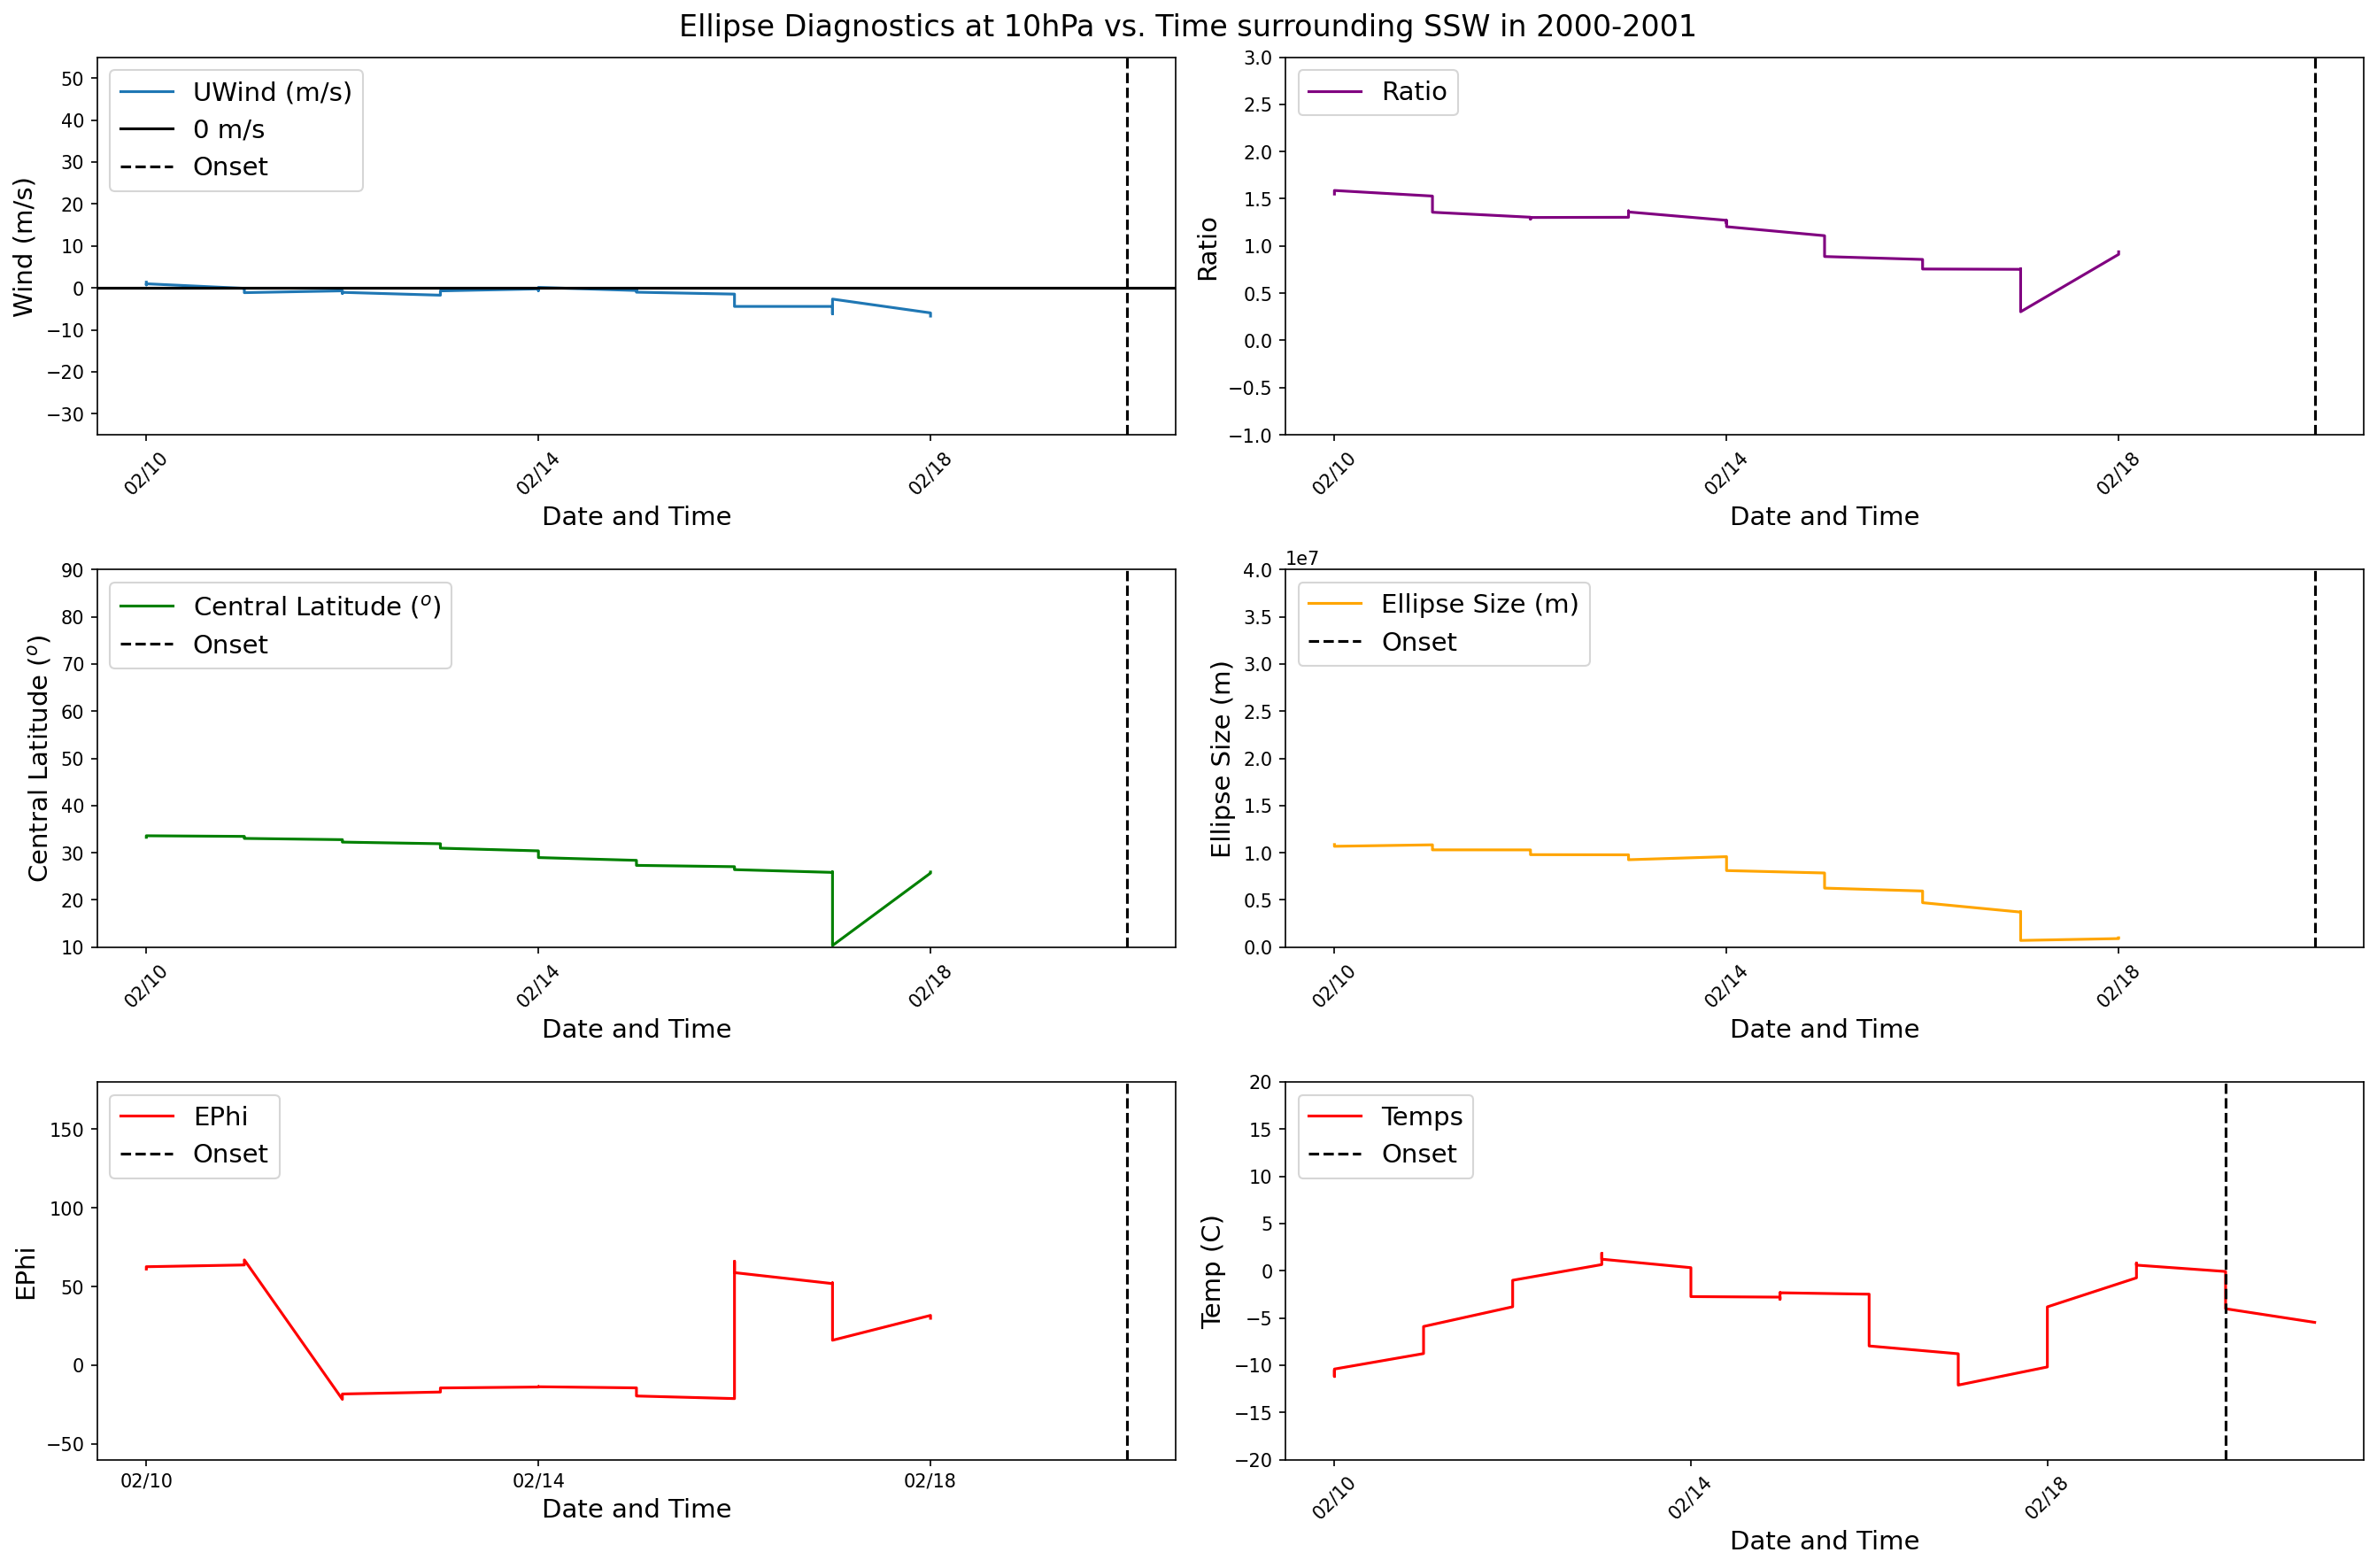

<Figure size 432x288 with 0 Axes>

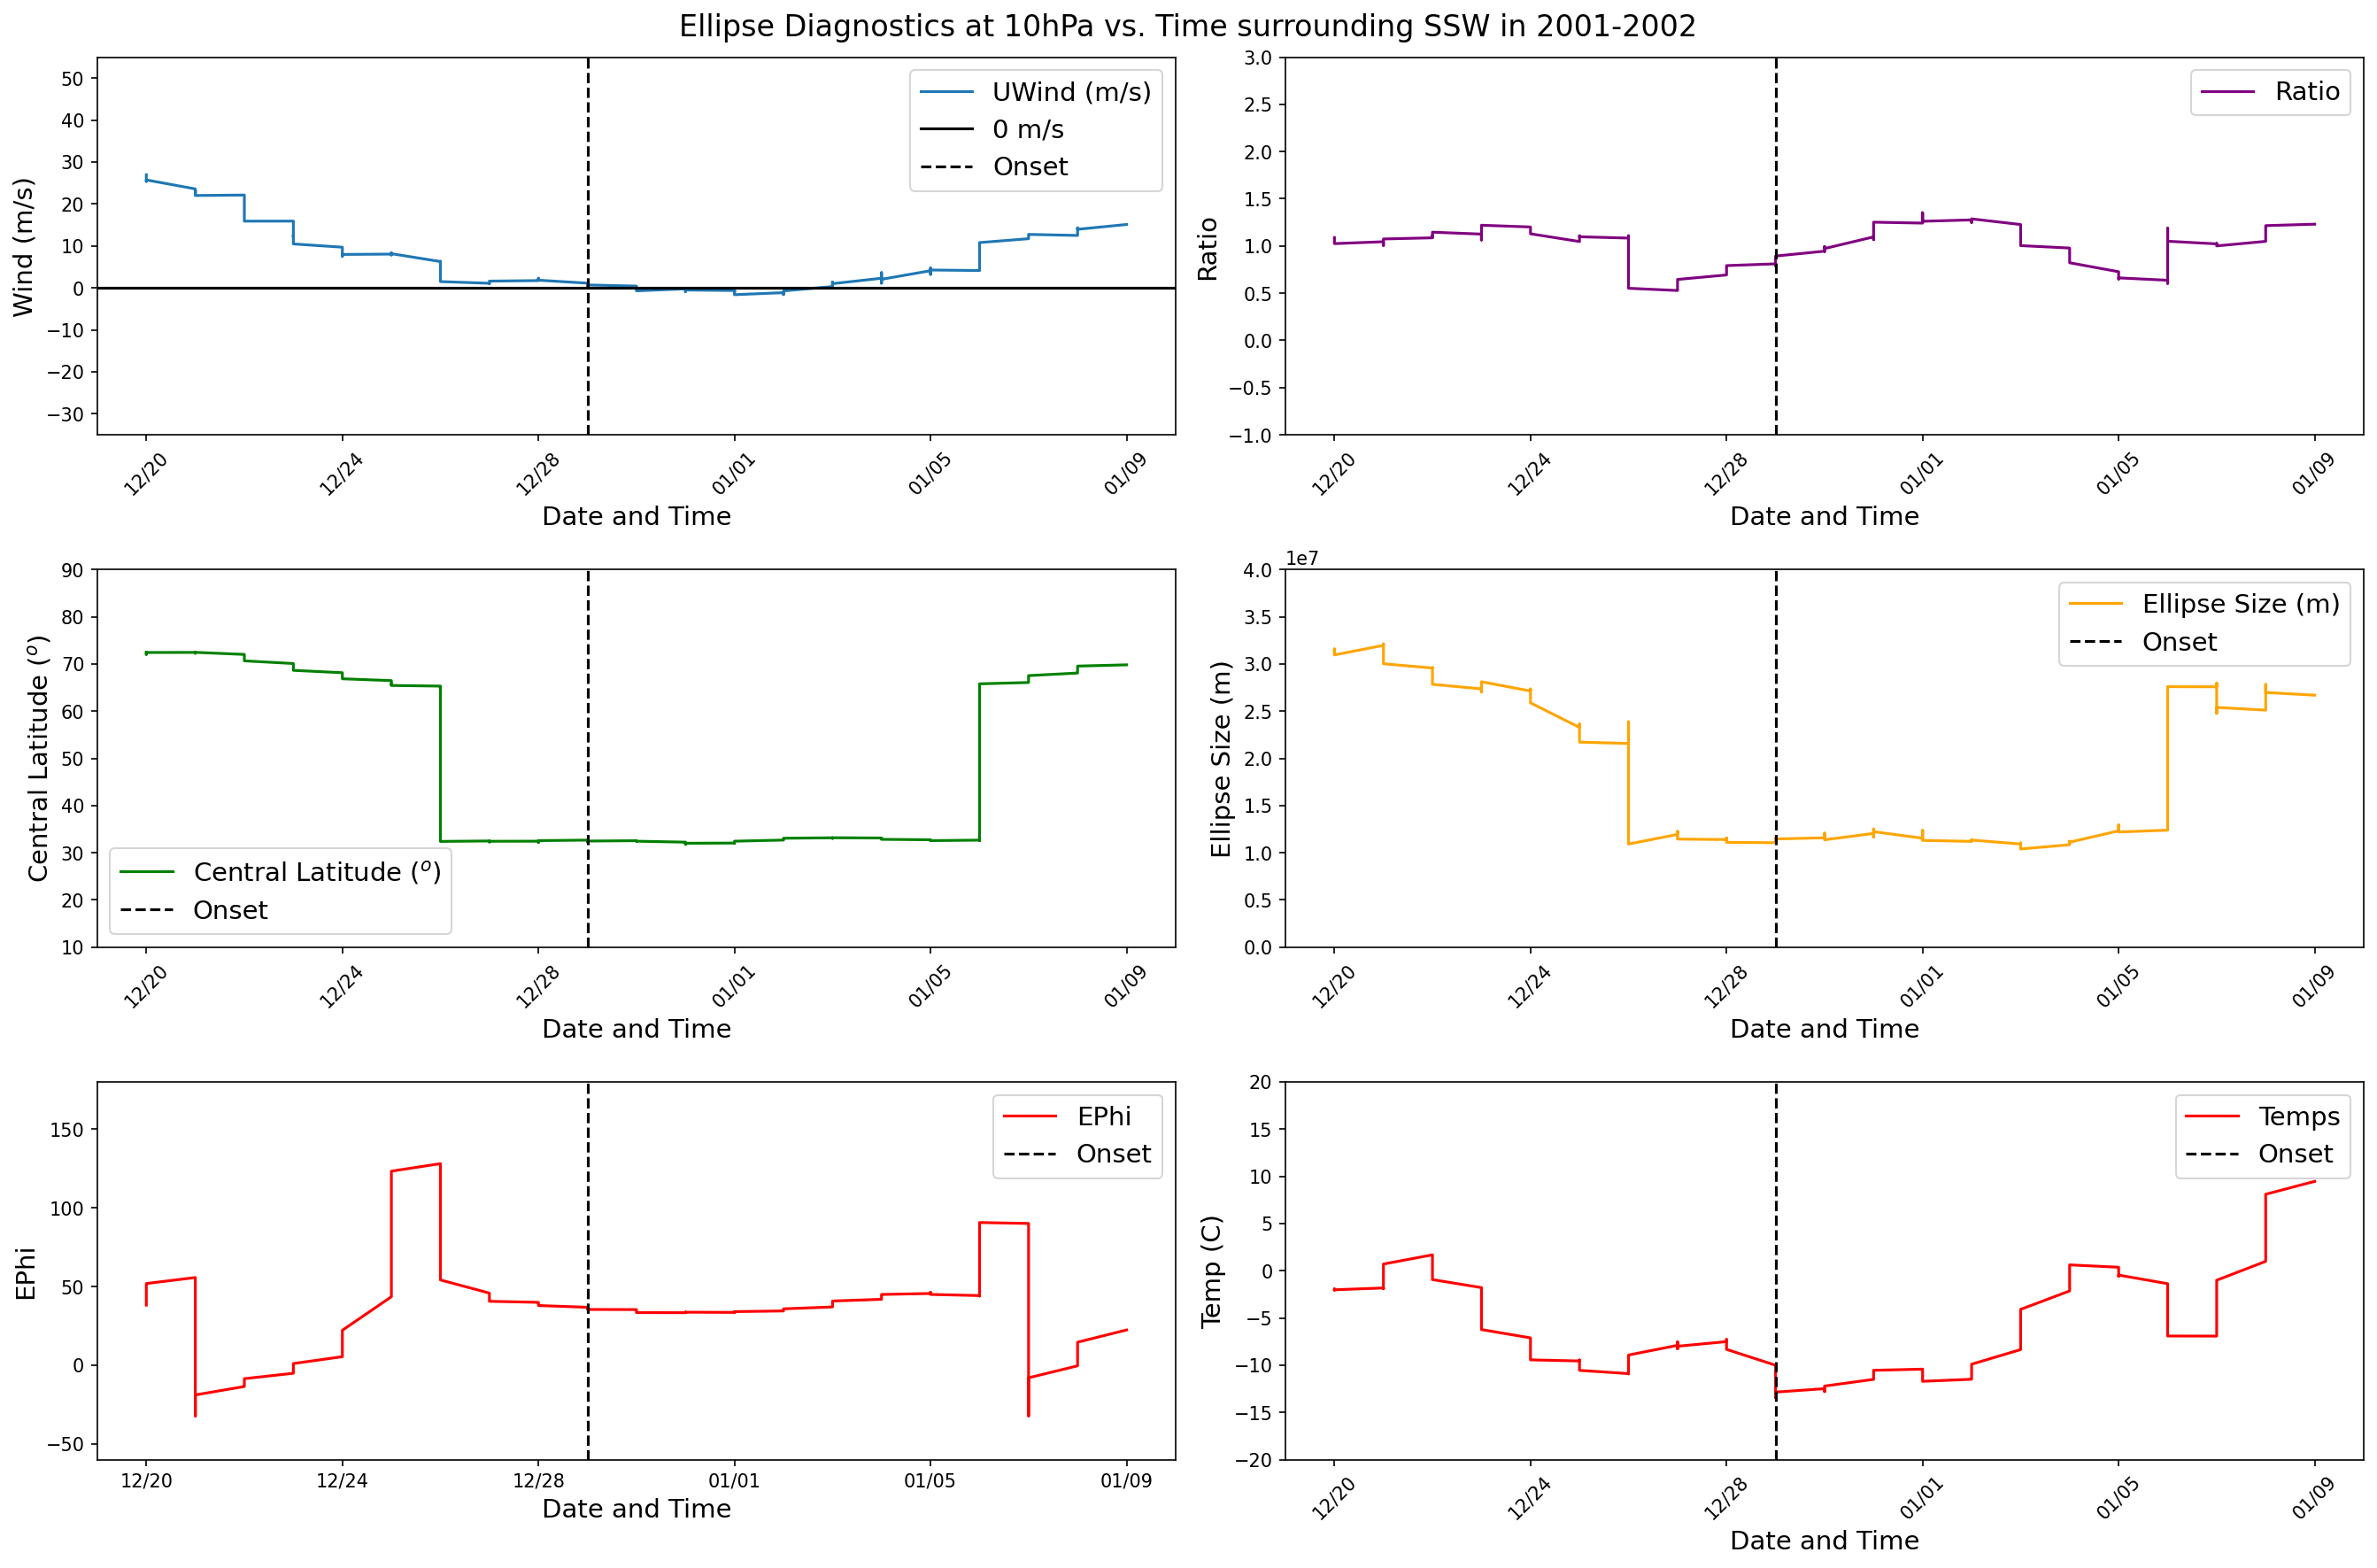

<Figure size 432x288 with 0 Axes>

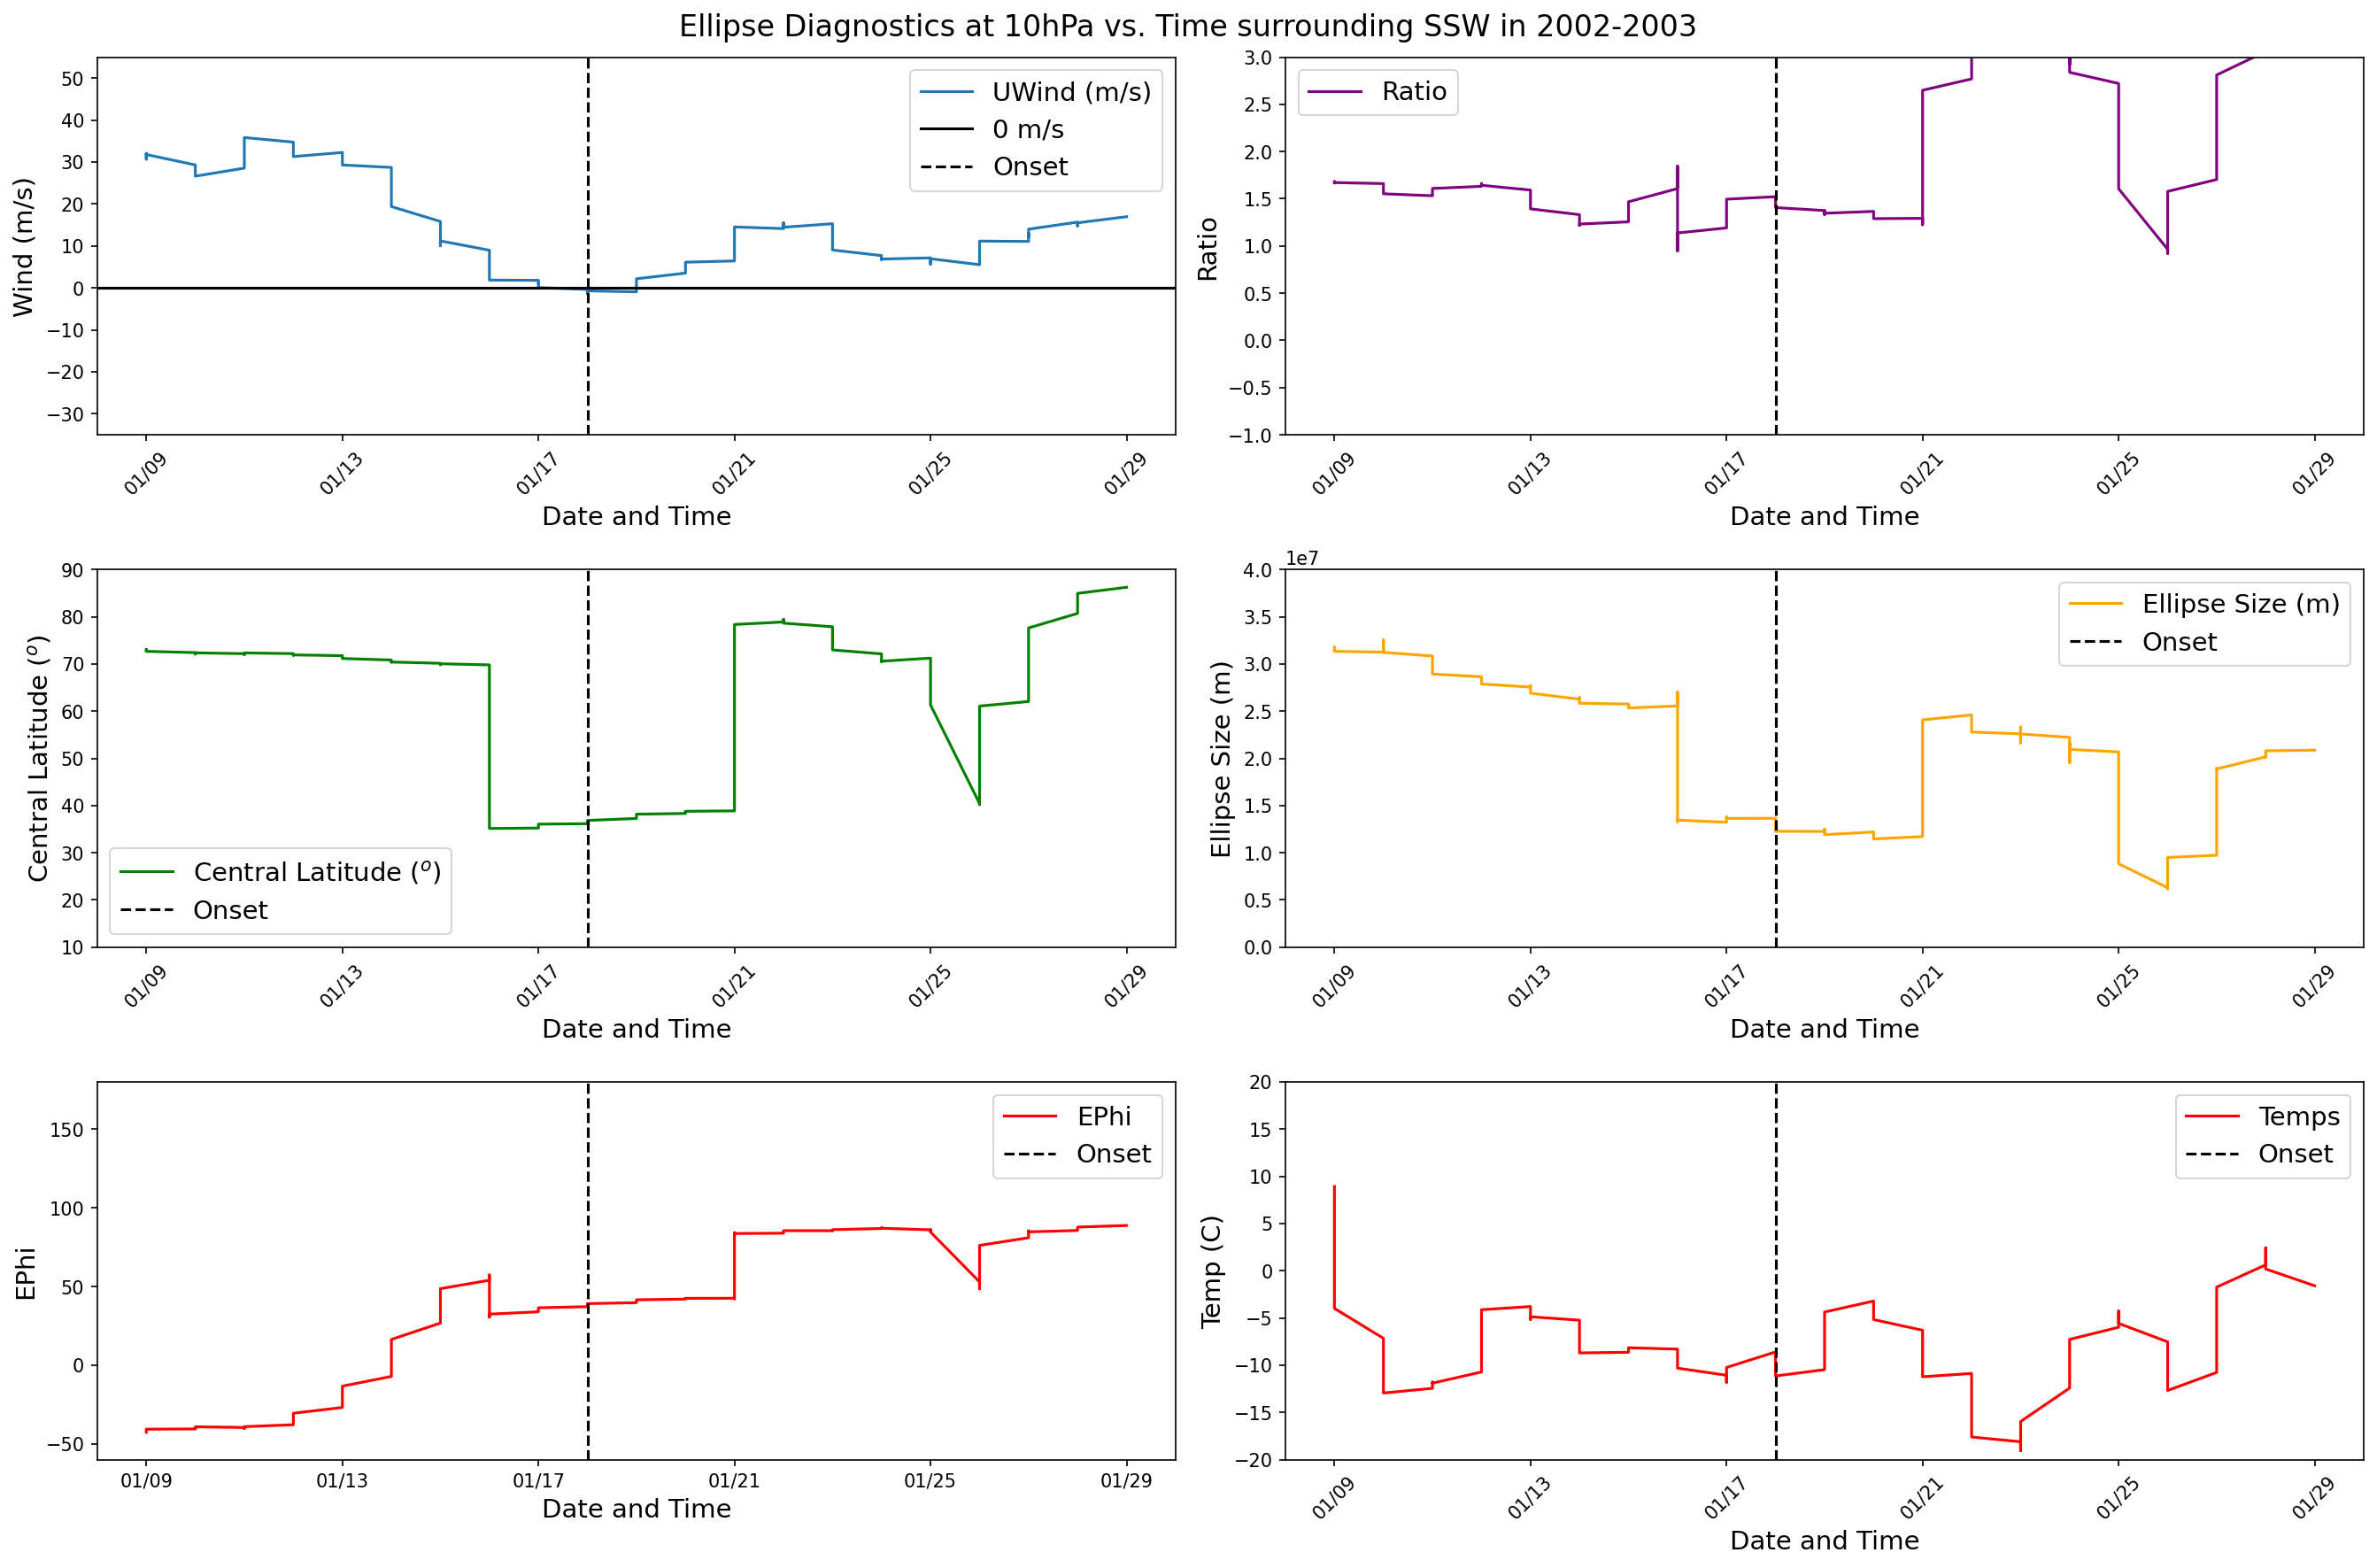

<Figure size 432x288 with 0 Axes>

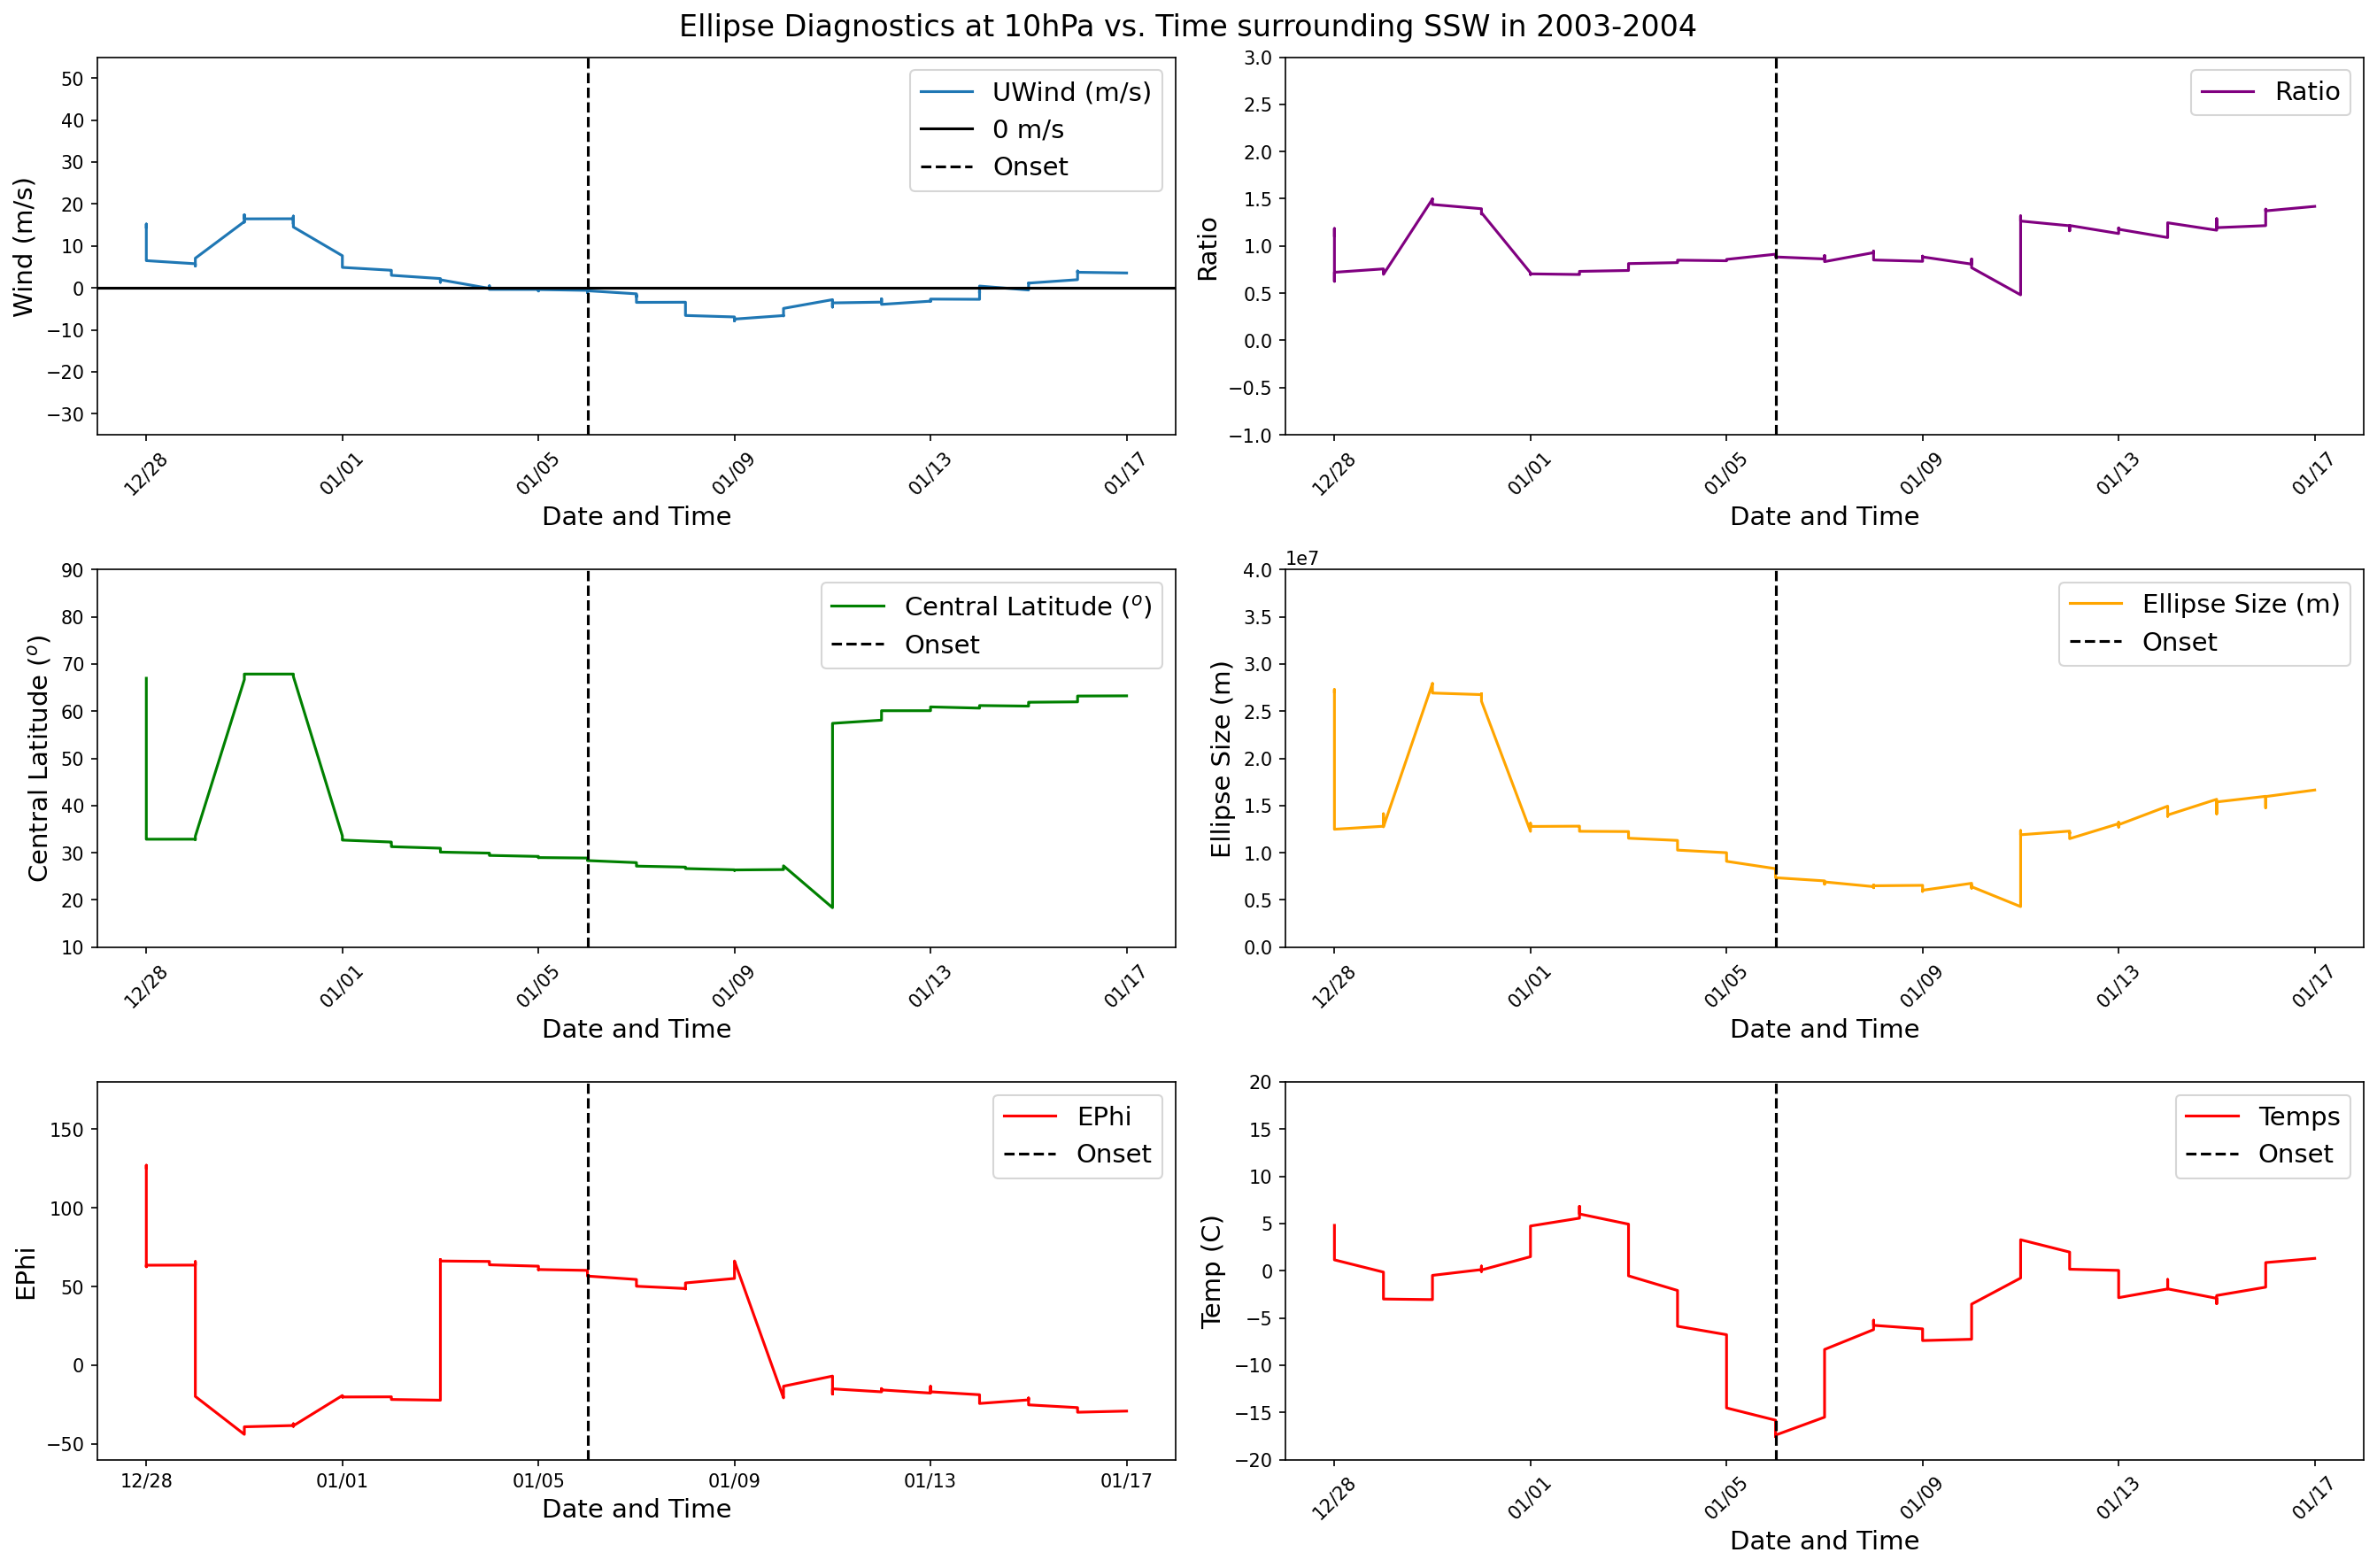

<Figure size 432x288 with 0 Axes>

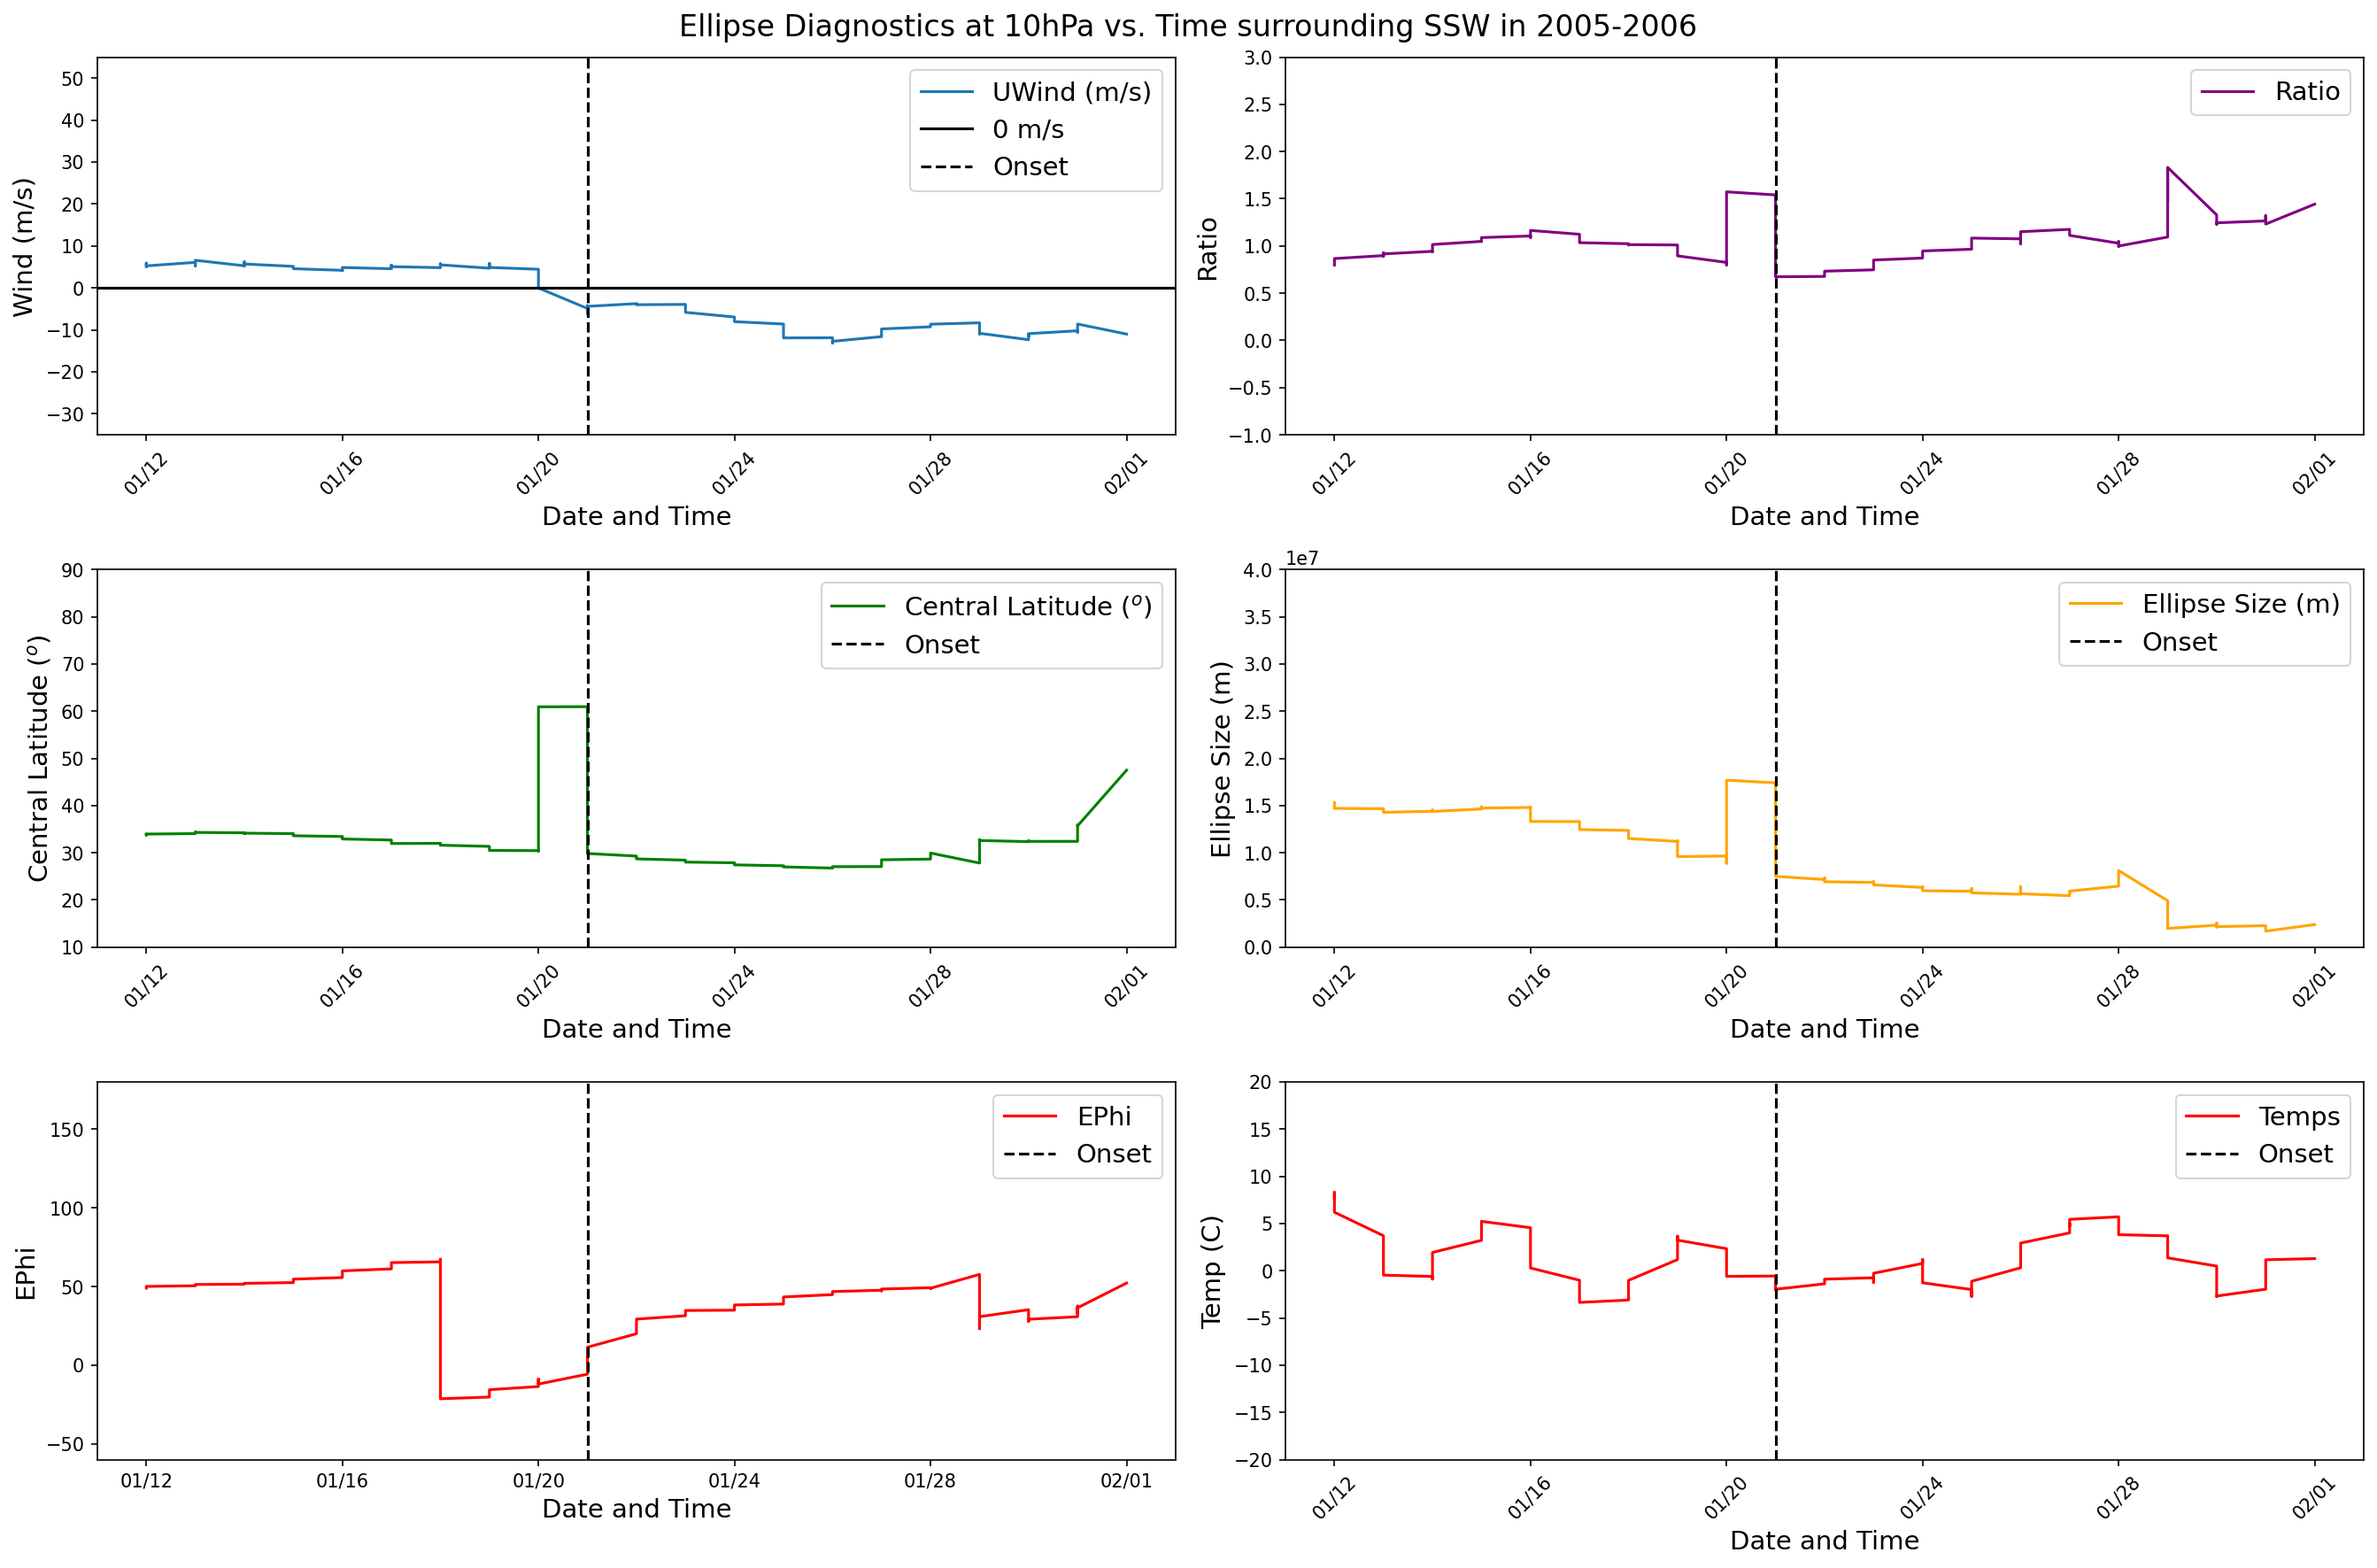

<Figure size 432x288 with 0 Axes>

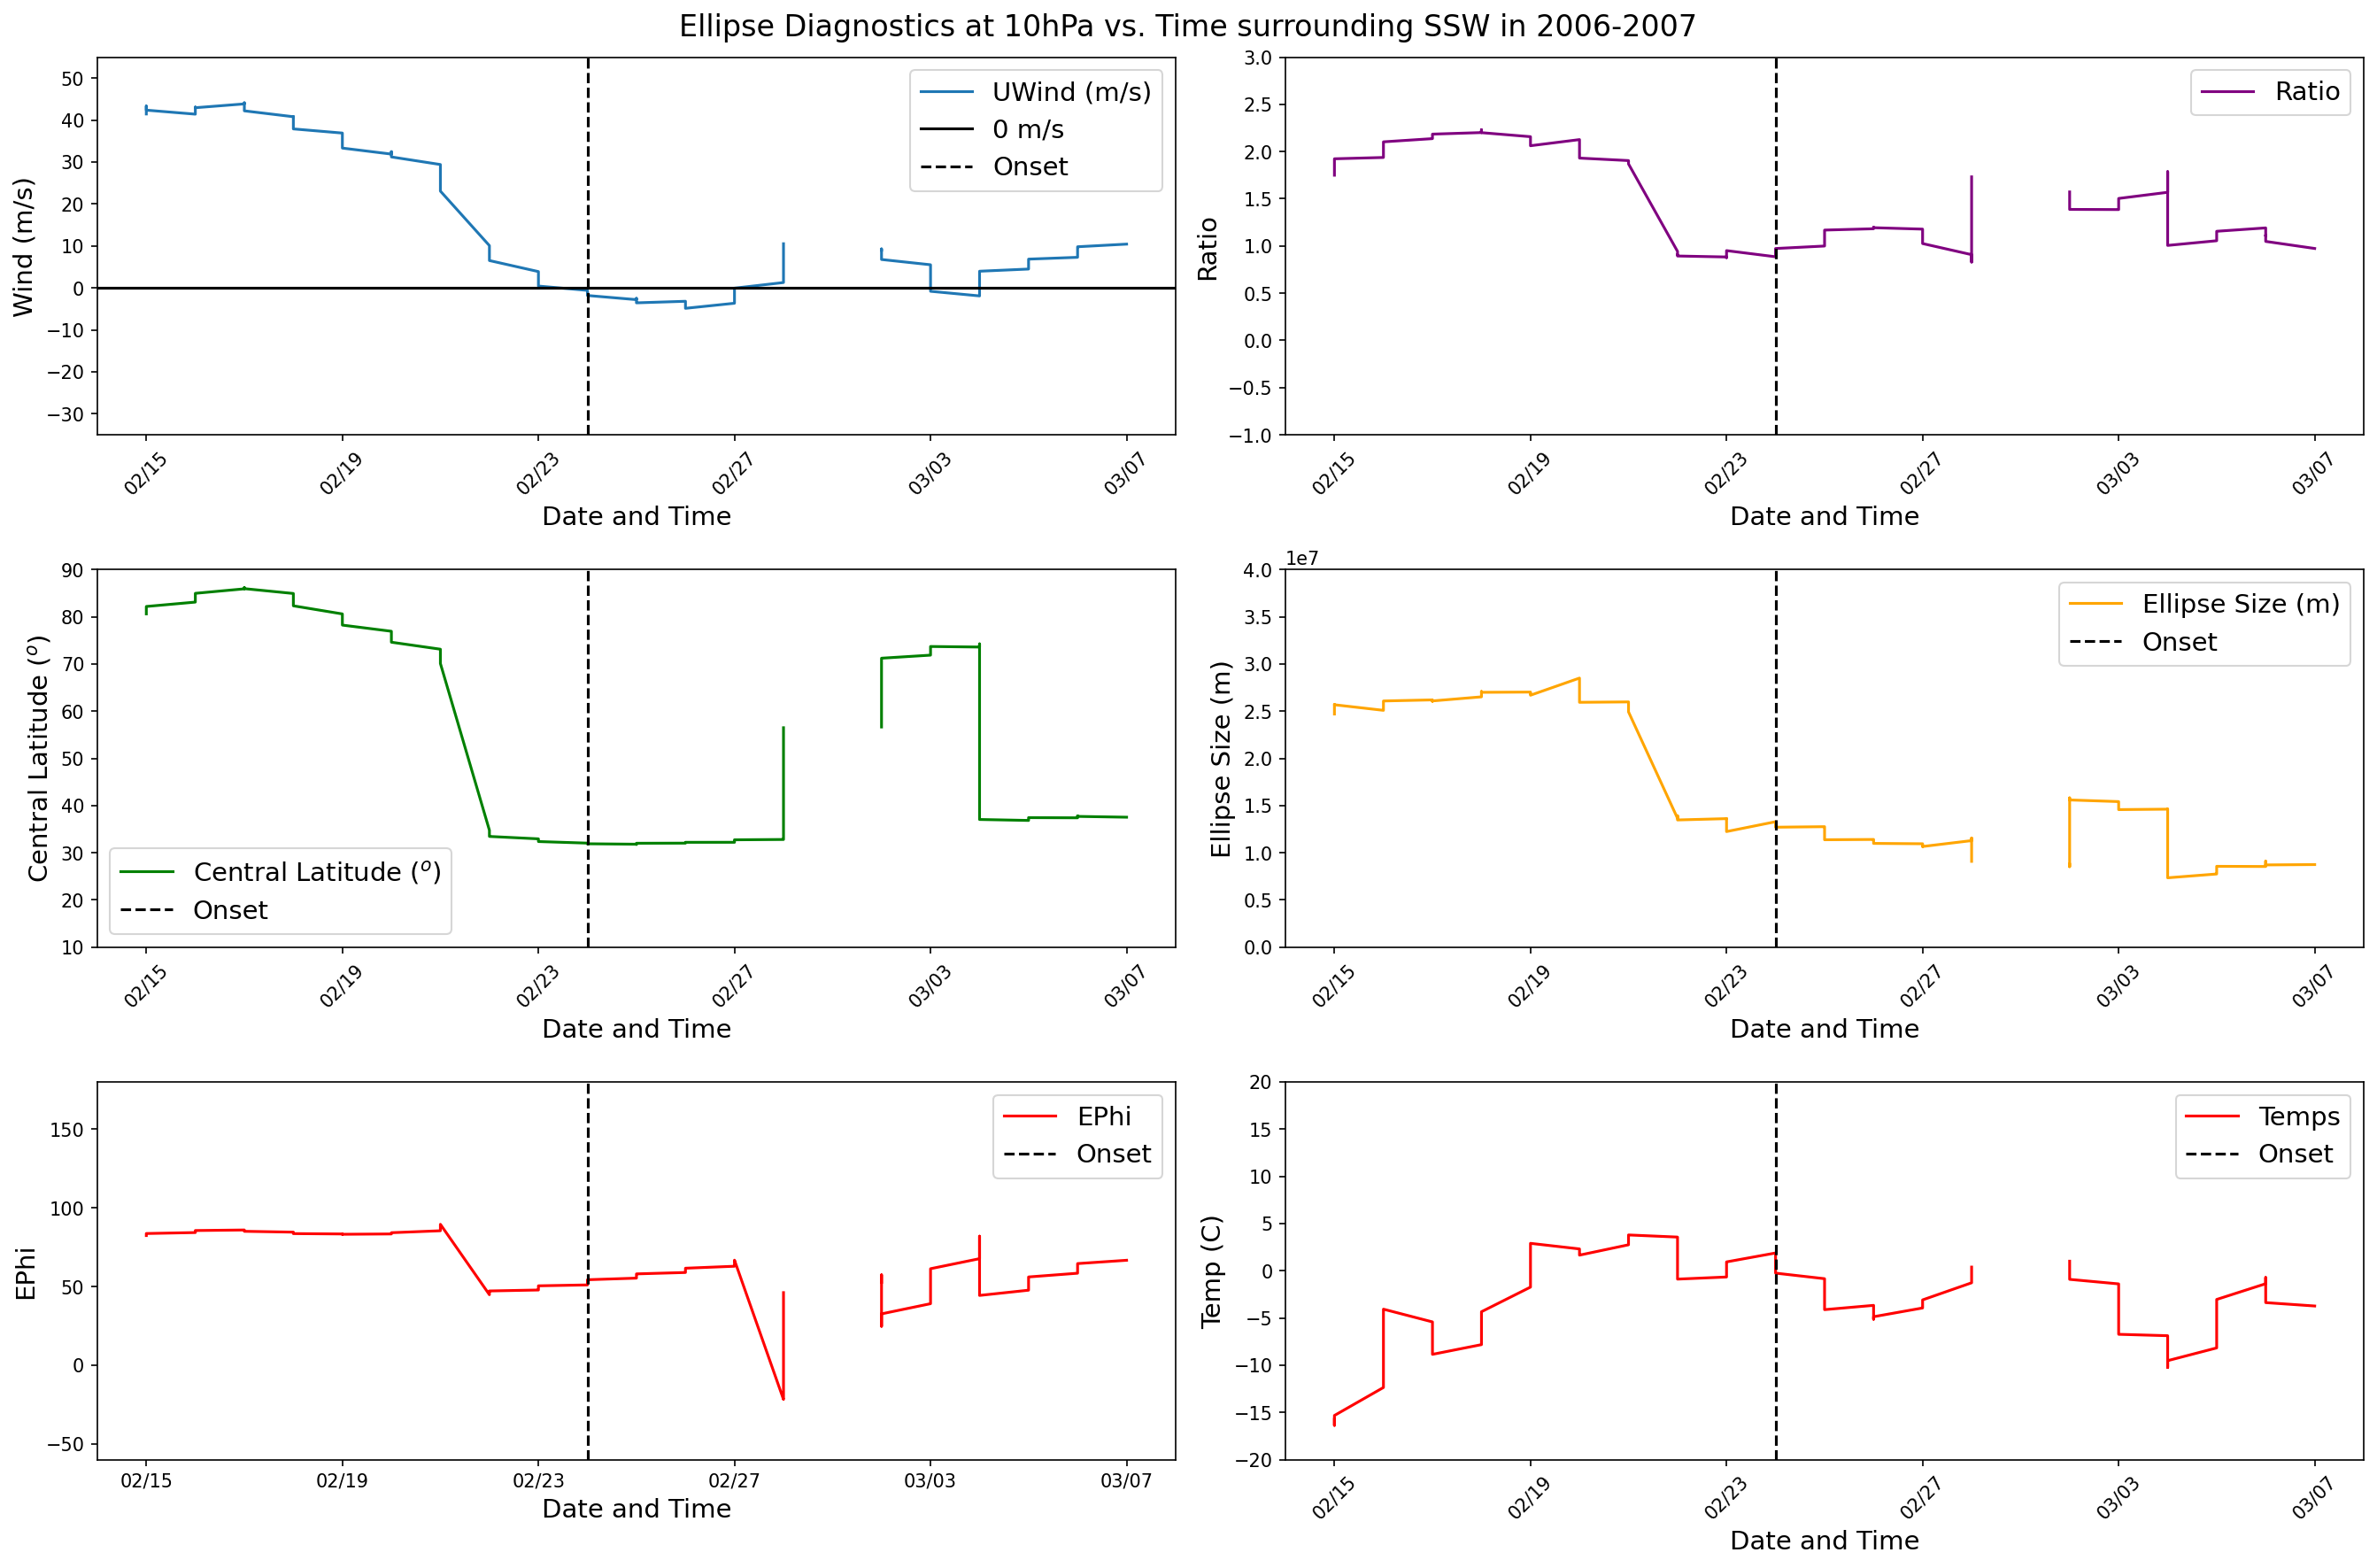

<Figure size 432x288 with 0 Axes>

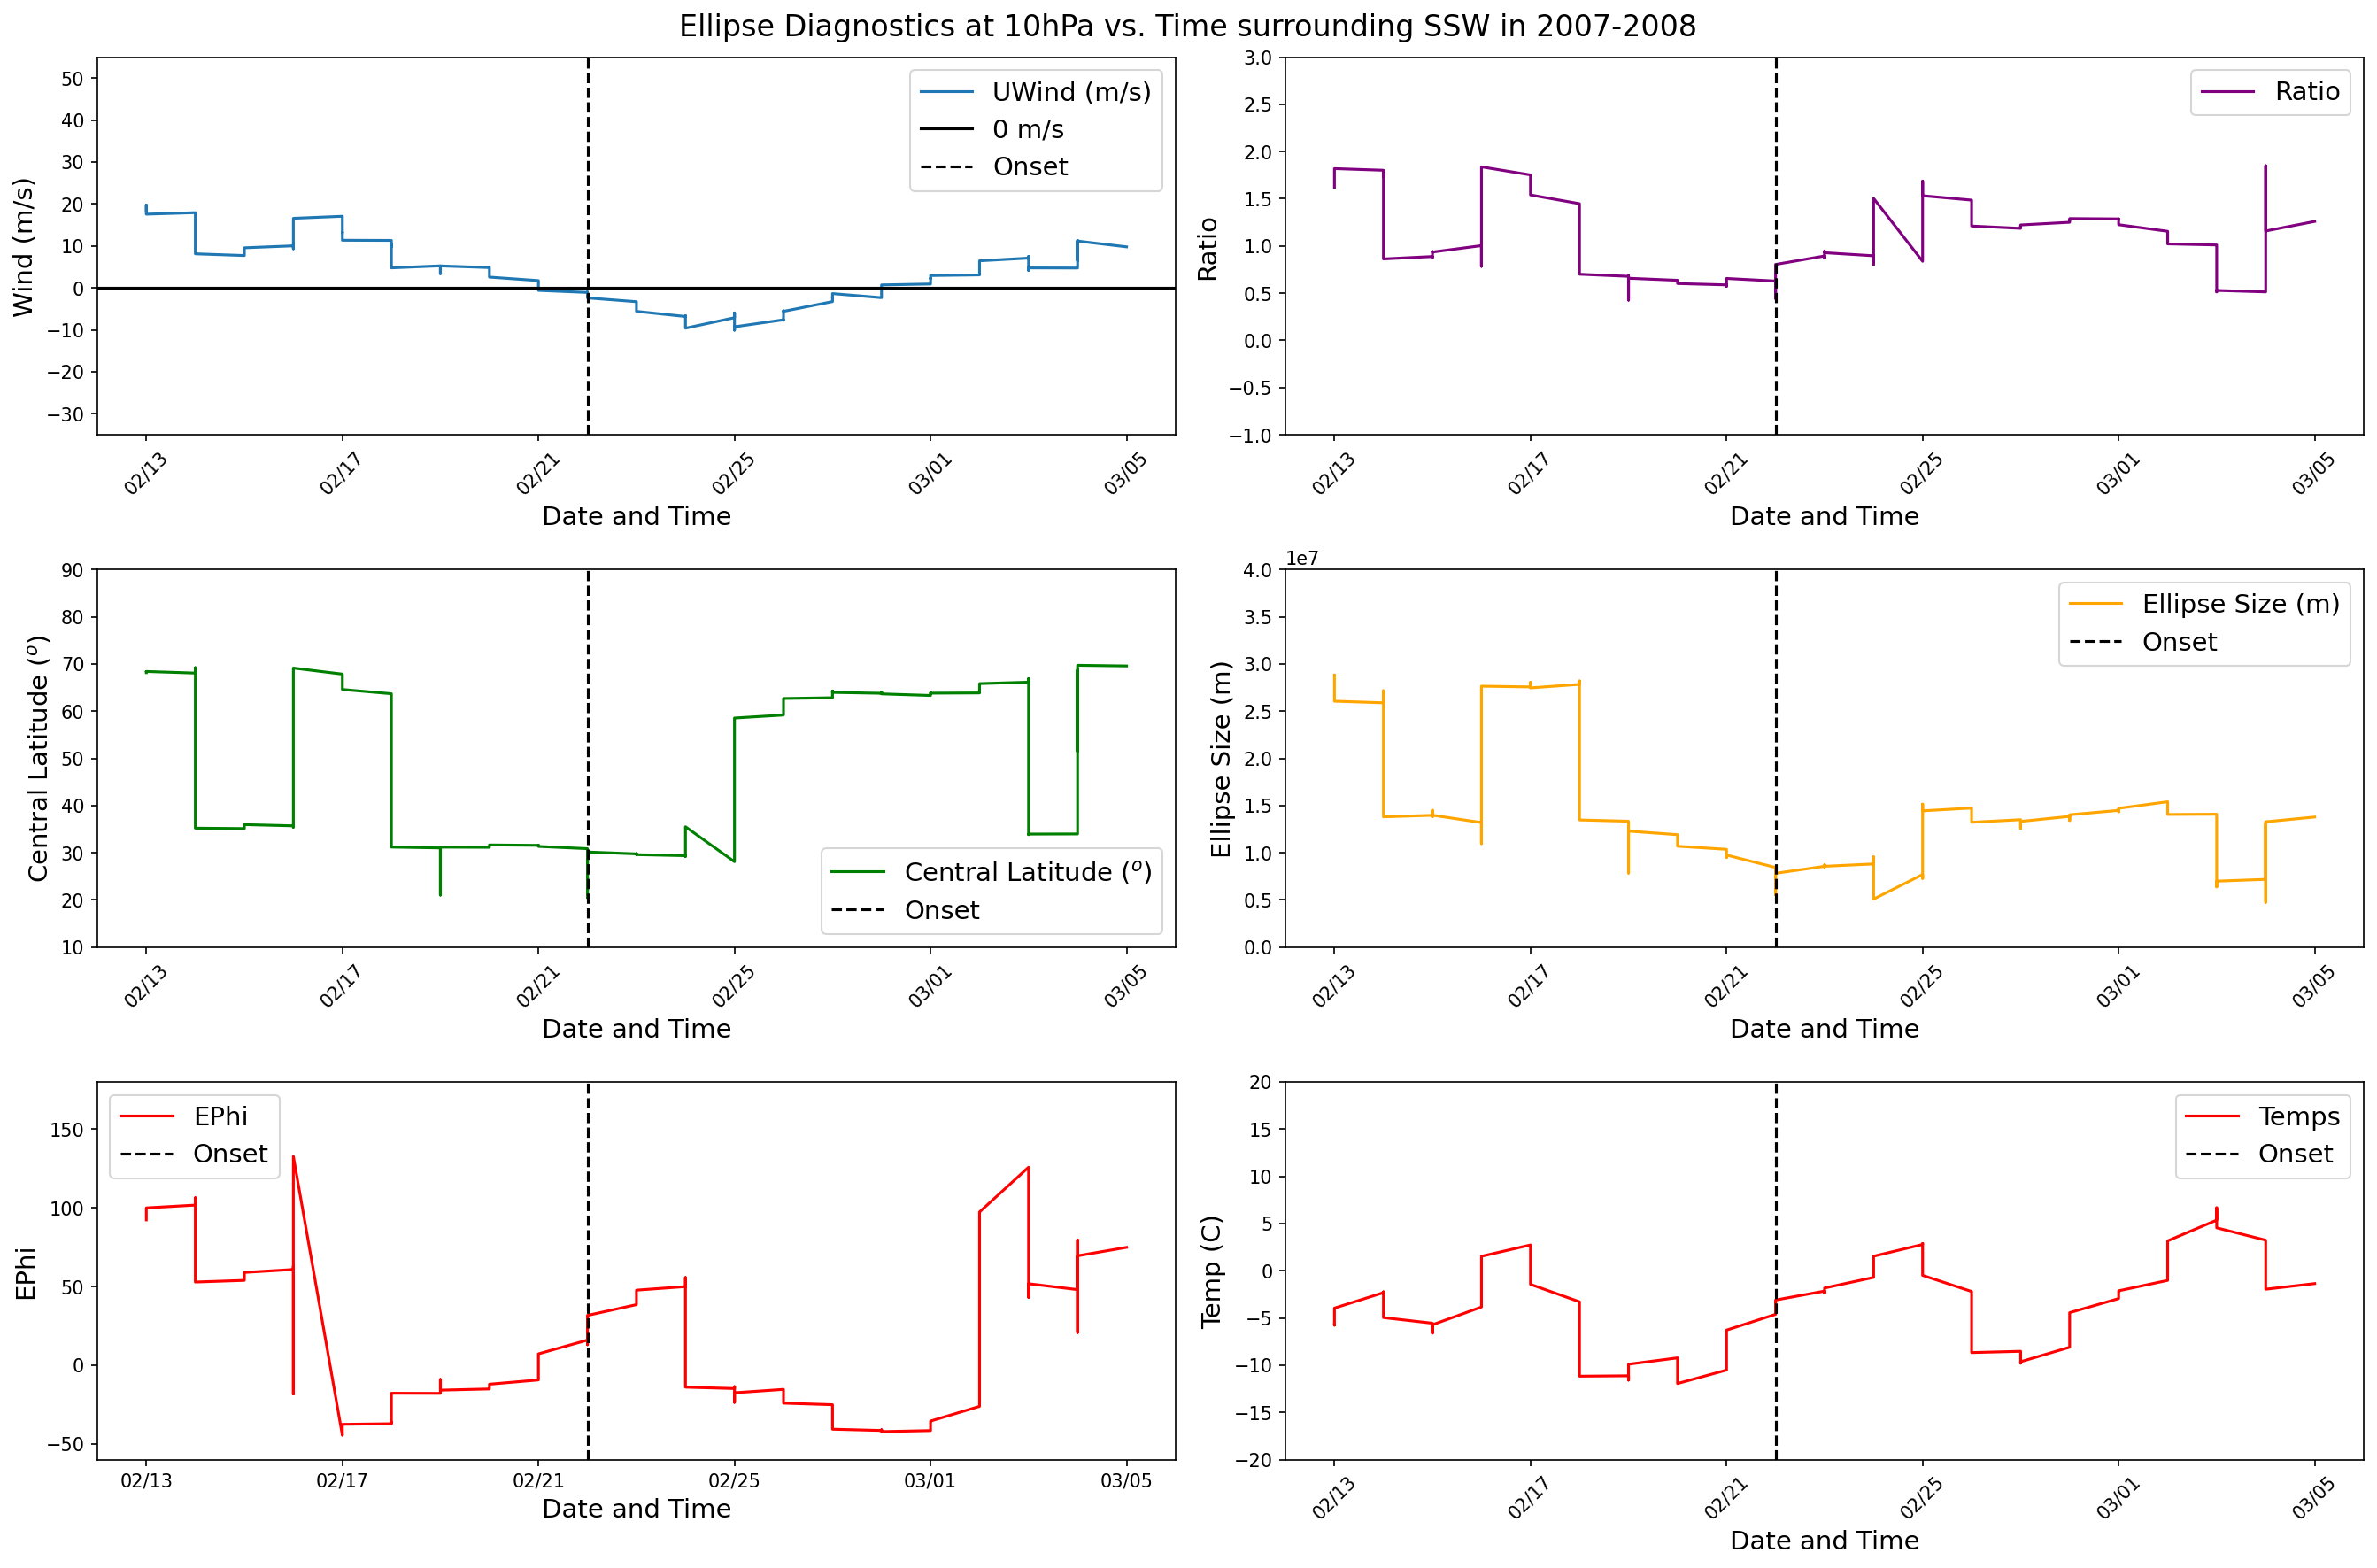

<Figure size 432x288 with 0 Axes>

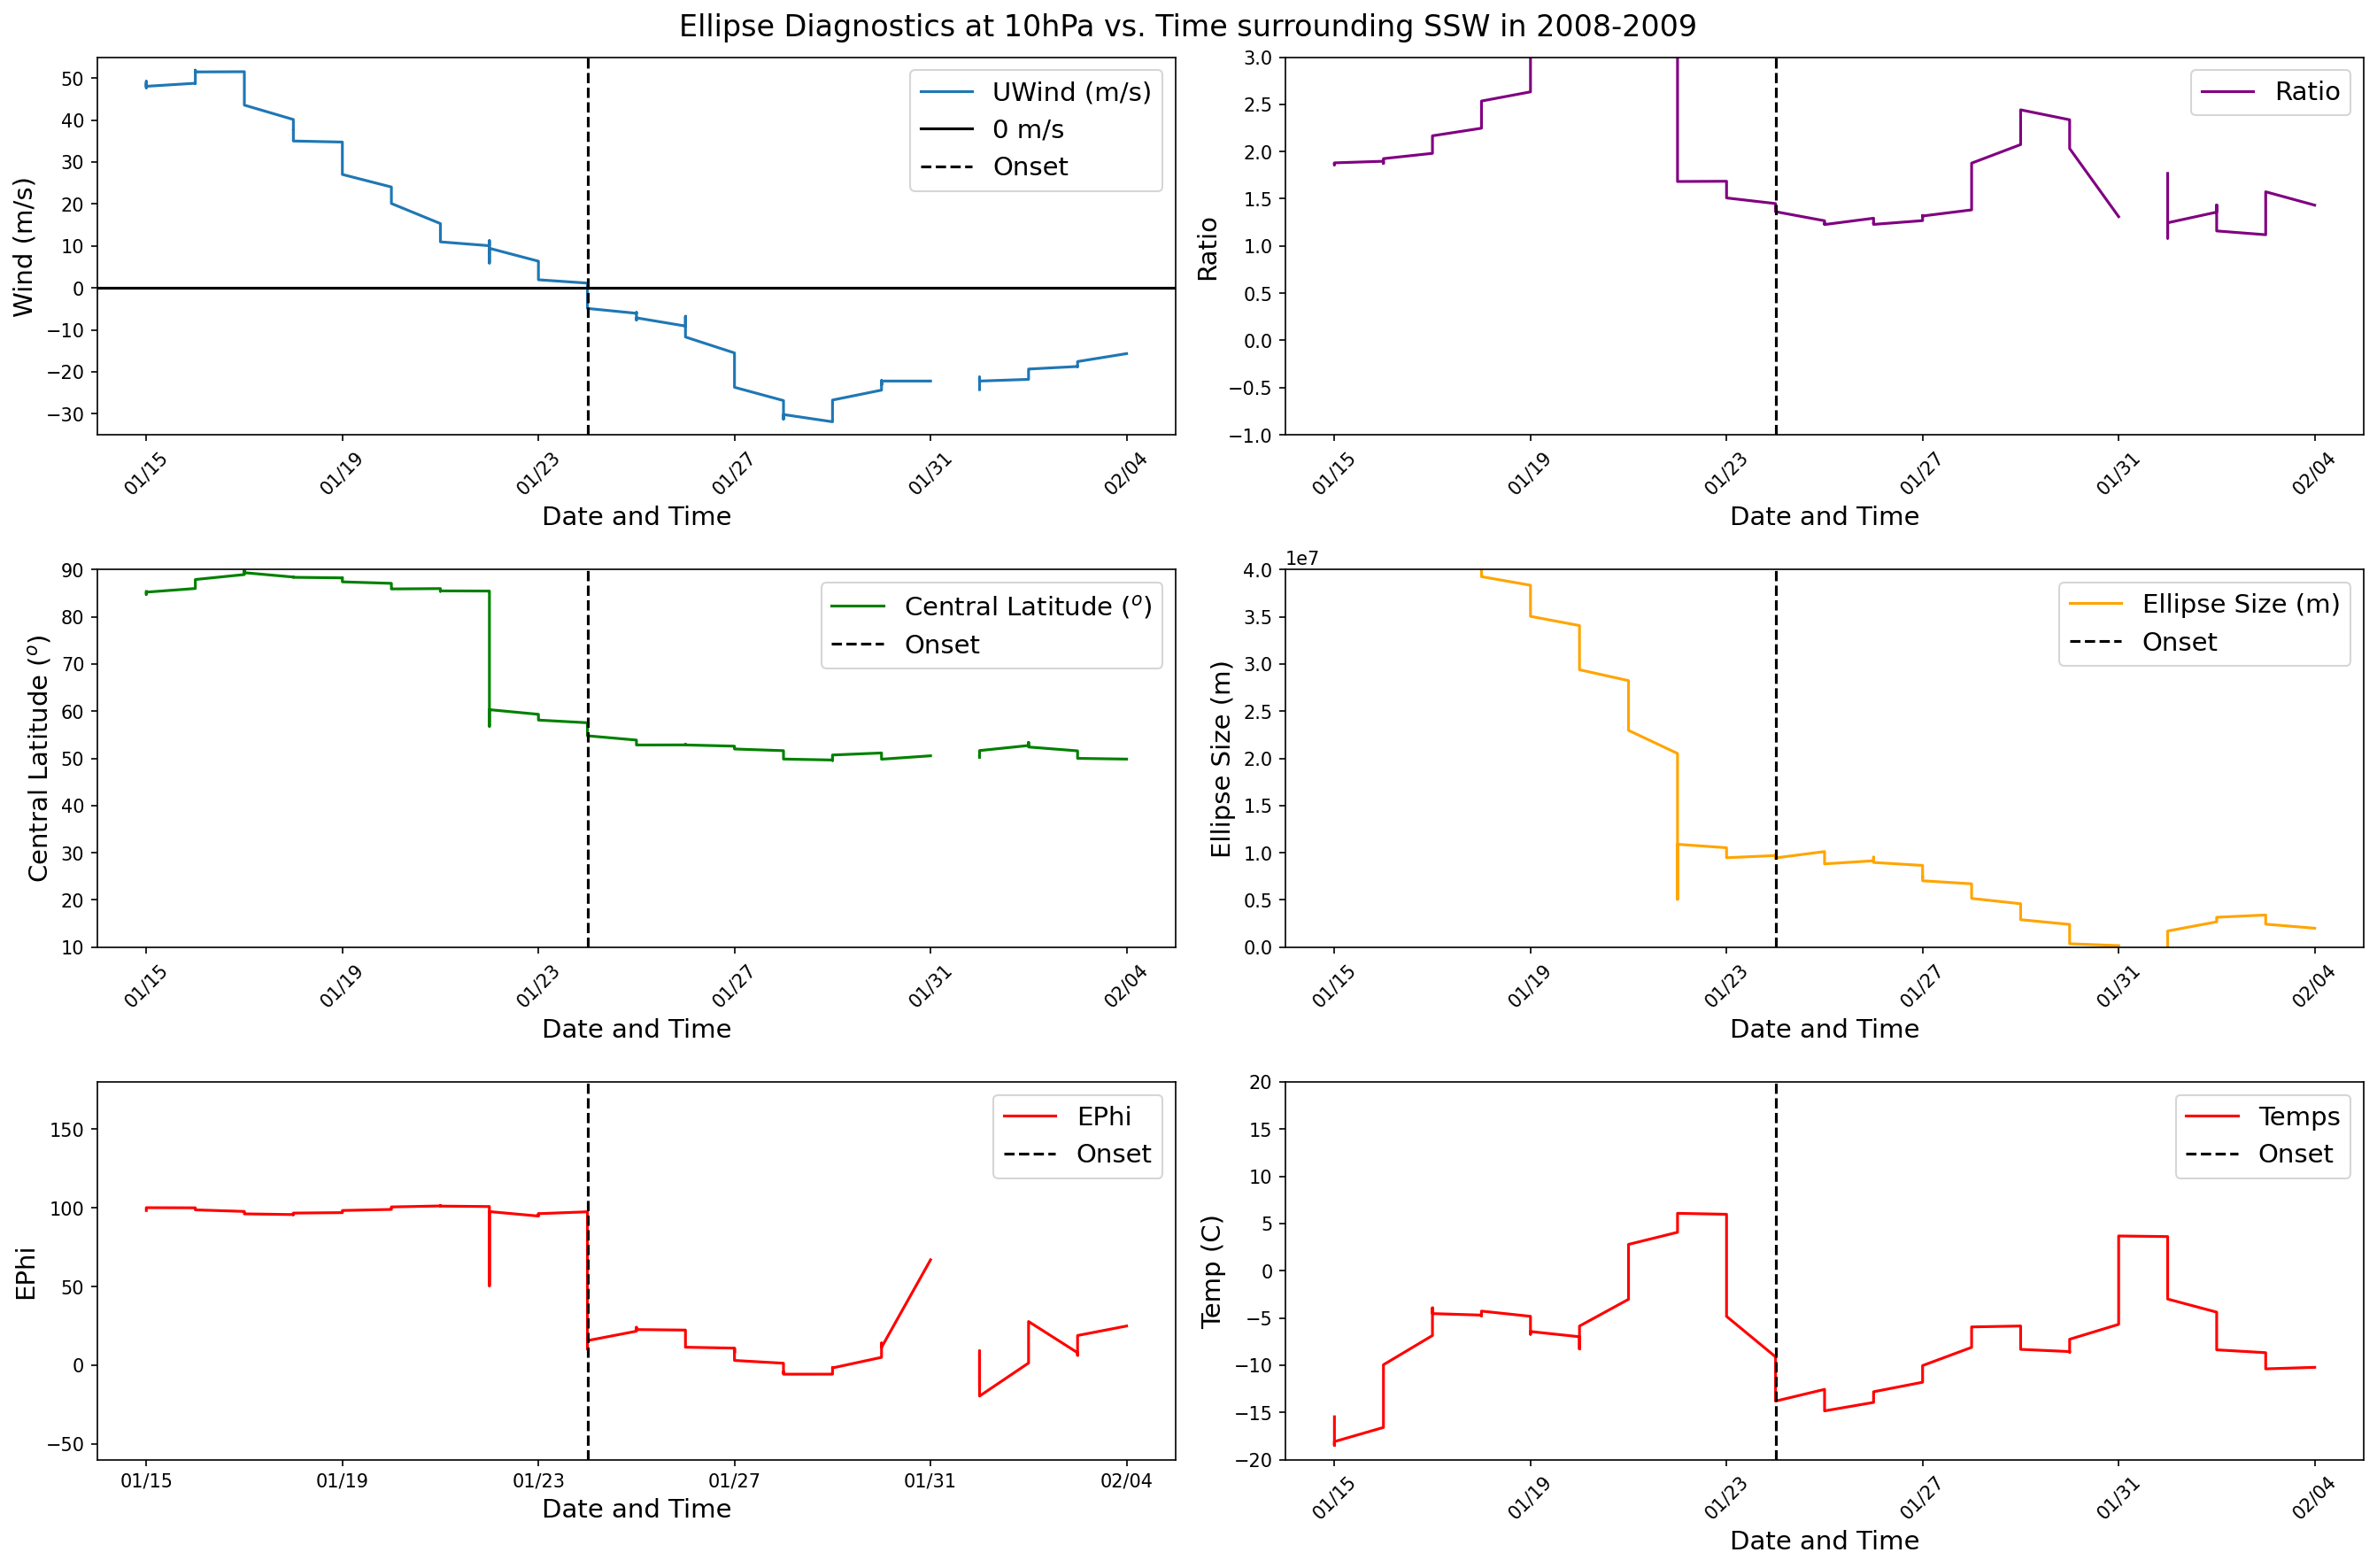

<Figure size 432x288 with 0 Axes>

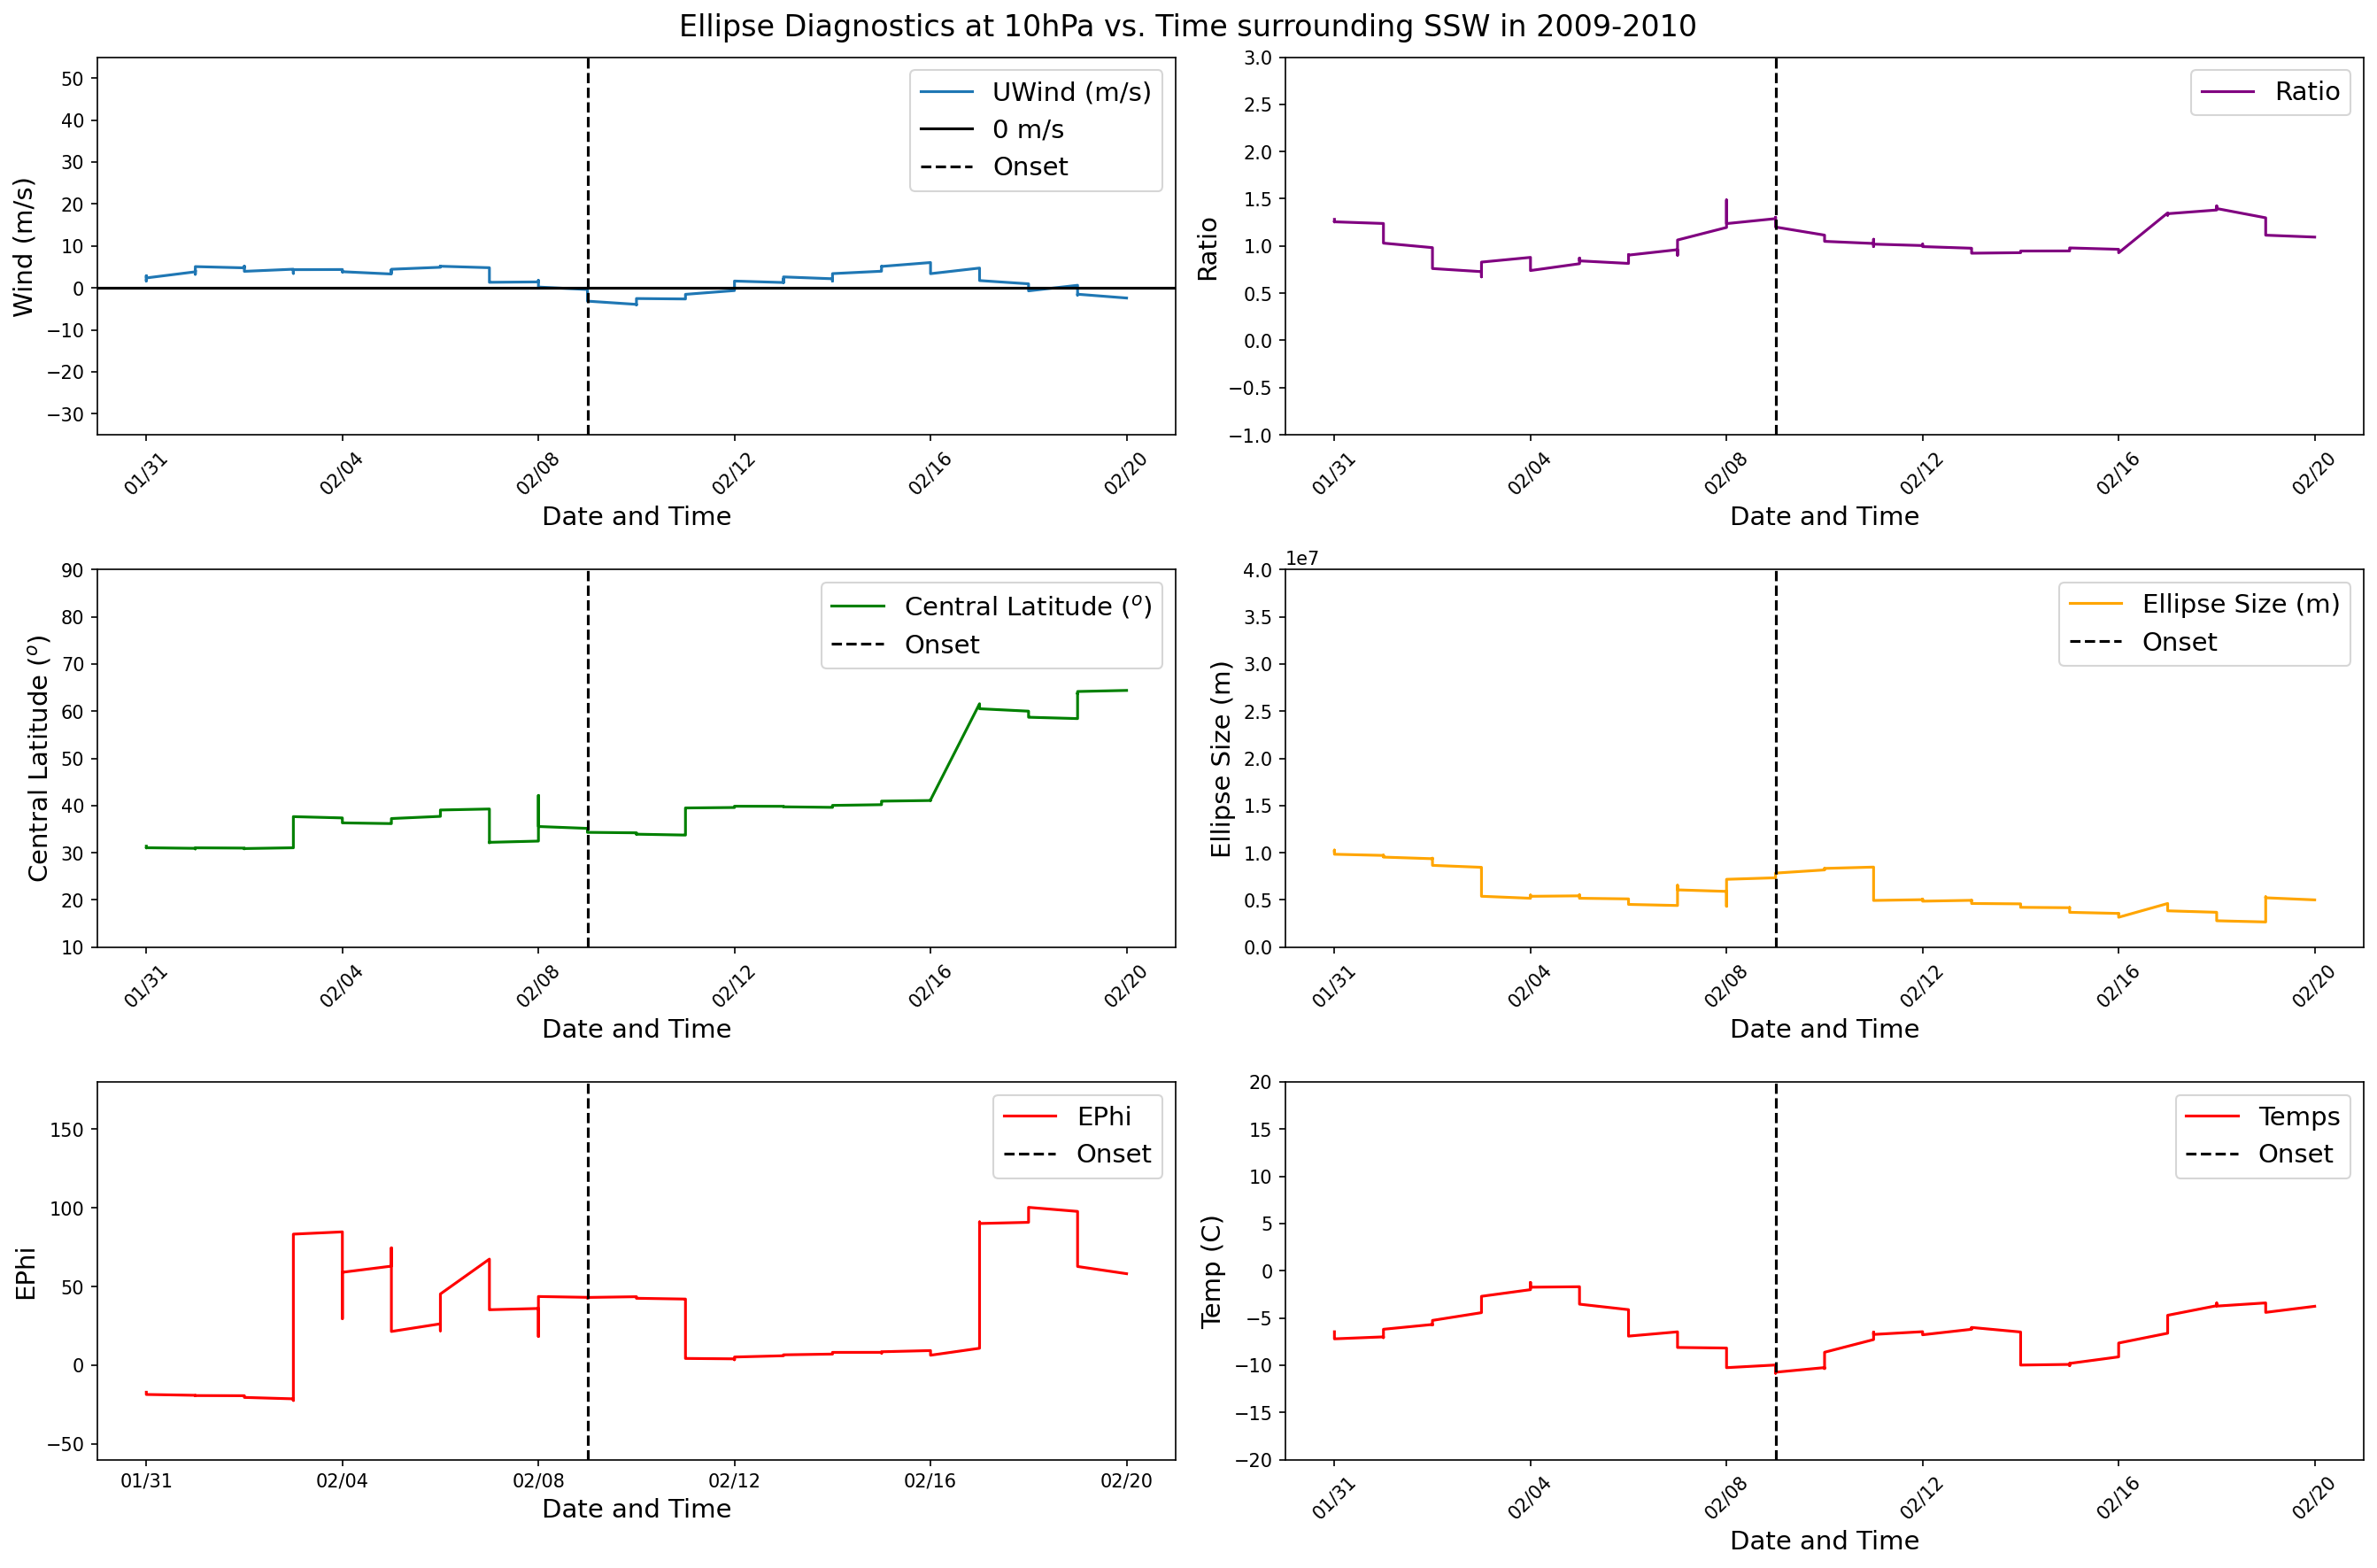

<Figure size 432x288 with 0 Axes>

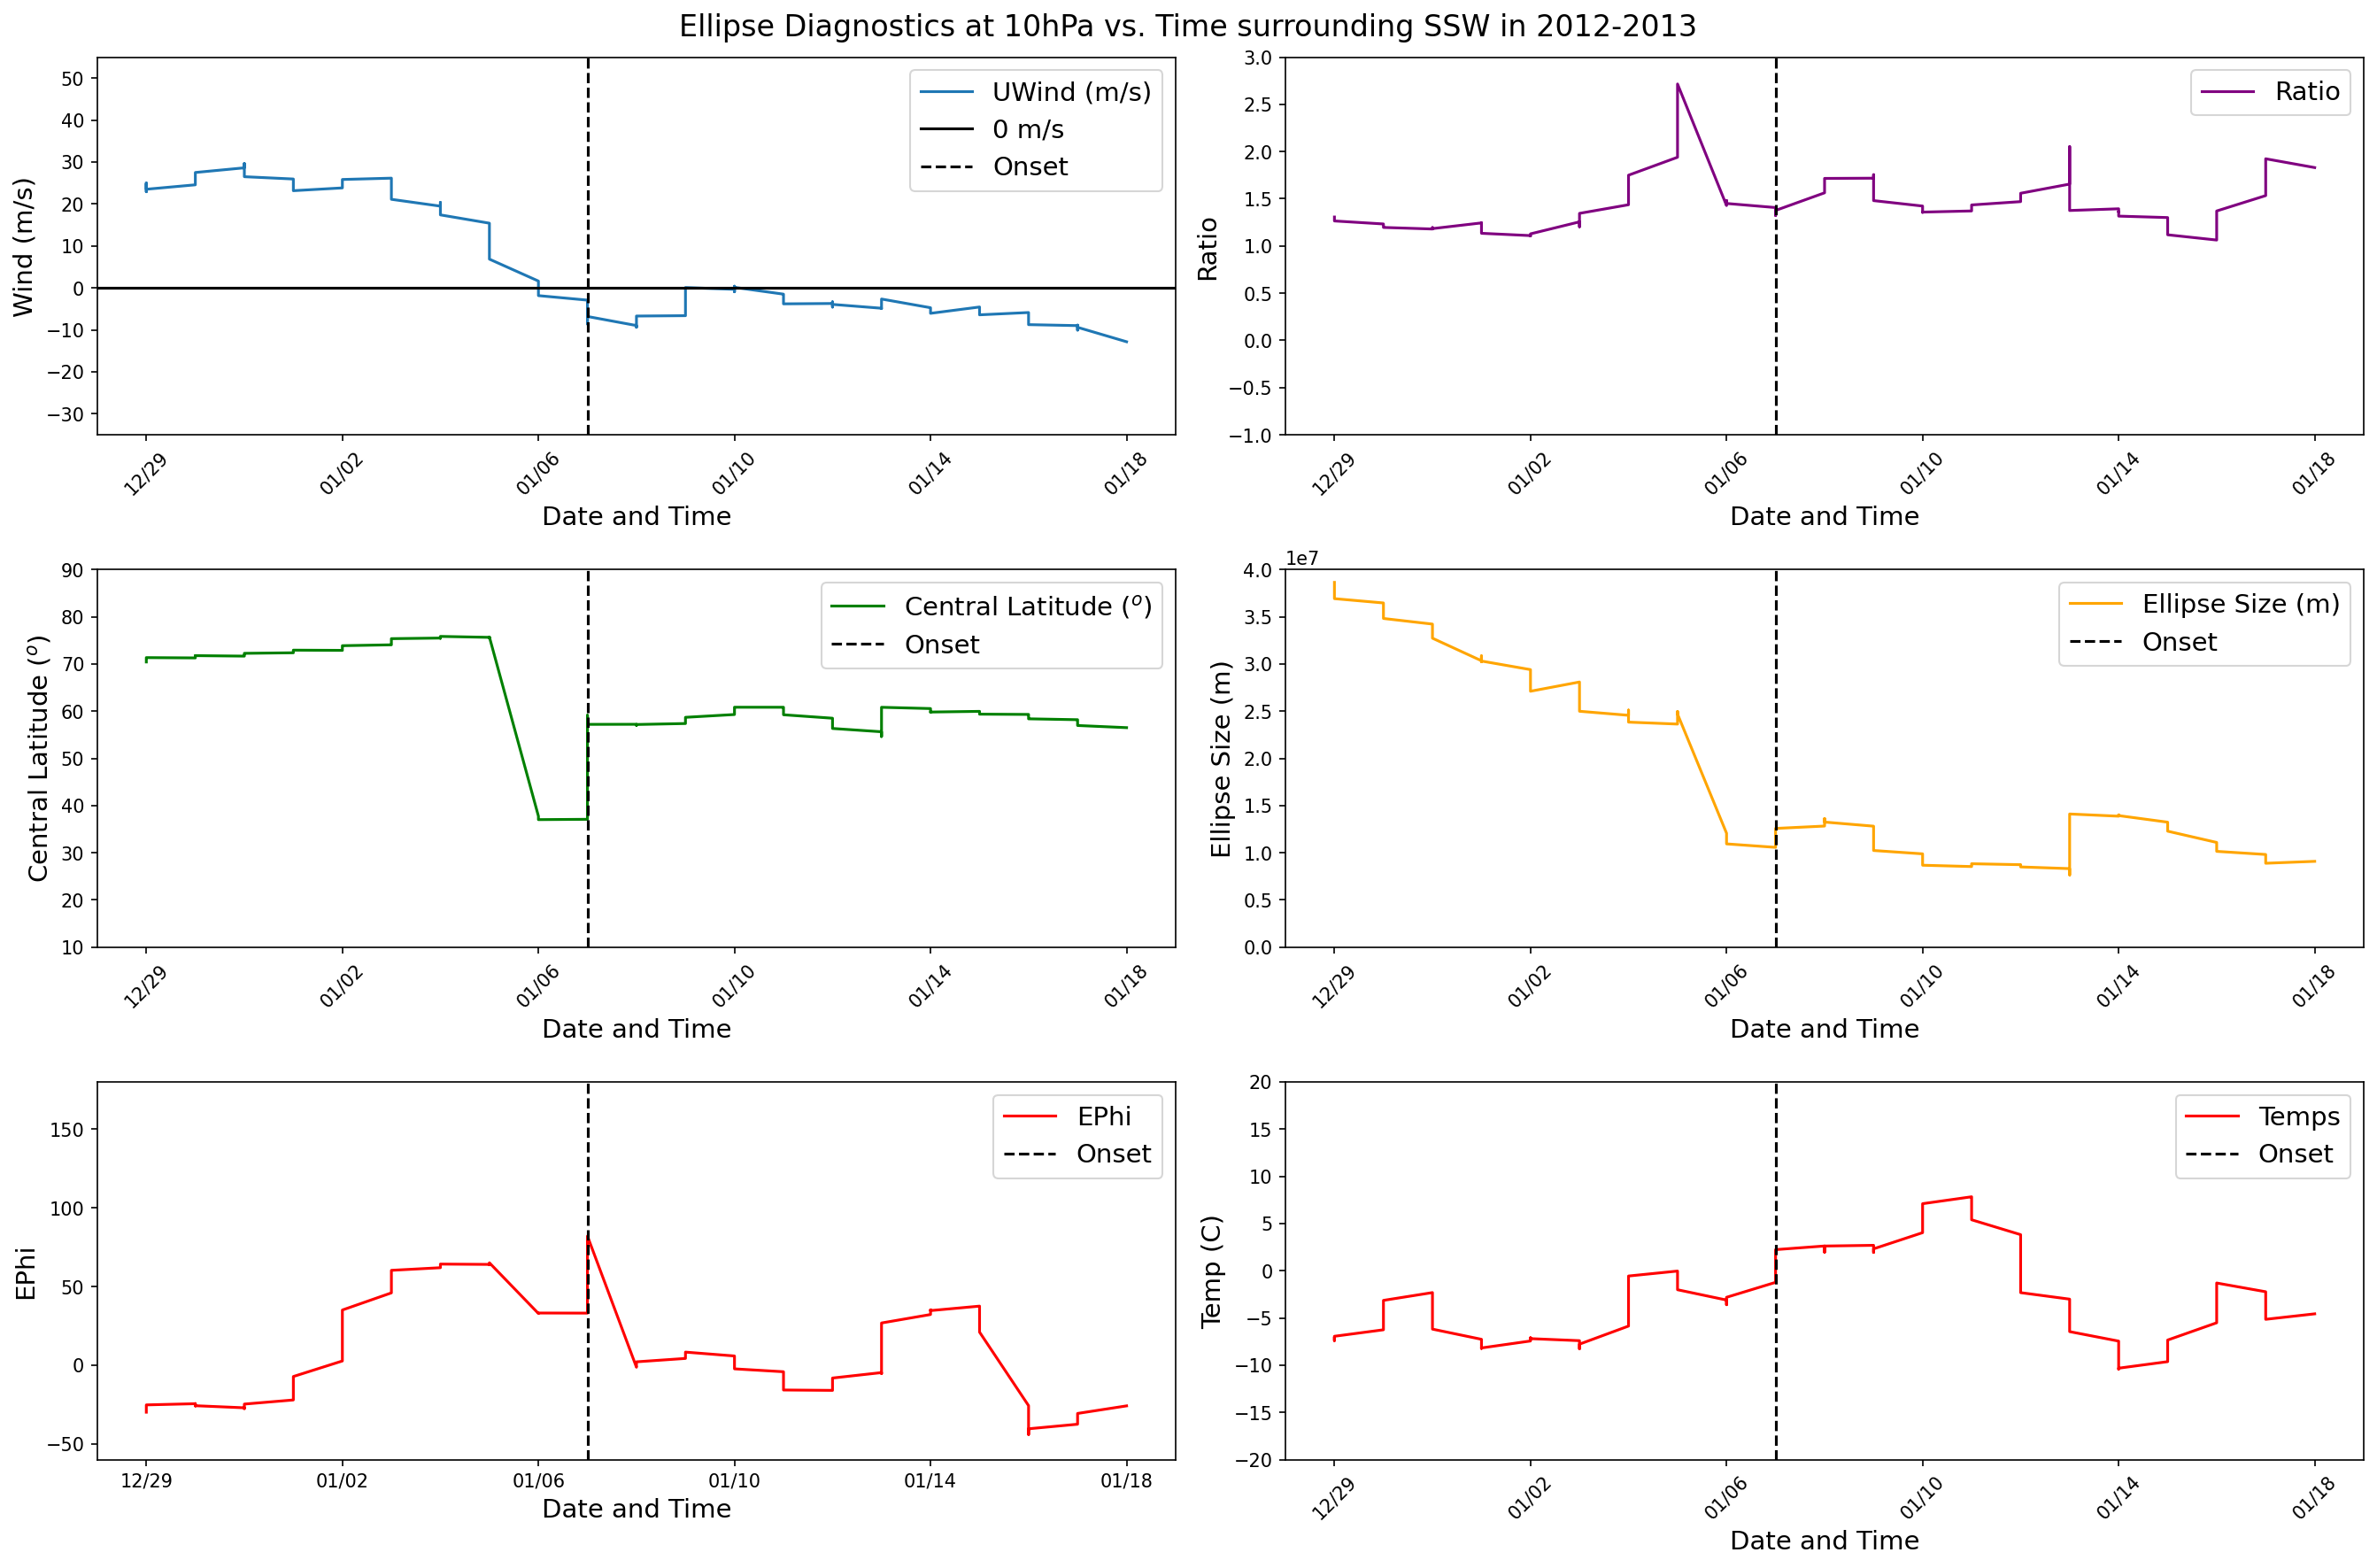

<Figure size 432x288 with 0 Axes>

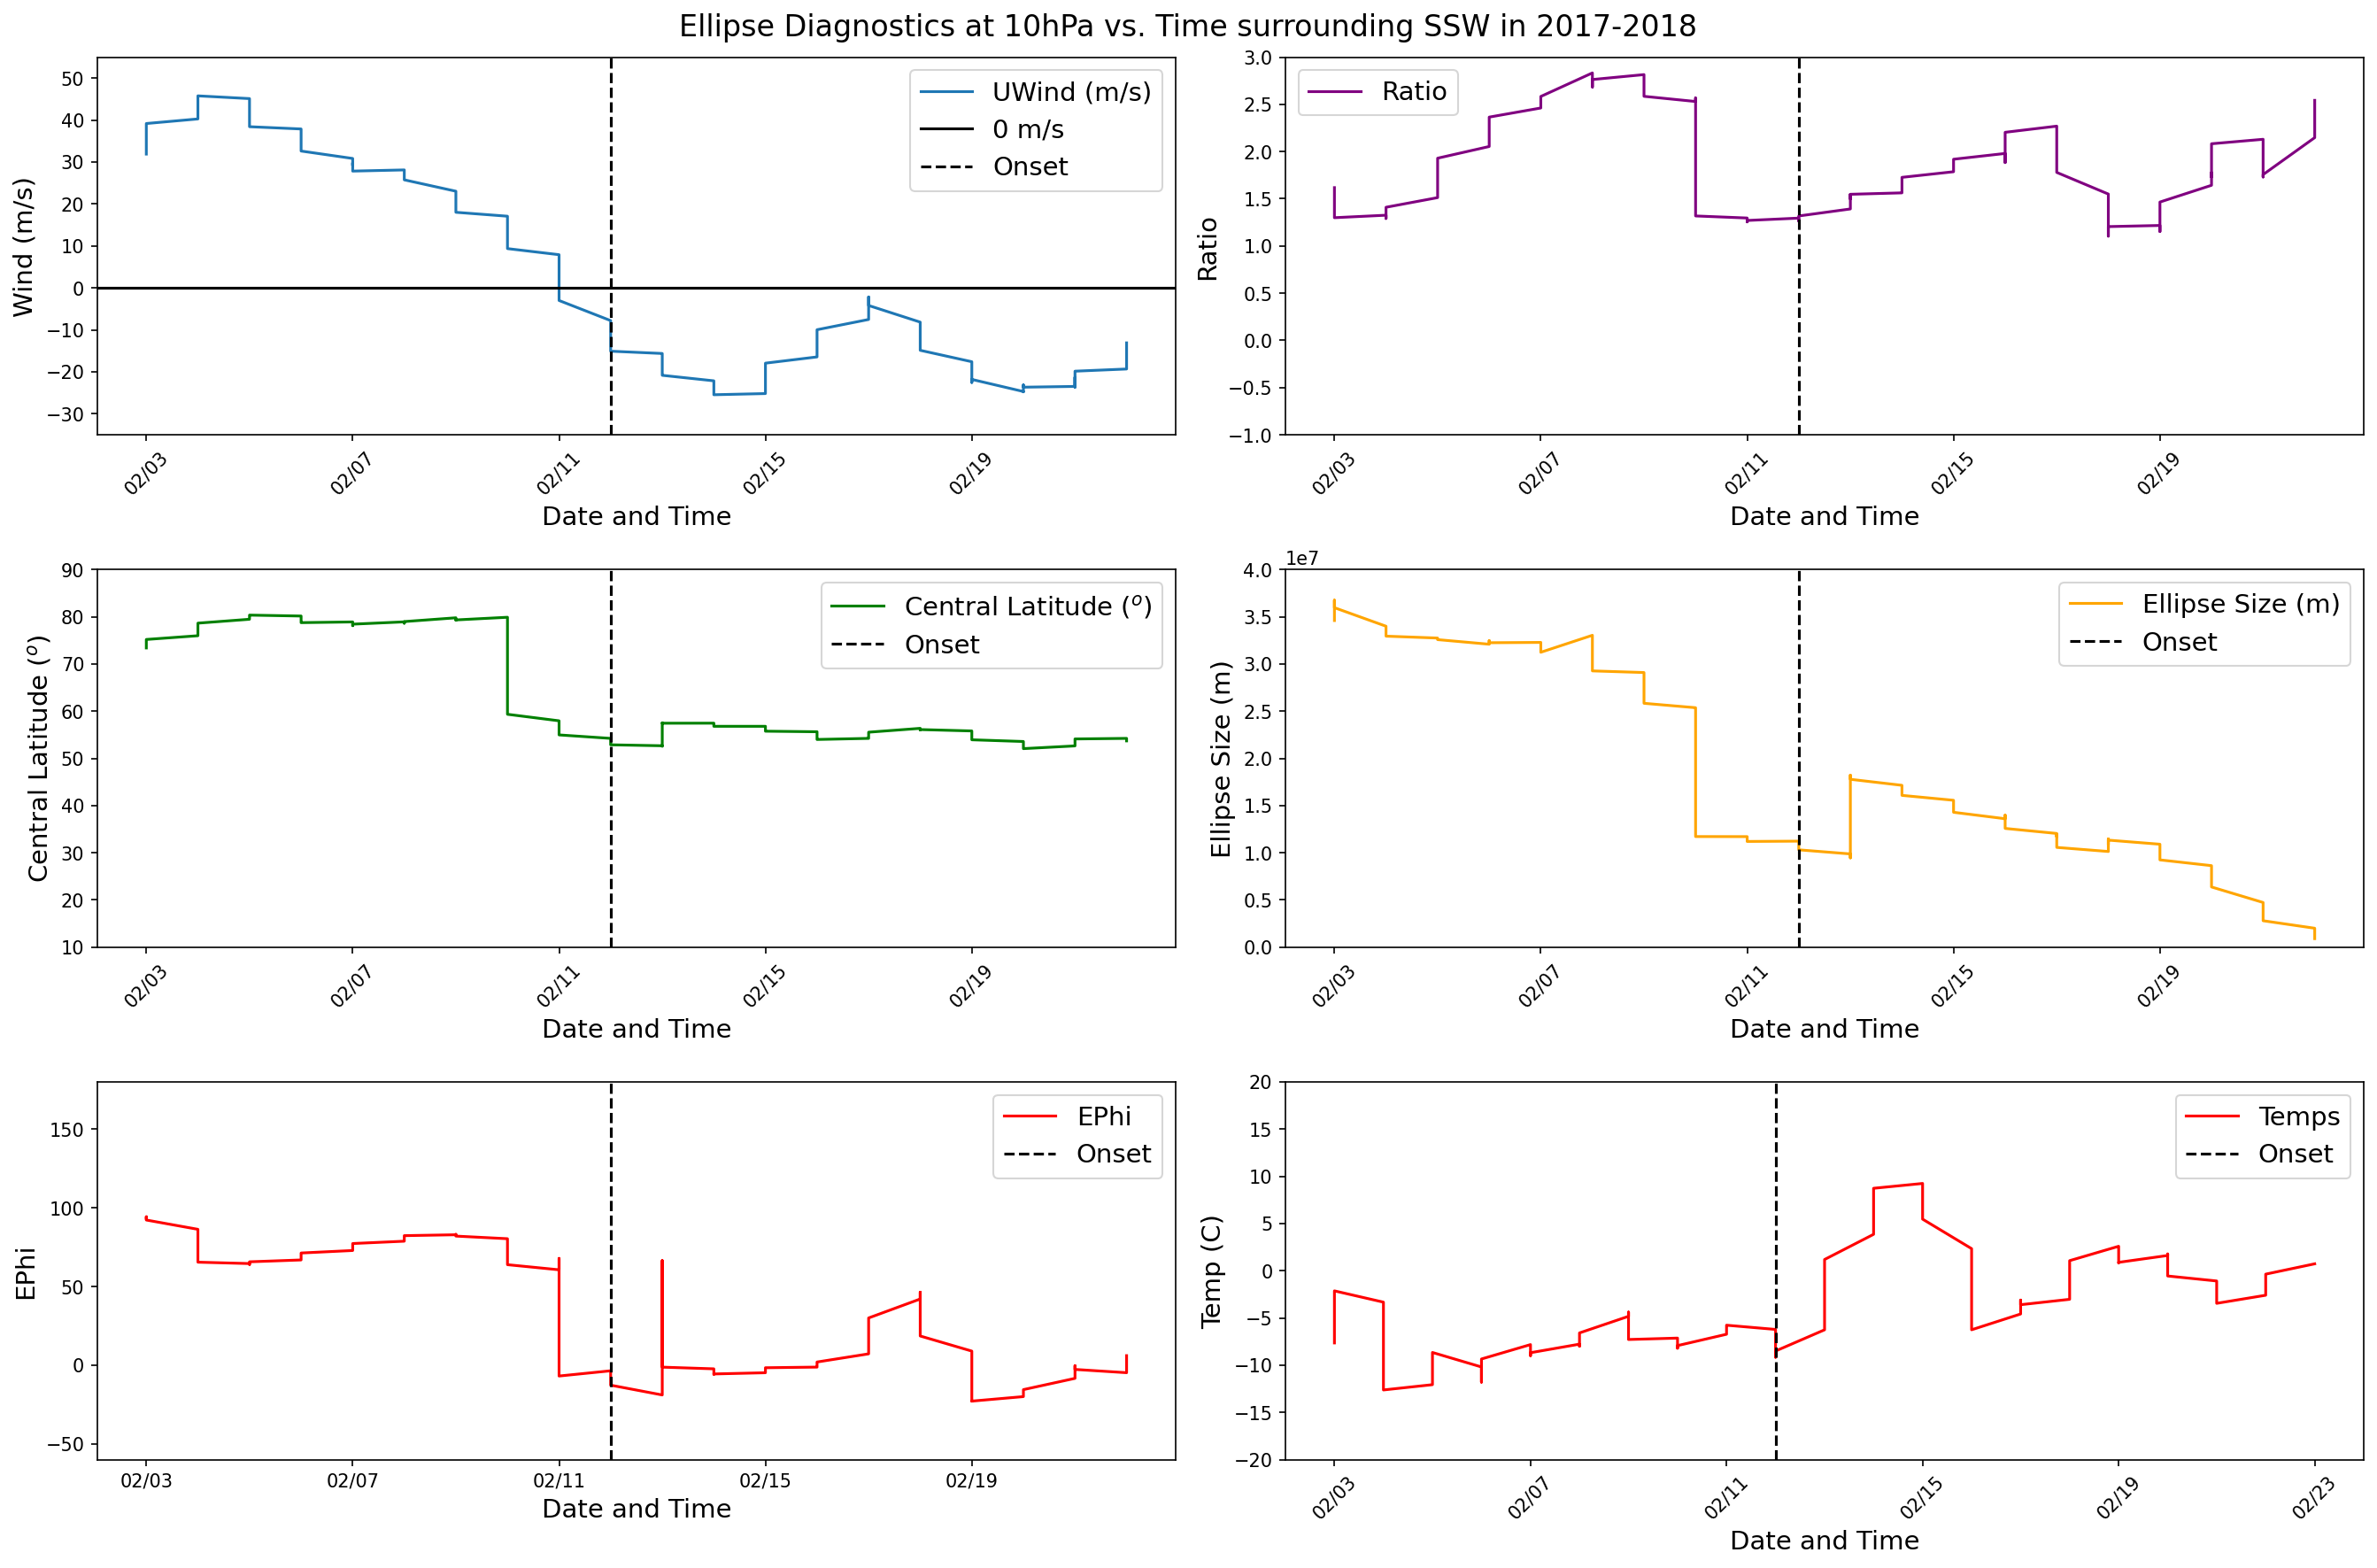

<Figure size 432x288 with 0 Axes>

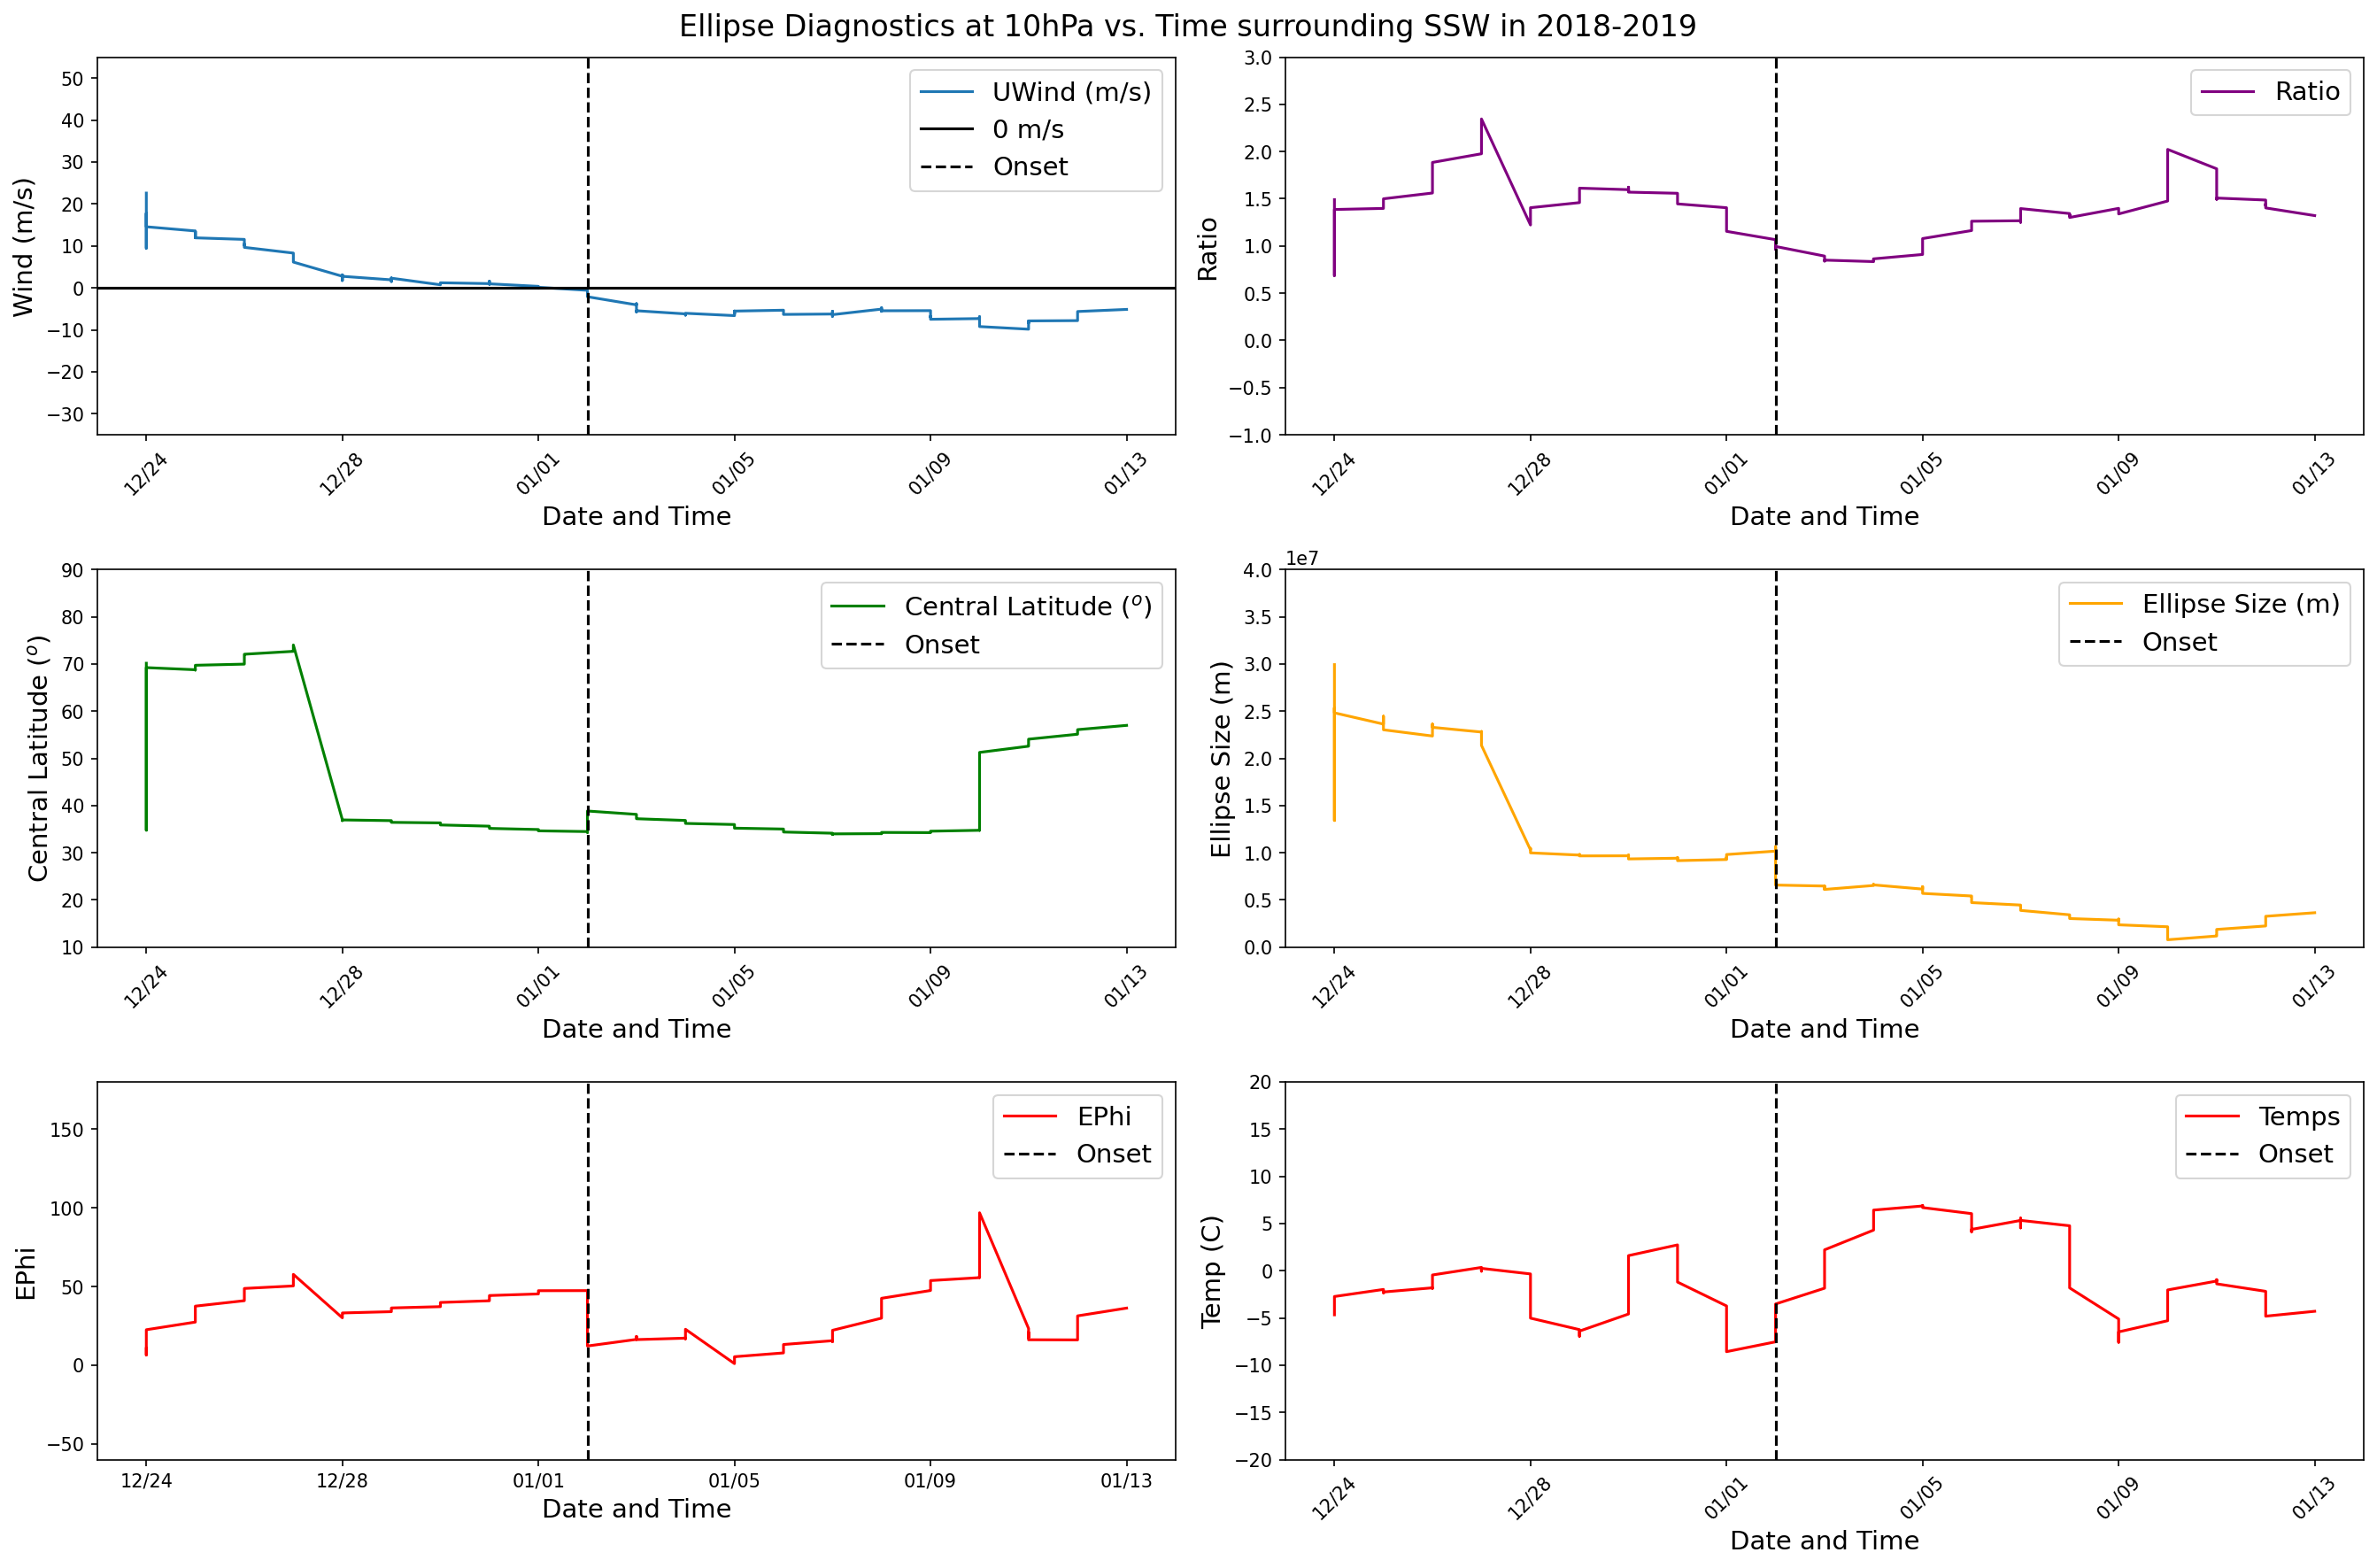

<Figure size 432x288 with 0 Axes>

In [10]:
##big plots
myLocator = mticker.MultipleLocator(4)

for i in range(len(year)):
    y = str(year[i])
    y2 = str(year[i]+1)
    d1 = int(dates[i][0])
    d2 = int(dates[i][1])
    
    ##diagnostics
    
    w = e10[sswcl[i],d1:d2] #wind
    rat = ephi_ratio10[sswcl[i],d1:d2]
    cl = ephi_cenlat10[sswcl[i],d1:d2]
    sz = ephi_size10[sswcl[i],d1:d2]
    ep = ephi10[sswcl[i],d1:d2]
    t = tem[sswcl[i],d1:d2]
    
    if y == 1999 or y == 2003 or y == 2007:
        x = leap_year[d1:d2]
    else:
        x = normal_year[d1:d2]
    
    
        
    
    fig = plt.figure(figsize=(18,12),dpi=150)

    ax1 = plt.subplot(3,2,1)
    plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time surrounding SSW in "+y+"-"+y2, fontsize = 16)
    ax1.plot(x, w, label = "UWind (m/s)")
    ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
    ax1.set_ylabel("Wind (m/s)", fontsize = 14)
    ax1.set_ylim(-35,55)
    ax1.set_xlabel("Date and Time", fontsize = 14)
    ax1.xaxis.set_major_locator(myLocator)
    plt.xticks(rotation=45,fontsize = 10)
    plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
    plt.legend(fontsize = 14)

    ax2 = plt.subplot(3,2,2)
    ax2.plot(x, rat, label = "Ratio", color = "purple")
    ax2.set_ylabel("Ratio", fontsize = 14)
    ax2.set_ylim(-1,3)
    ax2.set_xlabel("Date and Time", fontsize = 14)
    ax2.xaxis.set_major_locator(myLocator)
    plt.xticks(rotation=45,fontsize = 10)
    plt.axvline(x=x[39], color='k', linestyle='--')
    plt.legend(fontsize = 14)
    
    ax3 = plt.subplot(3,2,3)
    ax3.plot(x, cl, label = "Central Latitude ($^o$)", color = "green")
    ax3.set_ylabel("Central Latitude ($^o$)", fontsize = 14)
    ax3.set_xlabel("Date and Time", fontsize = 14)
    ax3.set_ylim(10,90)
    ax3.xaxis.set_major_locator(myLocator)
    plt.xticks(rotation=45,fontsize = 10)
    plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
    plt.legend(fontsize = 14)

    ax4 = plt.subplot(3,2,4)
    ax4.plot(x, sz, label = "Ellipse Size (m)", color = "orange")
    ax4.set_ylabel("Ellipse Size (m)", fontsize = 14)
    ax4.set_ylim(0,40000000)
    ax4.set_xlabel("Date and Time", fontsize = 14)
    ax4.xaxis.set_major_locator(myLocator)
    plt.xticks(rotation=45,fontsize = 10)
    plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
    plt.legend(fontsize = 14)

    ax5 = plt.subplot(3,2,5)
    ax5.plot(x, ep, label = "EPhi", color = "red")
    ax5.set_ylabel("EPhi", fontsize = 14)
    ax5.set_ylim(-60,180)
    ax5.set_xlabel("Date and Time", fontsize = 14)
    ax5.xaxis.set_major_locator(myLocator)
    plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
    plt.legend(fontsize = 14)
    
    ax6 = plt.subplot(3,2,6)
    ax6.plot(x, t, label = "Temps", color = "red")
    ax6.set_ylabel("Temp (C)", fontsize = 14)
    ax6.set_ylim(-20,20)
    ax6.set_xlabel("Date and Time", fontsize = 14)
    ax6.xaxis.set_major_locator(myLocator)
    plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
    plt.legend(fontsize = 14)
    
    plt.xticks(rotation=45,fontsize = 10)
    plt.tight_layout()
    plt.show()
    
    plt.savefig("SSWTimelines_"+y+".png")


In [11]:
##Climo time
rat10 = np.nanmean(ephi_ratio10,axis=0)
wind10 = np.nanmean(e10,axis=0)
cenl10 = np.nanmean(ephi_cenlat10,axis=0)
size10 = np.nanmean(ephi_size10,axis=0)
ep10 = np.nanmean(ephi10,axis=0)
tem10 = np.nanmean(tem,axis=0)

l = leap_year[0:-1]

In [12]:
rat10_sd = np.nanstd(ephi_ratio10,axis=0)
wind10_sd = np.nanstd(e10,axis=0)
cenl10_sd = np.nanstd(ephi_cenlat10,axis=0)
size10_sd = np.nanstd(ephi_size10,axis=0)
ep10_sd = np.nanstd(ephi10,axis=0)
tem10_sd = np.nanstd(tem,axis=0)

In [13]:
pos_rat = rat10 + rat10_sd
pos_wind = wind10 + wind10_sd
pos_cenl = cenl10 + cenl10_sd
pos_size = size10 + size10_sd
pos_ep = ep10 + ep10_sd
pos_t = tem10 + tem10_sd

In [14]:
neg_rat = rat10 - rat10_sd
neg_wind = wind10 - wind10_sd
neg_cenl = cenl10 - cenl10_sd
neg_size = size10 - size10_sd
neg_ep = ep10 - ep10_sd
neg_t = tem10 - tem10_sd

In [15]:
myLocator = mticker.MultipleLocator(10)

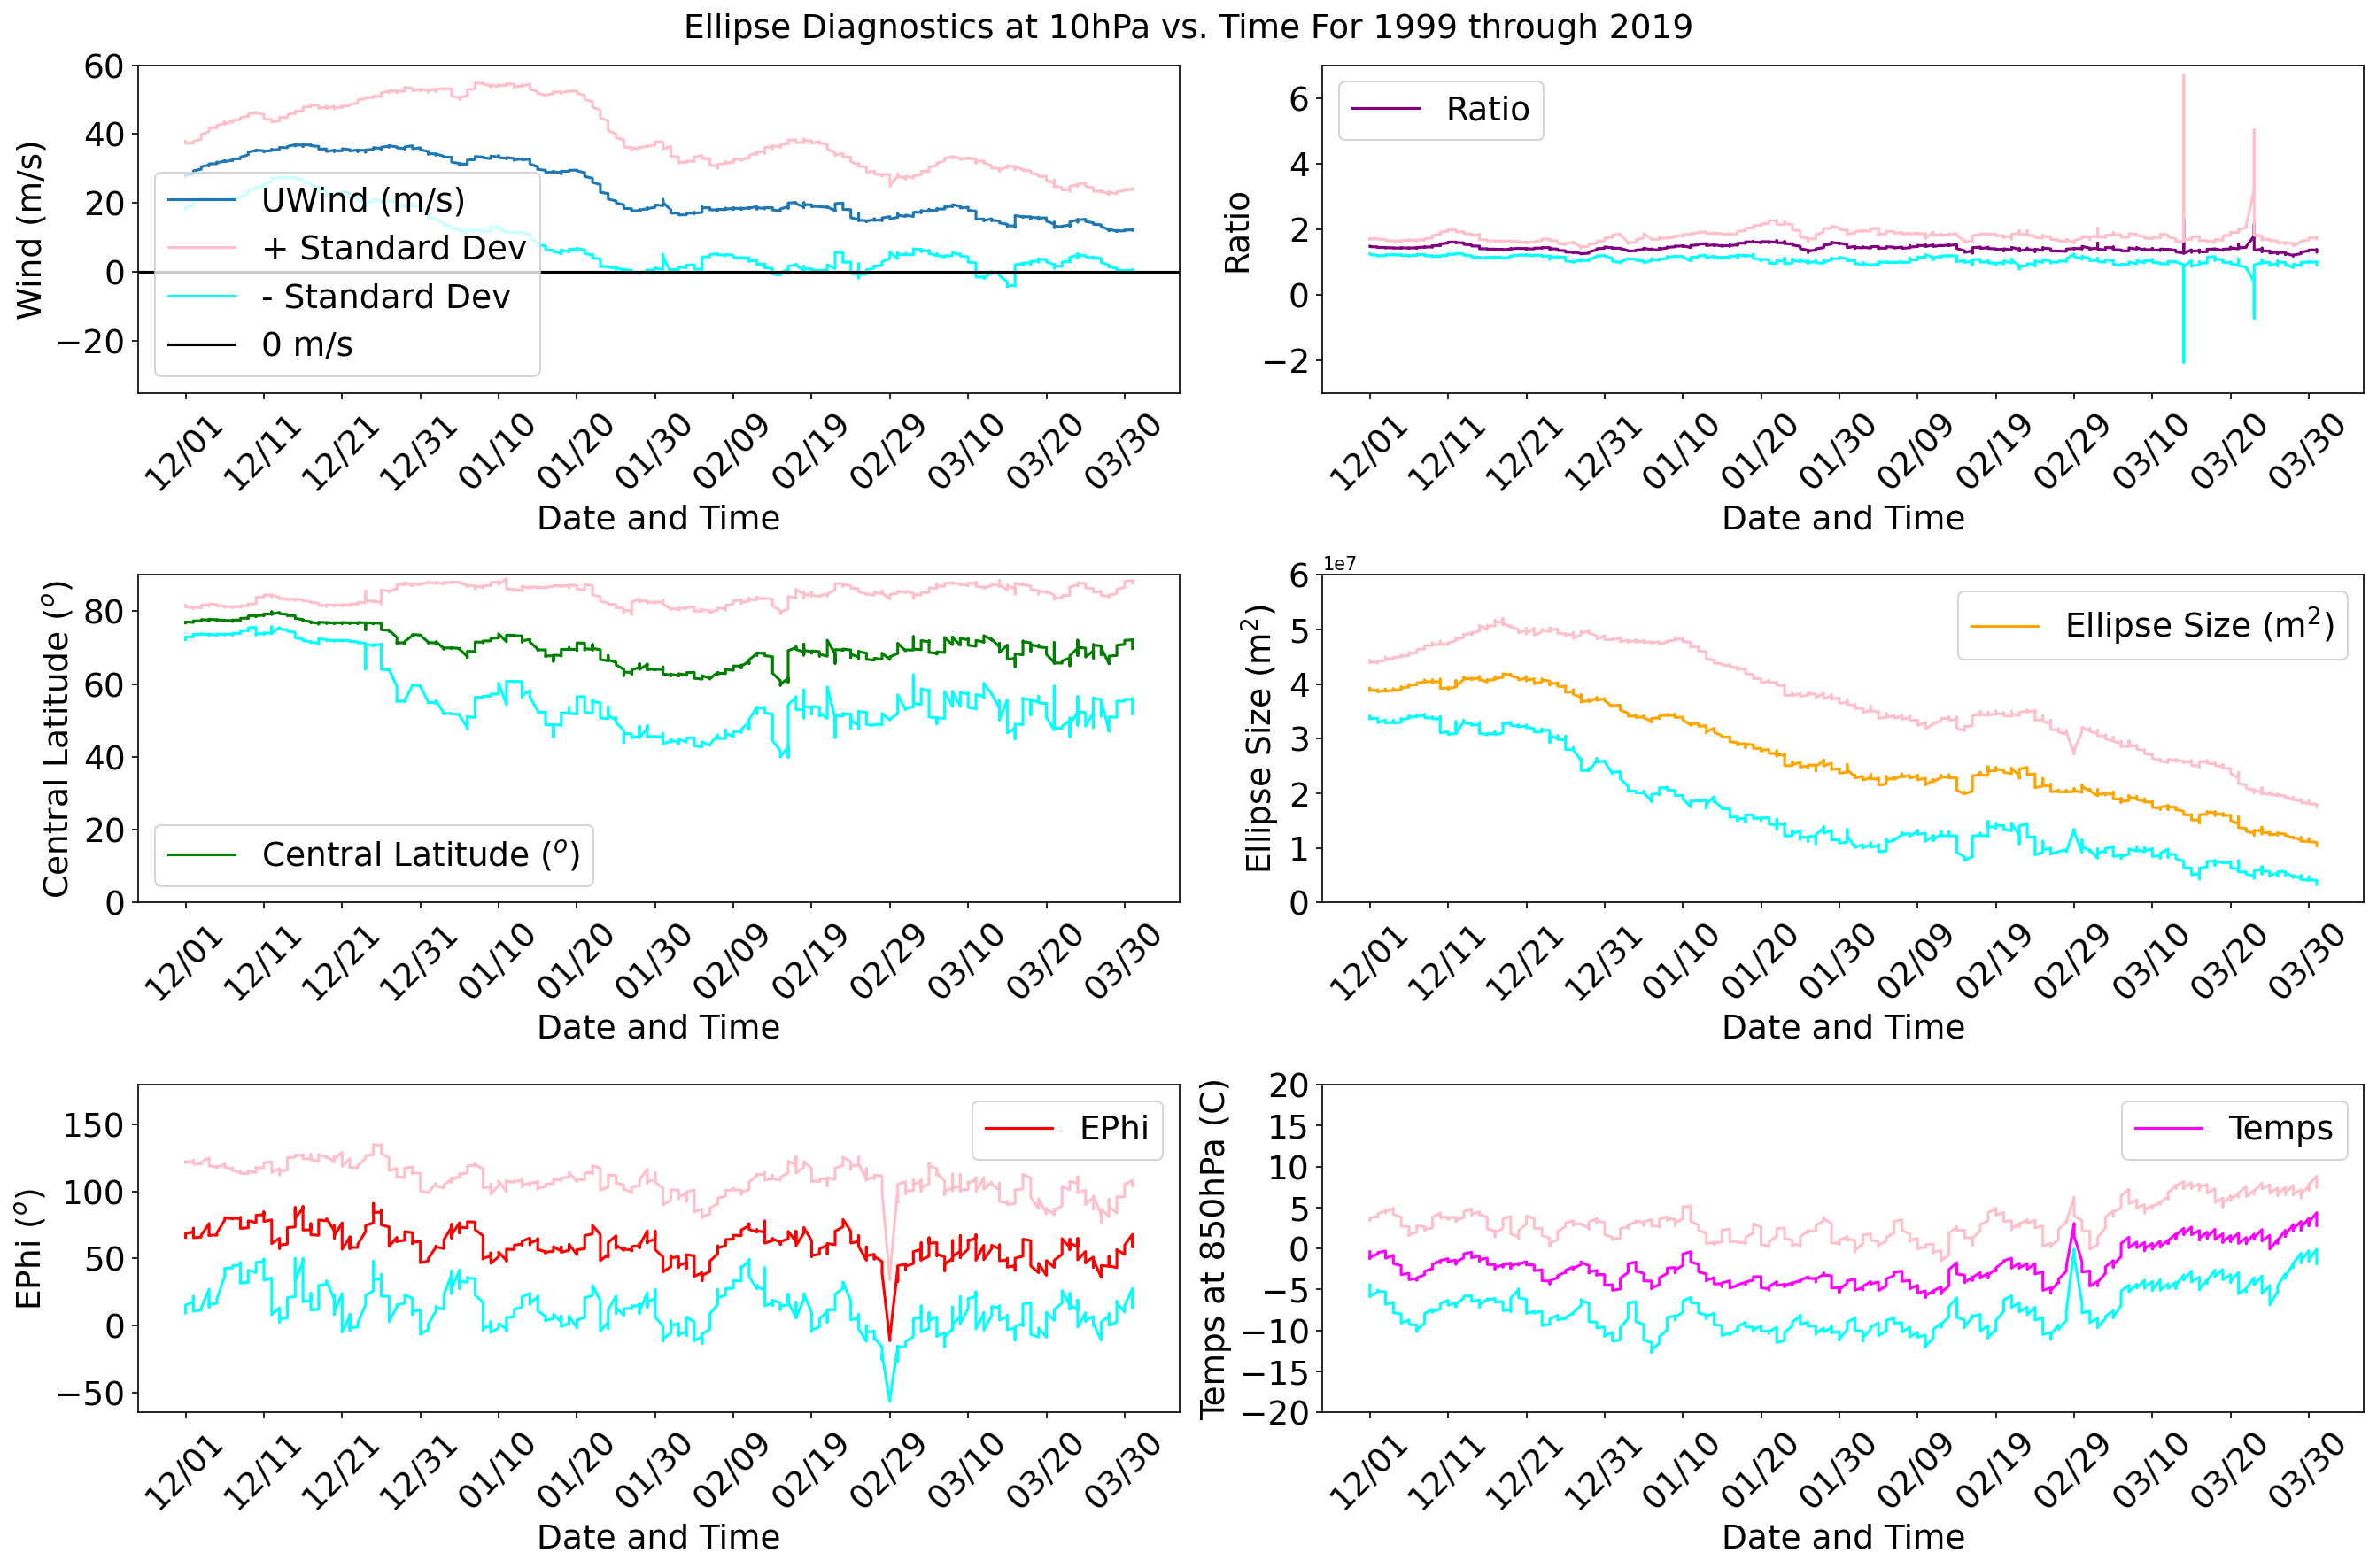

In [16]:
fig = plt.figure(figsize=(18,12),dpi=150)
ax1 = plt.subplot(3,2,1)

plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time For 1999 through 2019", fontsize = 18)
ax1.plot(l, wind10, label = "UWind (m/s)")
ax1.plot(l, pos_wind, label = "+ Standard Dev", color = 'pink')
ax1.plot(l, neg_wind, label = "- Standard Dev", color = 'cyan')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = 18)
ax1.set_ylim(-35,60)
ax1.set_xlabel("Date and Time", fontsize = 18)
ax1.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax2 = plt.subplot(3,2,2)
ax2.plot(l, rat10, label = "Ratio", color = "purple")
ax2.plot(l, pos_rat, color = 'pink')
ax2.plot(l, neg_rat, color = 'cyan')
ax2.set_ylabel("Ratio", fontsize = 18)
ax2.set_ylim(-3.0,7.0)
ax2.set_xlabel("Date and Time", fontsize = 18)
ax2.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
    
ax3 = plt.subplot(3,2,3)
ax3.plot(l, cenl10, label = "Central Latitude ($^o$)", color = "green")
ax3.plot(l, pos_cenl, color = 'pink')
ax3.plot(l, neg_cenl, color = 'cyan')
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = 18)
ax3.set_xlabel("Date and Time", fontsize = 18)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax4 = plt.subplot(3,2,4)
ax4.plot(l, size10, label = "Ellipse Size (m$^2$)", color = "orange")
ax4.plot(l, pos_size, color = 'pink')
ax4.plot(l, neg_size, color = 'cyan')
ax4.set_ylabel("Ellipse Size (m$^2$)", fontsize = 18)
ax4.set_ylim(0,60000000)
ax4.set_xlabel("Date and Time", fontsize = 18)
ax4.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax5 = plt.subplot(3,2,5)
ax5.plot(l, ep10, label = "EPhi", color = "red")
ax5.plot(l, pos_ep, color = 'pink')
ax5.plot(l, neg_ep, color = 'cyan')
ax5.set_ylabel("EPhi ($^o$)", fontsize = 18)
ax5.set_ylim(-65,180)
ax5.set_xlabel("Date and Time", fontsize = 18)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax6 = plt.subplot(3,2,6)
ax6.plot(l, tem10, label = "Temps", color = "magenta")
ax6.plot(l, pos_t, color = 'pink')
ax6.plot(l, neg_t, color = 'cyan')
ax6.set_ylabel("Temps at 850hPa (C)", fontsize = 18)
ax6.set_ylim(-20,20)
ax6.set_xlabel("Date and Time", fontsize = 18)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
    
plt.xticks(rotation=45,fontsize = 18)
#plt.suplegend(fontsize = 16)
plt.tight_layout()
plt.savefig("ClimoTimeline.png")


In [17]:
len(tem10[56:])

432

In [18]:
##correlations
from scipy.stats.stats import pearsonr 
from scipy.stats import spearmanr
from scipy.stats import kendalltau

rat2 = rat10[0:432]
wind2 = wind10[0:432]
cenl2 = cenl10[0:432]
size2 = size10[0:432]
ep2 = ep10[0:432]
tem2 = tem10[56:]

wcorr = pearsonr(tem2,wind2)
print("Pearsons Correlation with Wind:",wcorr)

szcorr = pearsonr(tem2,size2)
print("Pearsons Correlation with Size:",szcorr)

epcorr = pearsonr(tem2,ep2)
print("Pearsons Correlation with EPhi:",epcorr)

ratcorr = pearsonr(tem2,rat2)
print("Pearsons Correlation with Ratio:",ratcorr)

ccorr = pearsonr(tem2,cenl2)
print("Pearsons Correlation with Center Latitude:",ccorr)

print('###################################')

wcorr = spearmanr(tem2,wind2, nan_policy='omit')
print("Spearman Correlation with Wind:",wcorr)

szcorr = spearmanr(tem2,size2, nan_policy='omit')
print("Spearman Correlation with Size:",szcorr)

epcorr = spearmanr(tem2,ep2, nan_policy='omit')
print("Spearman Correlation with EPhi:",epcorr)

ratcorr = spearmanr(tem2,rat2, nan_policy='omit')
print("Spearman Correlation with Ratio:",ratcorr)

ccorr = spearmanr(tem2,cenl2, nan_policy='omit')
print("Spearman Correlation with Center Latitude:",ccorr)

print('###################################')

wcorr = kendalltau(tem2,wind2)
print("KT with Wind:",wcorr)

szcorr = kendalltau(tem2,size2)
print("KT with Size:",szcorr)

epcorr = kendalltau(tem2,ep2)
print("KT with EPhi:",epcorr)

ratcorr = kendalltau(tem2,rat2)
print("KT with Ratio:",ratcorr)

ccorr = kendalltau(tem2,cenl2)
print("KT with Center Latitude:",ccorr)

Pearsons Correlation with Wind: (-0.5392518810227384, 5.847834427637607e-34)
Pearsons Correlation with Size: (-0.5380097239757345, 8.790048050399589e-34)
Pearsons Correlation with EPhi: (-0.3360610378097579, 7.263993305256061e-13)
Pearsons Correlation with Ratio: (-0.3684946392428886, 2.43037639947305e-15)
Pearsons Correlation with Center Latitude: (-0.06839816155507641, 0.15584872606973604)
###################################
Spearman Correlation with Wind: SpearmanrResult(correlation=-0.46900257024411074, pvalue=5.188031465961529e-25)
Spearman Correlation with Size: SpearmanrResult(correlation=-0.499111845806787, pvalue=1.356305053642357e-28)
Spearman Correlation with EPhi: SpearmanrResult(correlation=-0.22252080397378673, pvalue=3.007751295746541e-06)
Spearman Correlation with Ratio: SpearmanrResult(correlation=-0.42359001242552574, pvalue=3.080049217413334e-20)
Spearman Correlation with Center Latitude: SpearmanrResult(correlation=-0.0007814327994584447, pvalue=0.9870790480388673)


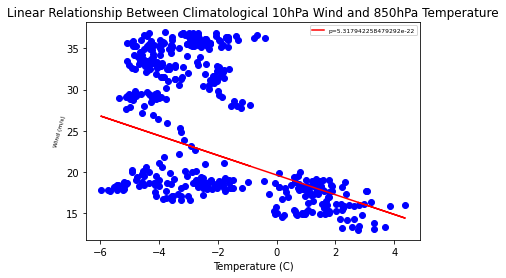

In [19]:
slope = scipy.stats.mstats.theilslopes(wind2, x= tem2,  alpha=0.95)
kt = scipy.stats.kendalltau(tem2,wind2)
kt = kt[1]
line = slope[0]*np.array(tem2)+slope[1]

plt.figure()
plt.title("Linear Relationship Between Climatological 10hPa Wind and 850hPa Temperature")
plt.scatter(tem2,wind2,color = "blue")
plt.plot(tem2, line, 'r', label='p='+str(kt))
plt.legend(fontsize=6)
plt.xlabel("Temperature (C)")
plt.ylabel('Wind (m/s)',fontsize = 6, rotation = 75)
plt.show()

In [20]:
##SSW Averaging Timelines
ssw_wind = np.empty((12,81))
ssw_wind[:] = np.nan

ssw_rat = np.empty((12,81))
ssw_rat[:] = np.nan

ssw_size = np.empty((12,81))
ssw_size[:] = np.nan

ssw_cenl = np.empty((12,81))
ssw_cenl[:] = np.nan

ssw_ep= np.empty((12,81))
ssw_ep[:] = np.nan

ssw_t= np.empty((12,81))
ssw_t[:] = np.nan


year2 = [1999,2001,2002,2003,2005,2006,2007,2008,2009,2012,2017,2018]
sswcl2 = [0,2,3,4,6,7,8,9,10,13,18,19]
dates2 = [(404,485),(76,157),(156,237),(108,189),(168,249),(304,385),(296,377),(180,261),(244,325),(112,193),(256,337),(92,173)]

for i in range(len(year2)):
    d1 = int(dates2[i][0])
    d2 = int(dates2[i][1])
    
    ##diagnostics
    
    w = e10[sswcl2[i],d1:d2] #wind
    ssw_wind[i] = w[:]
    
    rat = ephi_ratio10[sswcl2[i],d1:d2]
    ssw_rat[i] = rat[:]
    
    cl = ephi_cenlat10[sswcl2[i],d1:d2]
    ssw_cenl[i] = cl[:]
    
    sz = ephi_size10[sswcl2[i],d1:d2]
    ssw_size[i] = sz[:]
    
    ep = ephi10[sswcl2[i],d1:d2]
    ssw_ep[i] = ep[:]
    
    tm = tem[sswcl2[i],d1:d2]
    ssw_t[i] = tm[:]

In [21]:
sswrat10 = np.nanmean(ssw_rat,axis=0)
sswwind10 = np.nanmean(ssw_wind,axis=0)
sswcenl10 = np.nanmean(ssw_cenl,axis=0)
sswsize10 = np.nanmean(ssw_size,axis=0)
sswep10 = np.nanmean(ssw_ep,axis=0)
sswt10 = np.nanmean(ssw_t,axis=0)

In [22]:
sswrat10_sd = np.nanstd(ssw_rat,axis=0)
sswwind10_sd = np.nanstd(ssw_wind,axis=0)
sswcenl10_sd = np.nanstd(ssw_cenl,axis=0)
sswsize10_sd = np.nanstd(ssw_size,axis=0)
sswep10_sd = np.nanstd(ssw_ep,axis=0)
sswt10_sd = np.nanstd(ssw_t,axis=0)

In [23]:
pos_sswrat = sswrat10 + sswrat10_sd
pos_sswwind = sswwind10 + sswwind10_sd
pos_sswcenl = sswcenl10 + sswcenl10_sd
pos_sswsize = sswsize10 + sswsize10_sd
pos_sswep = sswep10 + sswep10_sd
pos_sswt= sswt10 + sswt10_sd

In [24]:
neg_sswrat = sswrat10 - sswrat10_sd
neg_sswwind = sswwind10 - sswwind10_sd
neg_sswcenl = sswcenl10 - sswcenl10_sd
neg_sswsize = sswsize10 - sswsize10_sd
neg_sswep = sswep10 - sswep10_sd
neg_sswt = sswt10 - sswt10_sd

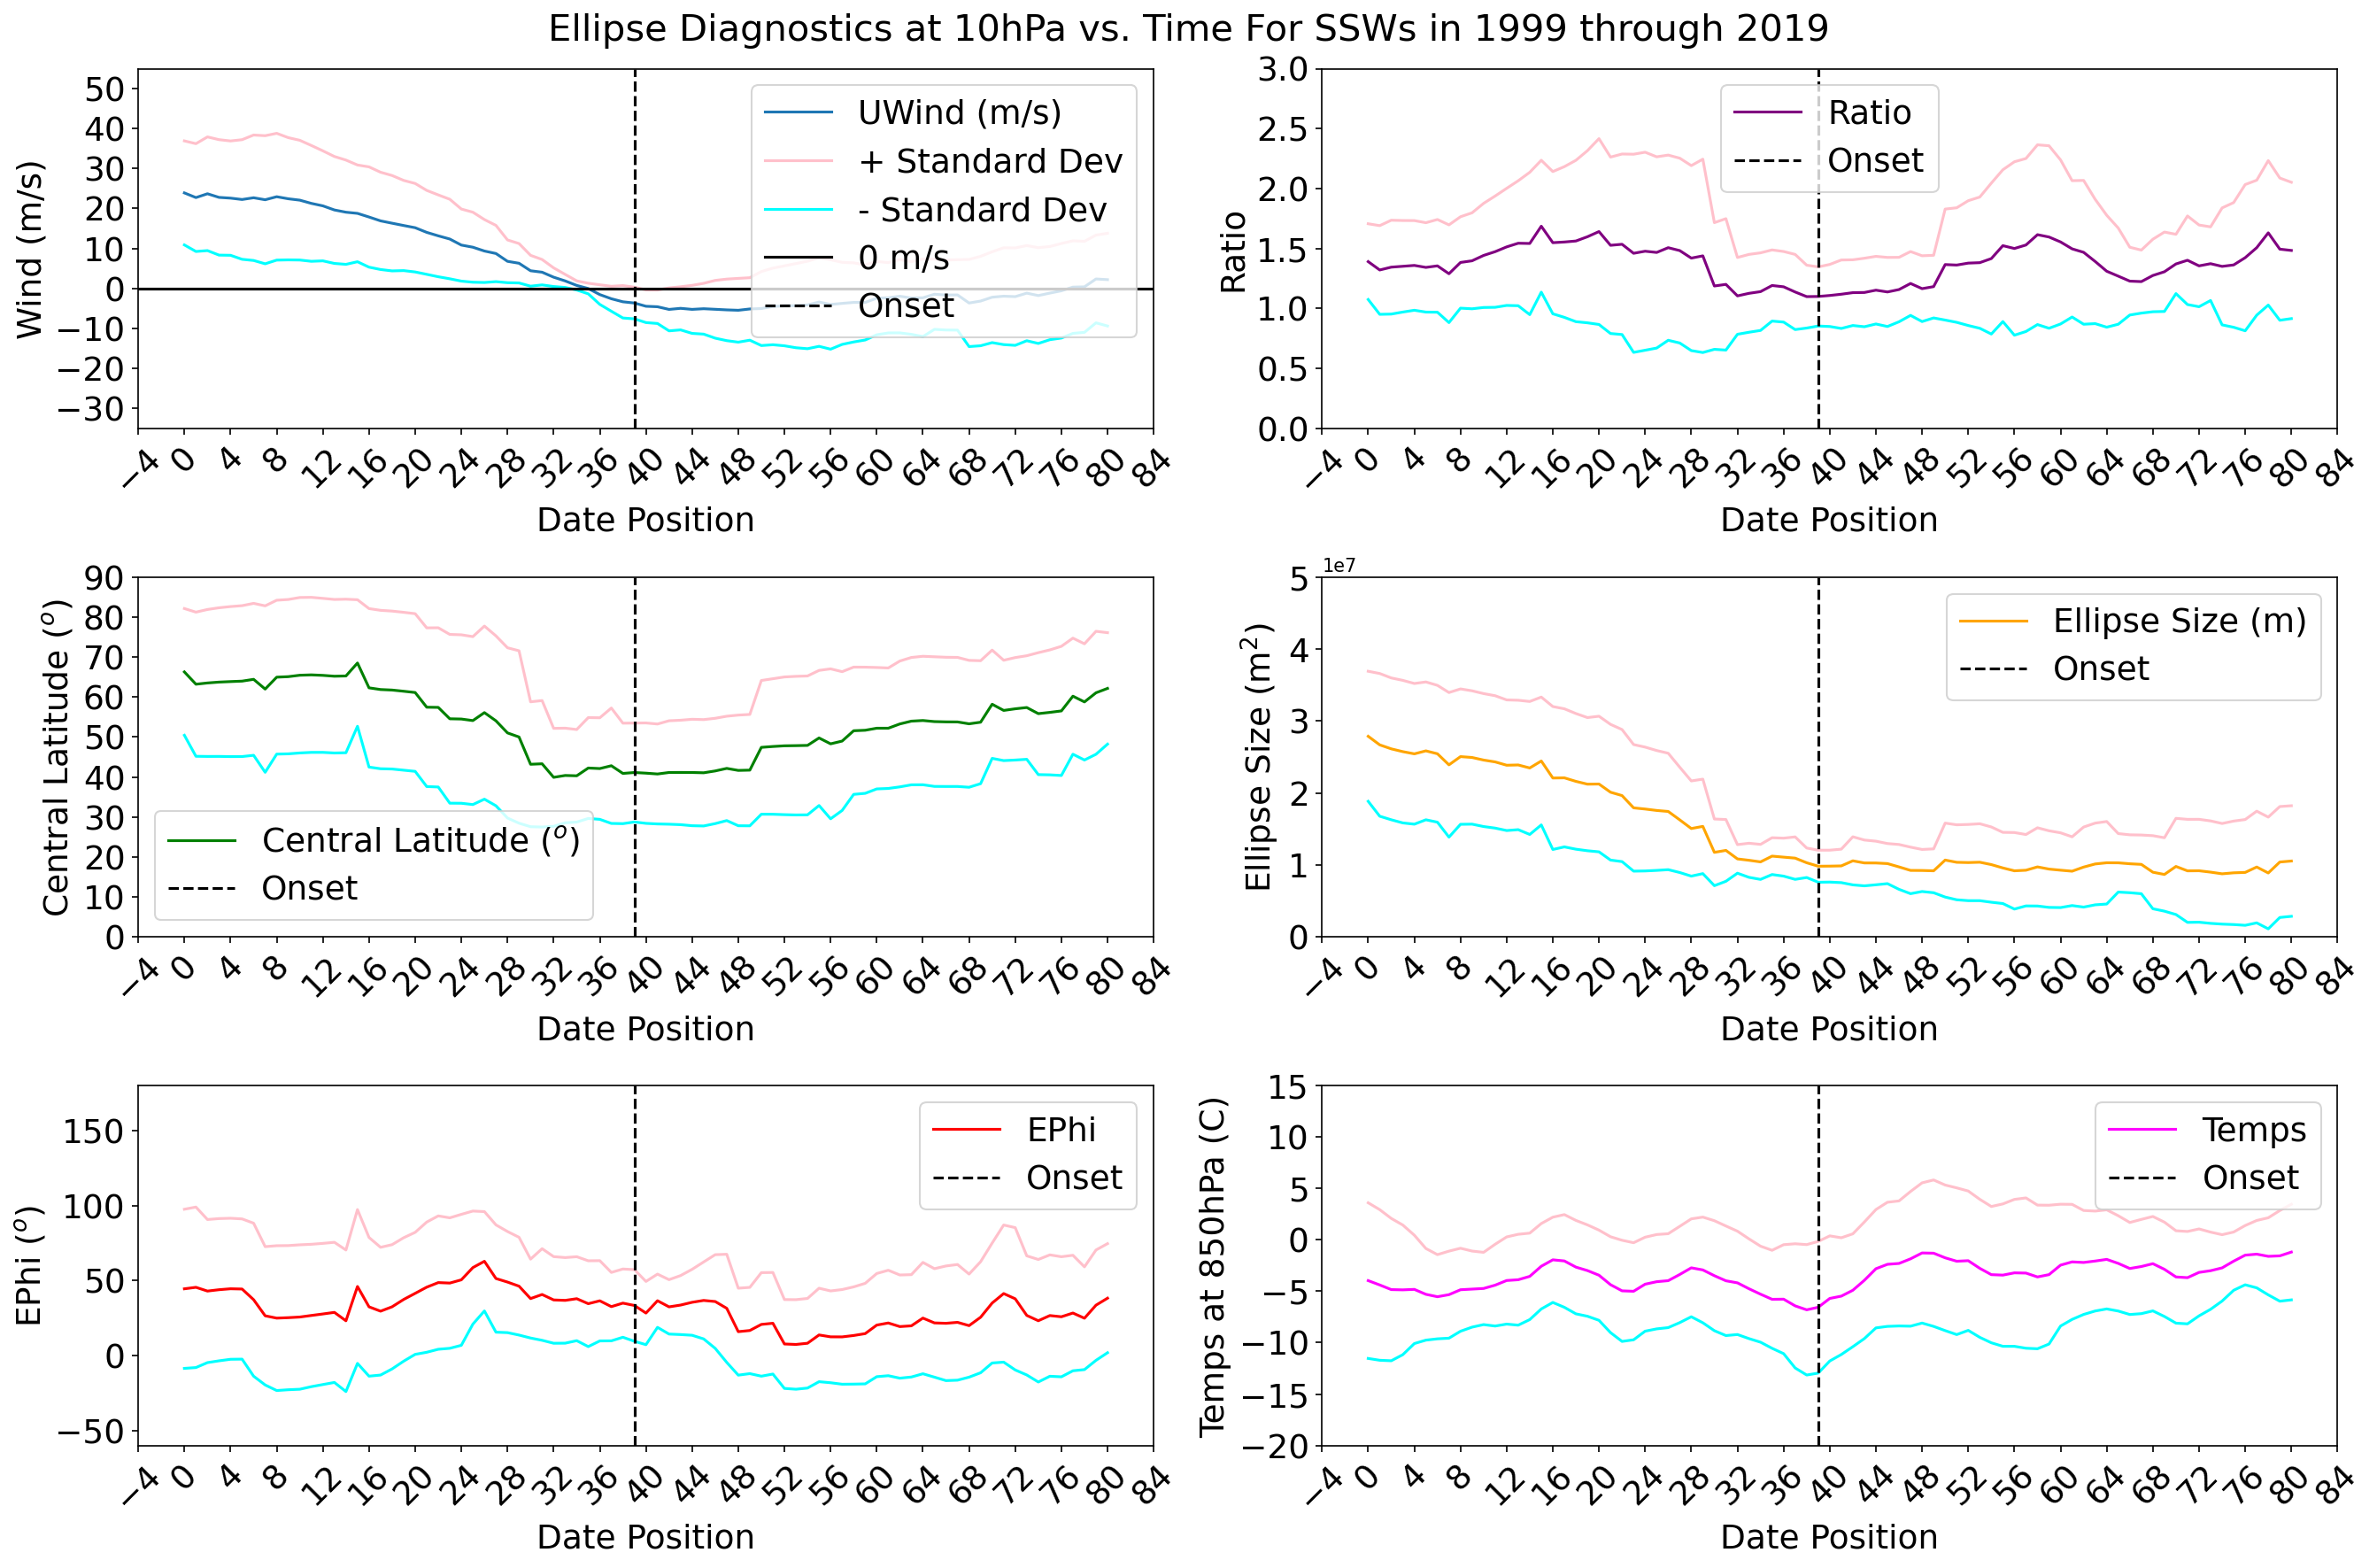

In [25]:
myLocator = mticker.MultipleLocator(4)
l2 = [x for x in range(len(sswwind10))]

fig = plt.figure(figsize=(18,12),dpi=150)
ax1 = plt.subplot(3,2,1)

plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time For SSWs in 1999 through 2019", fontsize = 20)
ax1.plot(l2, sswwind10, label = "UWind (m/s)")
ax1.plot(l2, pos_sswwind, label = "+ Standard Dev", color = 'pink')
ax1.plot(l2, neg_sswwind, label = "- Standard Dev", color = 'cyan')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = 18)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date Position", fontsize = 18)
ax1.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[39], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax2 = plt.subplot(3,2,2)
ax2.plot(l2, sswrat10, label = "Ratio", color = "purple")
ax2.plot(l2, pos_sswrat, color = 'pink')
ax2.plot(l2, neg_sswrat, color = 'cyan')
ax2.set_ylabel("Ratio", fontsize = 18)
ax2.set_ylim(0,3)
ax2.set_xlabel("Date Position", fontsize = 18)
ax2.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[39], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
    
ax3 = plt.subplot(3,2,3)
ax3.plot(l2, sswcenl10, label = "Central Latitude ($^o$)", color = "green")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = 18)
ax3.plot(l2, pos_sswcenl, color = 'pink')
ax3.plot(l2, neg_sswcenl, color = 'cyan')
ax3.set_xlabel("Date Position", fontsize = 18)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[39], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax4 = plt.subplot(3,2,4)
ax4.plot(l2, sswsize10, label = "Ellipse Size (m)", color = "orange")
ax4.plot(l2, pos_sswsize, color = 'pink')
ax4.plot(l2, neg_sswsize, color = 'cyan')
ax4.set_ylabel("Ellipse Size (m$^2$)", fontsize = 18)
ax4.set_ylim(0,50000000)
ax4.set_xlabel("Date Position", fontsize = 18)
ax4.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[39], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)

ax5 = plt.subplot(3,2,5)
ax5.plot(l2, sswep10, label = "EPhi", color = "red")
ax5.plot(l2, pos_sswep, color = 'pink')
ax5.plot(l2, neg_sswep, color = 'cyan')
ax5.set_ylabel("EPhi ($^o$)", fontsize = 18)
ax5.set_ylim(-60,180)
ax5.set_xlabel("Date Position", fontsize = 18)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.axvline(x=l2[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 18)

ax6 = plt.subplot(3,2,6)
ax6.plot(l2, sswt10, label = "Temps", color = "magenta")
ax6.plot(l2, pos_sswt, color = 'pink')
ax6.plot(l2, neg_sswt, color = 'cyan')
ax6.set_ylabel("Temps at 850hPa (C)", fontsize = 18)
ax6.set_ylim(-20,15)
ax6.set_xlabel("Date Position", fontsize = 18)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.axvline(x=l2[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 18)
    
plt.xticks(rotation=45,fontsize = 18)
plt.tight_layout()    
plt.savefig("SSWClimoTimeline.png")


In [26]:
##correlations
from scipy.stats.stats import pearsonr 

wcorr = pearsonr(sswt10,sswwind10)
print("Correlation with Wind:",wcorr)

szcorr = pearsonr(sswt10,sswsize10)
print("Correlation with Size:",szcorr)

epcorr = pearsonr(sswt10,sswep10)
print("Correlation with EPhi:",epcorr)

ratcorr = pearsonr(sswt10,sswrat10)
print("Correlation with Ratio:",ratcorr)

ccorr = pearsonr(sswt10,sswcenl10)
print("Correlation with Center Latitude:",ccorr)

Correlation with Wind: (-0.33283683533635233, 0.002397093323422077)
Correlation with Size: (-0.356833139002721, 0.0010757033624743042)
Correlation with EPhi: (-0.3740681386602896, 0.0005815524977843598)
Correlation with Ratio: (0.329204040022356, 0.0026917367449210204)
Correlation with Center Latitude: (0.07957161860472833, 0.4801045023108008)


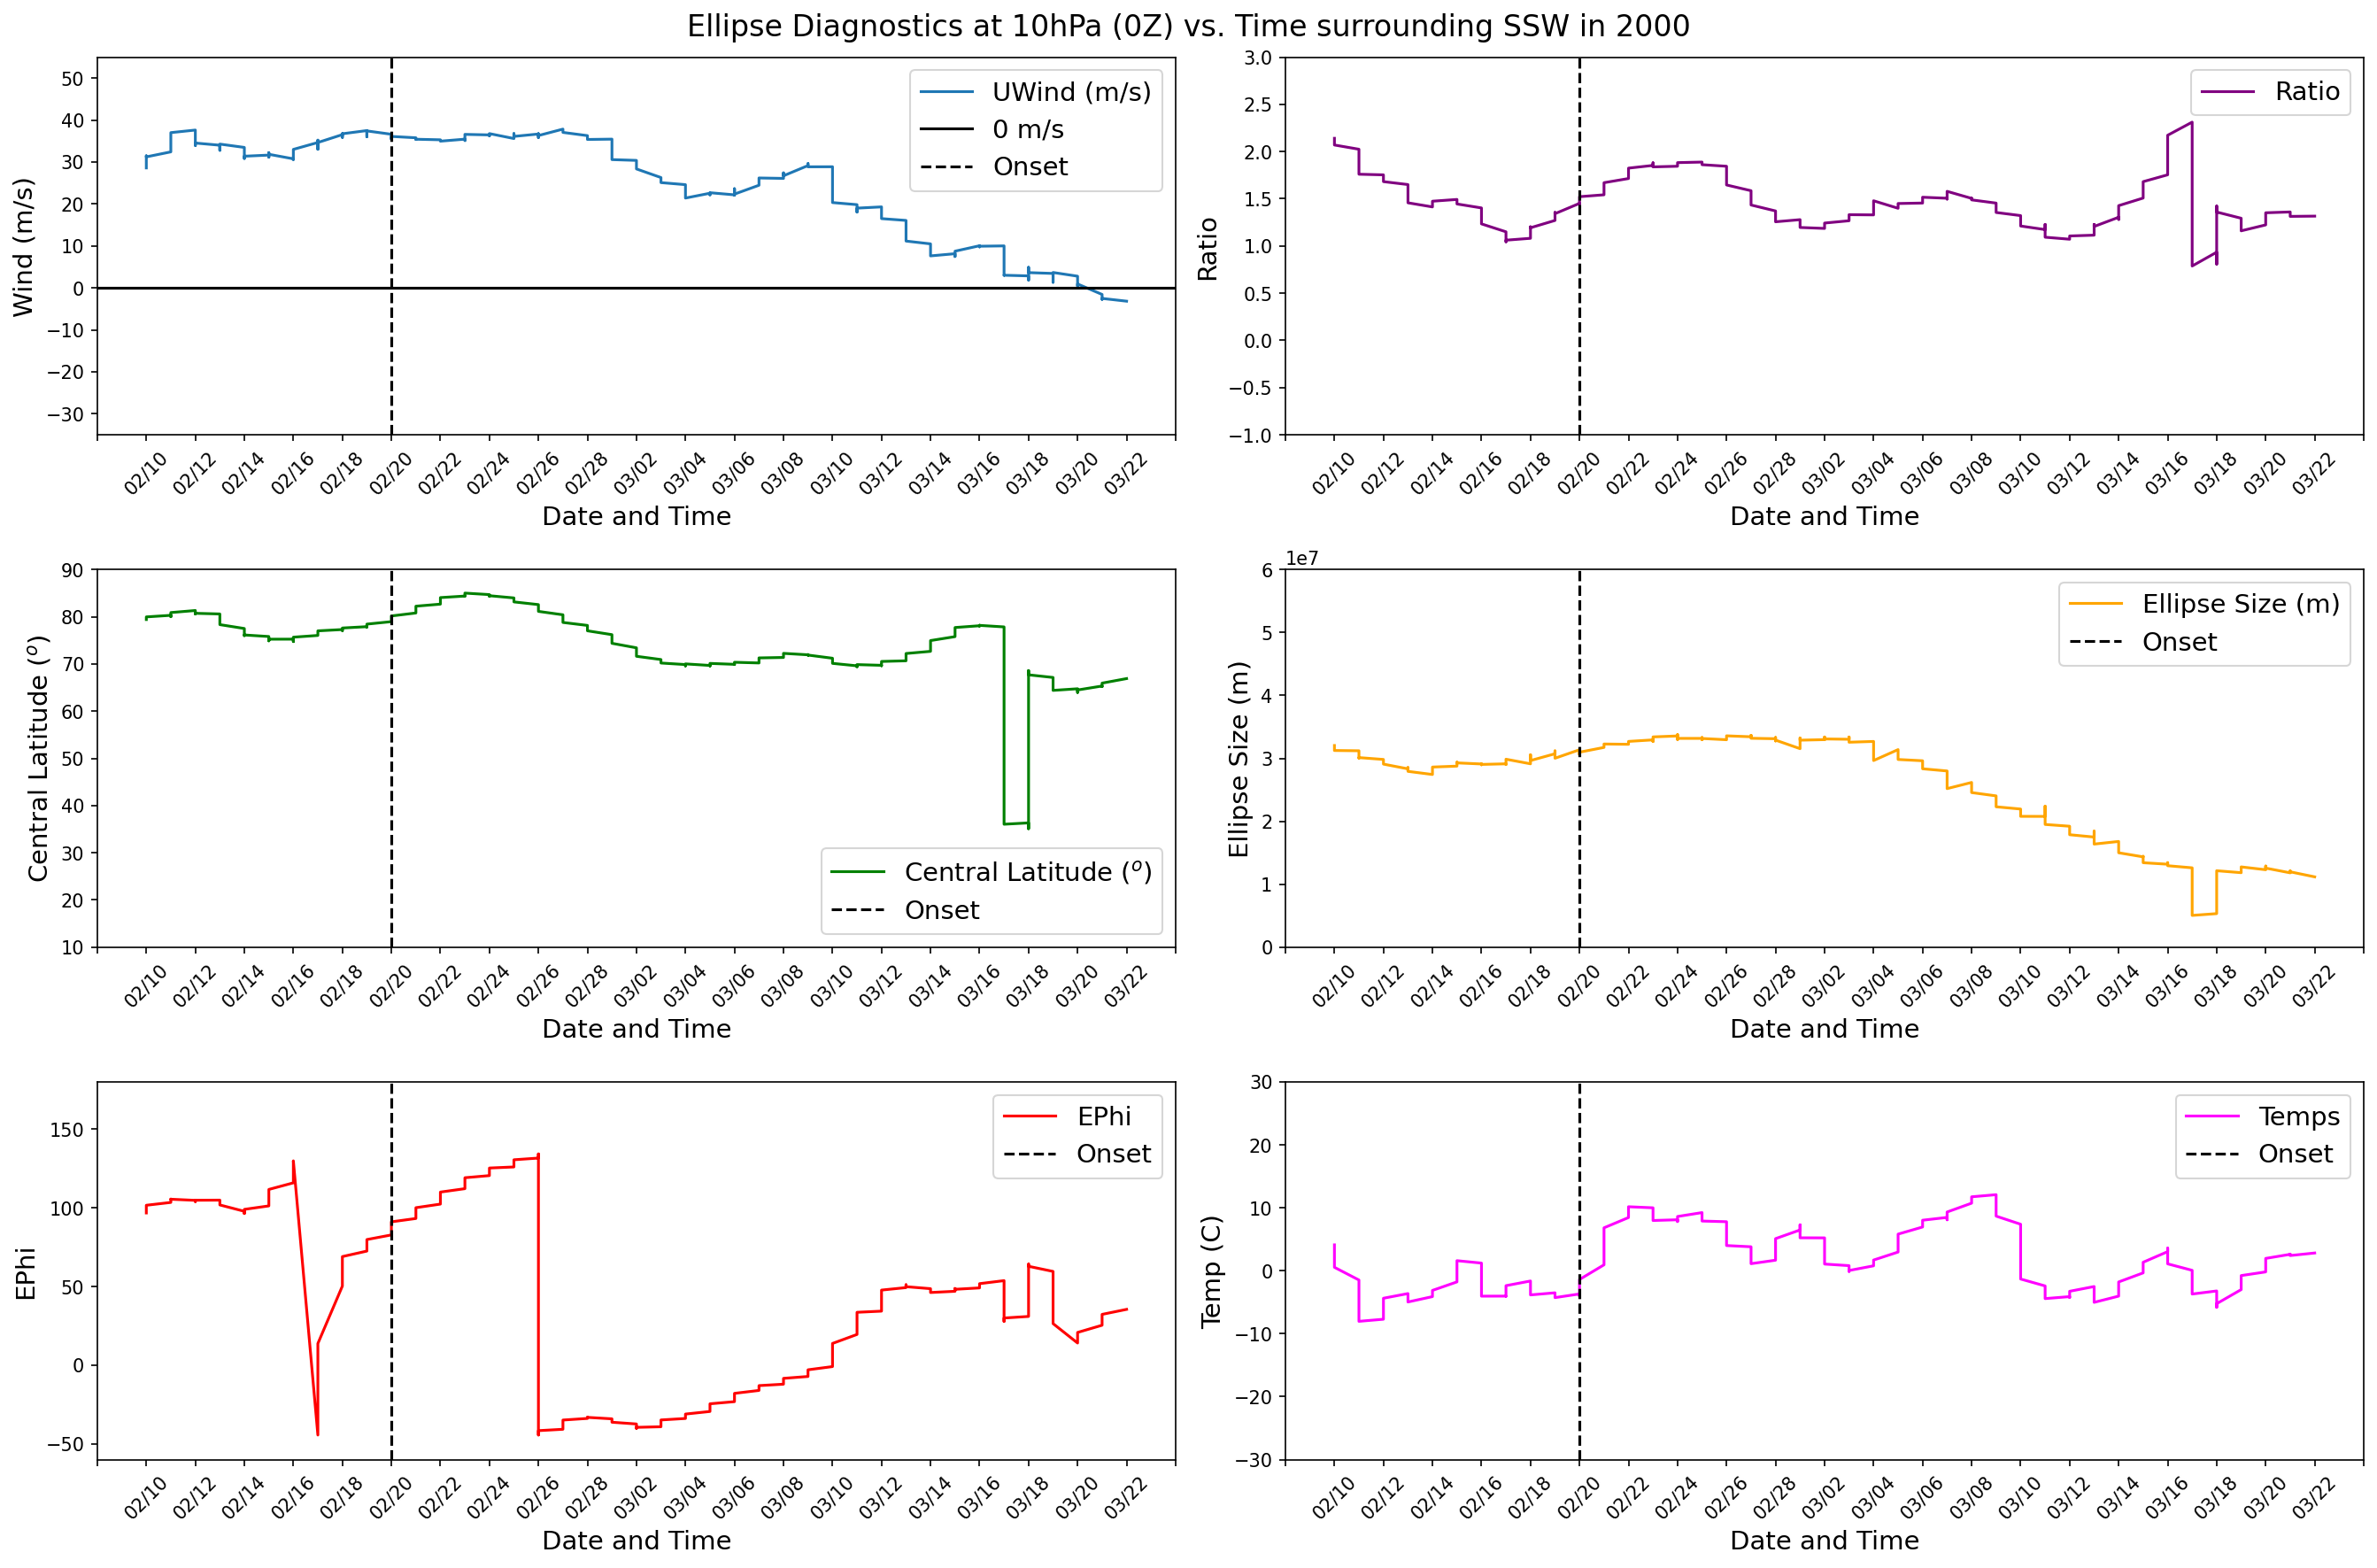

In [27]:
##specific year:2019
myLocator = mticker.MultipleLocator(2)


normal_year = pd.date_range('2000-12-01','2001-04-01', 
              freq='6H').strftime("%m/%d").tolist()

y = str(year[1])
d1 = int(285)
d2 = int(445)
    
##diagnostics
    
w = e10[sswcl[0],d1:d2] #wind
rat = ephi_ratio10[sswcl[0],d1:d2]
cl = ephi_cenlat10[sswcl[0],d1:d2]
sz = ephi_size10[sswcl[0],d1:d2]
ep = ephi10[sswcl[0],d1:d2]
t = tem[sswcl[0],d1:d2]
    
x = normal_year[d1:d2]
         
    
fig = plt.figure(figsize=(18,12),dpi=150)
    
ax1 = plt.subplot(3,2,1)
plt.suptitle("Ellipse Diagnostics at 10hPa (0Z) vs. Time surrounding SSW in 2000", fontsize = 16)
ax1.plot(x, w, label = "UWind (m/s)")
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = 14)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date and Time", fontsize = 14)
ax1.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 10)
plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax2 = plt.subplot(3,2,2)
ax2.plot(x, rat, label = "Ratio", color = "purple")
ax2.set_ylabel("Ratio", fontsize = 14)
ax2.set_ylim(-1,3)
ax2.set_xlabel("Date and Time", fontsize = 14)
ax2.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 10)
plt.axvline(x=x[39], color='k', linestyle='--')
plt.legend(fontsize = 14)
    
ax3 = plt.subplot(3,2,3)
ax3.plot(x, cl, label = "Central Latitude ($^o$)", color = "green")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = 14)
ax3.set_xlabel("Date and Time", fontsize = 14)
ax3.set_ylim(10,90)
ax3.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 10)
plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax4 = plt.subplot(3,2,4)
ax4.plot(x, sz, label = "Ellipse Size (m)", color = "orange")
ax4.set_ylabel("Ellipse Size (m)", fontsize = 14)
ax4.set_ylim(0,60000000)
ax4.set_xlabel("Date and Time", fontsize = 14)
ax4.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 10)
plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax5 = plt.subplot(3,2,5)
ax5.plot(x, ep, label = "EPhi", color = "red")
ax5.set_ylabel("EPhi", fontsize = 14)
ax5.set_ylim(-60,180)
ax5.set_xlabel("Date and Time", fontsize = 14)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 10)
plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax6 = plt.subplot(3,2,6)
ax6.plot(x, t, label = "Temps", color = "magenta")
ax6.set_ylabel("Temp (C)", fontsize = 14)
ax6.set_ylim(-30,30)
ax6.set_xlabel("Date and Time", fontsize = 14)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 10)
plt.axvline(x=x[39], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)
    
plt.xticks(rotation=45,fontsize = 10)
plt.tight_layout()
plt.show()


In [28]:
##correlations
from scipy.stats.stats import pearsonr 

dd1 = int(112)
dd2 = int(272)
    
##diagnostics
    
w2 = e10[sswcl[10],dd1:dd2] #wind
rat2 = ephi_ratio10[sswcl[10],dd1:dd2]
cl2 = ephi_cenlat10[sswcl[10],dd1:dd2]
sz2 = ephi_size10[sswcl[10],dd1:dd2]
ep2 = ephi10[sswcl[10],dd1:dd2]

wcorr = pearsonr(t,w2)
print("Correlation with 14-Day Prior Wind:",wcorr)

szcorr = pearsonr(t,sz2)
print("Correlation with Size:",szcorr)

epcorr = pearsonr(t,ep2)
print("Correlation with EPhi:",epcorr)

ratcorr = pearsonr(t,rat2)
print("Correlation with Ratio:",ratcorr)

ccorr = pearsonr(t,cl2)
print("Correlation with Center Latitude:",ccorr)

Correlation with 14-Day Prior Wind: (-0.476362456222129, 1.9268987501947534e-10)
Correlation with Size: (-0.3996595062182696, 1.6449171332551485e-07)
Correlation with EPhi: (-0.008532115581997478, 0.9147259734652008)
Correlation with Ratio: (0.06442731103748778, 0.41828523585862404)
Correlation with Center Latitude: (0.21257116688503408, 0.006961766161639724)


In [29]:
corrs = []

for i in range(len(sswcl)):
    if i == 1 or i == 6 or i == 8 or i == 11:
        continue
    else:
        print(i)
        c = ephi10[sswcl[i],int(dates[i][0]):int(dates[i][1])]
        print(len(c))
        t = tem[sswcl[i],int(dates[i][0]):int(dates[i][1])]
        print(len(t))
        corr = pearsonr(t,c)
        corrs.append((year[i], corr[1]))

print(corrs)

0
81
81
2
81
81
3
81
81
4
81
81
5
81
81
7
81
81
9
81
81
10
81
81
12
81
81
[(1999, 1.7313057870338844e-07), (2001, 0.0006038209472247885), (2002, 0.1447064308070232), (2003, 0.0001491468785628), (2005, 0.3841561152400062), (2007, 0.0022614719095314256), (2009, 0.0038765147551304362), (2012, 0.6246761238068718), (2018, 1.0371922002098417e-06)]


In [30]:
wincorr = [0.012866593256424273, 4.4808778824208246e-10, 0.07599906718451384, 0.0006802845062079917, 0.33200737458618246, 0.7489582734818995, 0.018124491586950356, 0.00024049513855726377, 0.014823050558311741]
sizecorr = [0.0012430670320579514, 7.194970201389385e-06, 0.6314602299695056, 4.085581118003525e-05, 0.08119693934626118, 0.9858991000634765, 0.19355602961566257, 5.0149284815954425e-06, 0.19475081191766255]
ratcorr = [0.1512221003464323, 0.6394920972949374, 0.31936516407992294, 0.32360045307833046, 0.8483995381374739, 0.04815643106334497, 0.011659205351829708, 0.004250293072693284, 0.03885625462990728]
ephicorr = [1.7313057870338844e-07, 0.00060382094722478852, 0.1447064308070232, 0.0001491468785628, 0.3841561152400062, 0.0022614719095314256, 0.0038765147551304362, 0.6246761238068718, 1.0371922002098417e-06]
cencorr = [0.0011051402908967447, 3.186740004958977e-05, 0.42289655729319436, 0.00046044228011421165, 0.5810486125205405, 0.08338013061675584, 0.009256256704170601, 0.009396173036206887, 0.2772984404796757]

In [31]:
print("Median Wind Corr")
print(np.median(wincorr))

print("Median Size Corr")
print(np.median(sizecorr))

print("Median Ephi Corr")
print(np.median(ephicorr))

print("Median Cen Lat Corr")
print(np.median(cencorr))

print("Median Rati0 Corr")
print(np.median(ratcorr))

Median Wind Corr
0.014823050558311741
Median Size Corr
0.08119693934626118
Median Ephi Corr
0.0022614719095314256
Median Cen Lat Corr
0.009396173036206887
Median Rati0 Corr
0.1512221003464323
